In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import datetime 
import json
import statistics

In [2]:
file = 'Resources/kc_house_data.csv'
df=pd.read_csv(file)
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [3]:
df["date"] = pd.to_datetime(df["date"]).dt.strftime('%Y-%m-%d')
df.sort_values('date')



id        date      price  bedrooms  bathrooms  sqft_living  \
16768  5561000190  2014-05-02   437500.0         3       2.25         1970   
9596    472000620  2014-05-02   790000.0         3       2.50         2600   
9587   1024069009  2014-05-02   675000.0         5       2.50         2820   
20602  7853361370  2014-05-02   555000.0         4       2.50         3310   
11577  5056500260  2014-05-02   440000.0         4       2.25         2160   
...           ...         ...        ...       ...        ...          ...   
7898   1422700040  2015-05-14   183000.0         3       1.00         1170   
928    8730000270  2015-05-14   359000.0         2       2.75         1370   
5637   7923600250  2015-05-15   450000.0         5       2.00         1870   
13053  5101400871  2015-05-24   445500.0         2       1.75         1390   
16594  9106000005  2015-05-27  1310000.0         4       2.25         3750   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
16768     35100     2.0           0     0  ...      9        1970   
9596       4750     1.0           0     0  ...      9        1700   
9587      67518     2.0           0     0  ...      8        2820   
20602      6500     2.0           0     0  ...      8        3310   
11577      8119     1.0           0     0  ...      8        1080   
...         ...     ...         ...   ...  ...    ...         ...   
7898       7320     1.0           0     0  ...      7        1170   
928        1140     2.0           0     0  ...      8        1080   
5637       7344     1.5           0     0  ...      7        1870   
13053      6670     1.0           0     0  ...      6         720   
16594      5000     2.0           0     0  ...      8        2440   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
16768              0      1977             0    98027  47.4635 -121.991   
9596             900      1951             0    98117  47.6833 -122.400   
9587               0      1979             0    98029  47.5794 -122.025   
20602              0      2012             0    98065  47.5150 -121.870   
11577           1080      1966             0    98006  47.5443 -122.177   
...              ...       ...           ...      ...      ...      ...   
7898               0      1962             0    98188  47.4685 -122.282   
928              290      2009             0    98133  47.7052 -122.343   
5637               0      1960             0    98007  47.5951 -122.144   
13053            670      1941             0    98115  47.6914 -122.308   
16594           1310      1924             0    98115  47.6747 -122.303   

       sqft_living15  sqft_lot15  
16768           2340       35100  
9596            2380        4750  
9587            2820       48351  
20602           2380        5000  
11577           1850        9000  
...              ...         ...  
7898            2040        7320  
928             1370        1090  
5637            1870        7650  
13053            920        6380  
16594           2170        4590  

[21613 rows x 21 columns]

In [4]:
dateym=[]
num = 0
for index, row in df.iterrows():
    print("working on "+ str(num))
    mdate = df['date'][num][0:7]
    dateym.append(mdate)
    num = num + 1

working on 0
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on 7
working on 8
working on 9
working on 10
working on 11
working on 12
working on 13
working on 14
working on 15
working on 16
working on 17
working on 18
working on 19
working on 20
working on 21
working on 22
working on 23
working on 24
working on 25
working on 26
working on 27
working on 28
working on 29
working on 30
working on 31
working on 32
working on 33
working on 34
working on 35
working on 36
working on 37
working on 38
working on 39
working on 40
working on 41
working on 42
working on 43
working on 44
working on 45
working on 46
working on 47
working on 48
working on 49
working on 50
working on 51
working on 52
working on 53
working on 54
working on 55
working on 56
working on 57
working on 58
working on 59
working on 60
working on 61
working on 62
working on 63
working on 64
working on 65
working on 66
working on 67
working on 68
working on 69
working on 70
working on 71
wo

working on 875
working on 876
working on 877
working on 878
working on 879
working on 880
working on 881
working on 882
working on 883
working on 884
working on 885
working on 886
working on 887
working on 888
working on 889
working on 890
working on 891
working on 892
working on 893
working on 894
working on 895
working on 896
working on 897
working on 898
working on 899
working on 900
working on 901
working on 902
working on 903
working on 904
working on 905
working on 906
working on 907
working on 908
working on 909
working on 910
working on 911
working on 912
working on 913
working on 914
working on 915
working on 916
working on 917
working on 918
working on 919
working on 920
working on 921
working on 922
working on 923
working on 924
working on 925
working on 926
working on 927
working on 928
working on 929
working on 930
working on 931
working on 932
working on 933
working on 934
working on 935
working on 936
working on 937
working on 938
working on 939
working on 940
working on

working on 1581
working on 1582
working on 1583
working on 1584
working on 1585
working on 1586
working on 1587
working on 1588
working on 1589
working on 1590
working on 1591
working on 1592
working on 1593
working on 1594
working on 1595
working on 1596
working on 1597
working on 1598
working on 1599
working on 1600
working on 1601
working on 1602
working on 1603
working on 1604
working on 1605
working on 1606
working on 1607
working on 1608
working on 1609
working on 1610
working on 1611
working on 1612
working on 1613
working on 1614
working on 1615
working on 1616
working on 1617
working on 1618
working on 1619
working on 1620
working on 1621
working on 1622
working on 1623
working on 1624
working on 1625
working on 1626
working on 1627
working on 1628
working on 1629
working on 1630
working on 1631
working on 1632
working on 1633
working on 1634
working on 1635
working on 1636
working on 1637
working on 1638
working on 1639
working on 1640
working on 1641
working on 1642
working 

working on 2301
working on 2302
working on 2303
working on 2304
working on 2305
working on 2306
working on 2307
working on 2308
working on 2309
working on 2310
working on 2311
working on 2312
working on 2313
working on 2314
working on 2315
working on 2316
working on 2317
working on 2318
working on 2319
working on 2320
working on 2321
working on 2322
working on 2323
working on 2324
working on 2325
working on 2326
working on 2327
working on 2328
working on 2329
working on 2330
working on 2331
working on 2332
working on 2333
working on 2334
working on 2335
working on 2336
working on 2337
working on 2338
working on 2339
working on 2340
working on 2341
working on 2342
working on 2343
working on 2344
working on 2345
working on 2346
working on 2347
working on 2348
working on 2349
working on 2350
working on 2351
working on 2352
working on 2353
working on 2354
working on 2355
working on 2356
working on 2357
working on 2358
working on 2359
working on 2360
working on 2361
working on 2362
working 

working on 2969
working on 2970
working on 2971
working on 2972
working on 2973
working on 2974
working on 2975
working on 2976
working on 2977
working on 2978
working on 2979
working on 2980
working on 2981
working on 2982
working on 2983
working on 2984
working on 2985
working on 2986
working on 2987
working on 2988
working on 2989
working on 2990
working on 2991
working on 2992
working on 2993
working on 2994
working on 2995
working on 2996
working on 2997
working on 2998
working on 2999
working on 3000
working on 3001
working on 3002
working on 3003
working on 3004
working on 3005
working on 3006
working on 3007
working on 3008
working on 3009
working on 3010
working on 3011
working on 3012
working on 3013
working on 3014
working on 3015
working on 3016
working on 3017
working on 3018
working on 3019
working on 3020
working on 3021
working on 3022
working on 3023
working on 3024
working on 3025
working on 3026
working on 3027
working on 3028
working on 3029
working on 3030
working 

working on 3579
working on 3580
working on 3581
working on 3582
working on 3583
working on 3584
working on 3585
working on 3586
working on 3587
working on 3588
working on 3589
working on 3590
working on 3591
working on 3592
working on 3593
working on 3594
working on 3595
working on 3596
working on 3597
working on 3598
working on 3599
working on 3600
working on 3601
working on 3602
working on 3603
working on 3604
working on 3605
working on 3606
working on 3607
working on 3608
working on 3609
working on 3610
working on 3611
working on 3612
working on 3613
working on 3614
working on 3615
working on 3616
working on 3617
working on 3618
working on 3619
working on 3620
working on 3621
working on 3622
working on 3623
working on 3624
working on 3625
working on 3626
working on 3627
working on 3628
working on 3629
working on 3630
working on 3631
working on 3632
working on 3633
working on 3634
working on 3635
working on 3636
working on 3637
working on 3638
working on 3639
working on 3640
working 

working on 4290
working on 4291
working on 4292
working on 4293
working on 4294
working on 4295
working on 4296
working on 4297
working on 4298
working on 4299
working on 4300
working on 4301
working on 4302
working on 4303
working on 4304
working on 4305
working on 4306
working on 4307
working on 4308
working on 4309
working on 4310
working on 4311
working on 4312
working on 4313
working on 4314
working on 4315
working on 4316
working on 4317
working on 4318
working on 4319
working on 4320
working on 4321
working on 4322
working on 4323
working on 4324
working on 4325
working on 4326
working on 4327
working on 4328
working on 4329
working on 4330
working on 4331
working on 4332
working on 4333
working on 4334
working on 4335
working on 4336
working on 4337
working on 4338
working on 4339
working on 4340
working on 4341
working on 4342
working on 4343
working on 4344
working on 4345
working on 4346
working on 4347
working on 4348
working on 4349
working on 4350
working on 4351
working 

working on 5074
working on 5075
working on 5076
working on 5077
working on 5078
working on 5079
working on 5080
working on 5081
working on 5082
working on 5083
working on 5084
working on 5085
working on 5086
working on 5087
working on 5088
working on 5089
working on 5090
working on 5091
working on 5092
working on 5093
working on 5094
working on 5095
working on 5096
working on 5097
working on 5098
working on 5099
working on 5100
working on 5101
working on 5102
working on 5103
working on 5104
working on 5105
working on 5106
working on 5107
working on 5108
working on 5109
working on 5110
working on 5111
working on 5112
working on 5113
working on 5114
working on 5115
working on 5116
working on 5117
working on 5118
working on 5119
working on 5120
working on 5121
working on 5122
working on 5123
working on 5124
working on 5125
working on 5126
working on 5127
working on 5128
working on 5129
working on 5130
working on 5131
working on 5132
working on 5133
working on 5134
working on 5135
working 

working on 5829
working on 5830
working on 5831
working on 5832
working on 5833
working on 5834
working on 5835
working on 5836
working on 5837
working on 5838
working on 5839
working on 5840
working on 5841
working on 5842
working on 5843
working on 5844
working on 5845
working on 5846
working on 5847
working on 5848
working on 5849
working on 5850
working on 5851
working on 5852
working on 5853
working on 5854
working on 5855
working on 5856
working on 5857
working on 5858
working on 5859
working on 5860
working on 5861
working on 5862
working on 5863
working on 5864
working on 5865
working on 5866
working on 5867
working on 5868
working on 5869
working on 5870
working on 5871
working on 5872
working on 5873
working on 5874
working on 5875
working on 5876
working on 5877
working on 5878
working on 5879
working on 5880
working on 5881
working on 5882
working on 5883
working on 5884
working on 5885
working on 5886
working on 5887
working on 5888
working on 5889
working on 5890
working 

working on 6381
working on 6382
working on 6383
working on 6384
working on 6385
working on 6386
working on 6387
working on 6388
working on 6389
working on 6390
working on 6391
working on 6392
working on 6393
working on 6394
working on 6395
working on 6396
working on 6397
working on 6398
working on 6399
working on 6400
working on 6401
working on 6402
working on 6403
working on 6404
working on 6405
working on 6406
working on 6407
working on 6408
working on 6409
working on 6410
working on 6411
working on 6412
working on 6413
working on 6414
working on 6415
working on 6416
working on 6417
working on 6418
working on 6419
working on 6420
working on 6421
working on 6422
working on 6423
working on 6424
working on 6425
working on 6426
working on 6427
working on 6428
working on 6429
working on 6430
working on 6431
working on 6432
working on 6433
working on 6434
working on 6435
working on 6436
working on 6437
working on 6438
working on 6439
working on 6440
working on 6441
working on 6442
working 

working on 7123
working on 7124
working on 7125
working on 7126
working on 7127
working on 7128
working on 7129
working on 7130
working on 7131
working on 7132
working on 7133
working on 7134
working on 7135
working on 7136
working on 7137
working on 7138
working on 7139
working on 7140
working on 7141
working on 7142
working on 7143
working on 7144
working on 7145
working on 7146
working on 7147
working on 7148
working on 7149
working on 7150
working on 7151
working on 7152
working on 7153
working on 7154
working on 7155
working on 7156
working on 7157
working on 7158
working on 7159
working on 7160
working on 7161
working on 7162
working on 7163
working on 7164
working on 7165
working on 7166
working on 7167
working on 7168
working on 7169
working on 7170
working on 7171
working on 7172
working on 7173
working on 7174
working on 7175
working on 7176
working on 7177
working on 7178
working on 7179
working on 7180
working on 7181
working on 7182
working on 7183
working on 7184
working 

working on 7711
working on 7712
working on 7713
working on 7714
working on 7715
working on 7716
working on 7717
working on 7718
working on 7719
working on 7720
working on 7721
working on 7722
working on 7723
working on 7724
working on 7725
working on 7726
working on 7727
working on 7728
working on 7729
working on 7730
working on 7731
working on 7732
working on 7733
working on 7734
working on 7735
working on 7736
working on 7737
working on 7738
working on 7739
working on 7740
working on 7741
working on 7742
working on 7743
working on 7744
working on 7745
working on 7746
working on 7747
working on 7748
working on 7749
working on 7750
working on 7751
working on 7752
working on 7753
working on 7754
working on 7755
working on 7756
working on 7757
working on 7758
working on 7759
working on 7760
working on 7761
working on 7762
working on 7763
working on 7764
working on 7765
working on 7766
working on 7767
working on 7768
working on 7769
working on 7770
working on 7771
working on 7772
working 

working on 8240
working on 8241
working on 8242
working on 8243
working on 8244
working on 8245
working on 8246
working on 8247
working on 8248
working on 8249
working on 8250
working on 8251
working on 8252
working on 8253
working on 8254
working on 8255
working on 8256
working on 8257
working on 8258
working on 8259
working on 8260
working on 8261
working on 8262
working on 8263
working on 8264
working on 8265
working on 8266
working on 8267
working on 8268
working on 8269
working on 8270
working on 8271
working on 8272
working on 8273
working on 8274
working on 8275
working on 8276
working on 8277
working on 8278
working on 8279
working on 8280
working on 8281
working on 8282
working on 8283
working on 8284
working on 8285
working on 8286
working on 8287
working on 8288
working on 8289
working on 8290
working on 8291
working on 8292
working on 8293
working on 8294
working on 8295
working on 8296
working on 8297
working on 8298
working on 8299
working on 8300
working on 8301
working 

working on 8985
working on 8986
working on 8987
working on 8988
working on 8989
working on 8990
working on 8991
working on 8992
working on 8993
working on 8994
working on 8995
working on 8996
working on 8997
working on 8998
working on 8999
working on 9000
working on 9001
working on 9002
working on 9003
working on 9004
working on 9005
working on 9006
working on 9007
working on 9008
working on 9009
working on 9010
working on 9011
working on 9012
working on 9013
working on 9014
working on 9015
working on 9016
working on 9017
working on 9018
working on 9019
working on 9020
working on 9021
working on 9022
working on 9023
working on 9024
working on 9025
working on 9026
working on 9027
working on 9028
working on 9029
working on 9030
working on 9031
working on 9032
working on 9033
working on 9034
working on 9035
working on 9036
working on 9037
working on 9038
working on 9039
working on 9040
working on 9041
working on 9042
working on 9043
working on 9044
working on 9045
working on 9046
working 

working on 9599
working on 9600
working on 9601
working on 9602
working on 9603
working on 9604
working on 9605
working on 9606
working on 9607
working on 9608
working on 9609
working on 9610
working on 9611
working on 9612
working on 9613
working on 9614
working on 9615
working on 9616
working on 9617
working on 9618
working on 9619
working on 9620
working on 9621
working on 9622
working on 9623
working on 9624
working on 9625
working on 9626
working on 9627
working on 9628
working on 9629
working on 9630
working on 9631
working on 9632
working on 9633
working on 9634
working on 9635
working on 9636
working on 9637
working on 9638
working on 9639
working on 9640
working on 9641
working on 9642
working on 9643
working on 9644
working on 9645
working on 9646
working on 9647
working on 9648
working on 9649
working on 9650
working on 9651
working on 9652
working on 9653
working on 9654
working on 9655
working on 9656
working on 9657
working on 9658
working on 9659
working on 9660
working 

working on 10127
working on 10128
working on 10129
working on 10130
working on 10131
working on 10132
working on 10133
working on 10134
working on 10135
working on 10136
working on 10137
working on 10138
working on 10139
working on 10140
working on 10141
working on 10142
working on 10143
working on 10144
working on 10145
working on 10146
working on 10147
working on 10148
working on 10149
working on 10150
working on 10151
working on 10152
working on 10153
working on 10154
working on 10155
working on 10156
working on 10157
working on 10158
working on 10159
working on 10160
working on 10161
working on 10162
working on 10163
working on 10164
working on 10165
working on 10166
working on 10167
working on 10168
working on 10169
working on 10170
working on 10171
working on 10172
working on 10173
working on 10174
working on 10175
working on 10176
working on 10177
working on 10178
working on 10179
working on 10180
working on 10181
working on 10182
working on 10183
working on 10184
working on 101

working on 10744
working on 10745
working on 10746
working on 10747
working on 10748
working on 10749
working on 10750
working on 10751
working on 10752
working on 10753
working on 10754
working on 10755
working on 10756
working on 10757
working on 10758
working on 10759
working on 10760
working on 10761
working on 10762
working on 10763
working on 10764
working on 10765
working on 10766
working on 10767
working on 10768
working on 10769
working on 10770
working on 10771
working on 10772
working on 10773
working on 10774
working on 10775
working on 10776
working on 10777
working on 10778
working on 10779
working on 10780
working on 10781
working on 10782
working on 10783
working on 10784
working on 10785
working on 10786
working on 10787
working on 10788
working on 10789
working on 10790
working on 10791
working on 10792
working on 10793
working on 10794
working on 10795
working on 10796
working on 10797
working on 10798
working on 10799
working on 10800
working on 10801
working on 108

working on 11407
working on 11408
working on 11409
working on 11410
working on 11411
working on 11412
working on 11413
working on 11414
working on 11415
working on 11416
working on 11417
working on 11418
working on 11419
working on 11420
working on 11421
working on 11422
working on 11423
working on 11424
working on 11425
working on 11426
working on 11427
working on 11428
working on 11429
working on 11430
working on 11431
working on 11432
working on 11433
working on 11434
working on 11435
working on 11436
working on 11437
working on 11438
working on 11439
working on 11440
working on 11441
working on 11442
working on 11443
working on 11444
working on 11445
working on 11446
working on 11447
working on 11448
working on 11449
working on 11450
working on 11451
working on 11452
working on 11453
working on 11454
working on 11455
working on 11456
working on 11457
working on 11458
working on 11459
working on 11460
working on 11461
working on 11462
working on 11463
working on 11464
working on 114

working on 12002
working on 12003
working on 12004
working on 12005
working on 12006
working on 12007
working on 12008
working on 12009
working on 12010
working on 12011
working on 12012
working on 12013
working on 12014
working on 12015
working on 12016
working on 12017
working on 12018
working on 12019
working on 12020
working on 12021
working on 12022
working on 12023
working on 12024
working on 12025
working on 12026
working on 12027
working on 12028
working on 12029
working on 12030
working on 12031
working on 12032
working on 12033
working on 12034
working on 12035
working on 12036
working on 12037
working on 12038
working on 12039
working on 12040
working on 12041
working on 12042
working on 12043
working on 12044
working on 12045
working on 12046
working on 12047
working on 12048
working on 12049
working on 12050
working on 12051
working on 12052
working on 12053
working on 12054
working on 12055
working on 12056
working on 12057
working on 12058
working on 12059
working on 120

working on 12638
working on 12639
working on 12640
working on 12641
working on 12642
working on 12643
working on 12644
working on 12645
working on 12646
working on 12647
working on 12648
working on 12649
working on 12650
working on 12651
working on 12652
working on 12653
working on 12654
working on 12655
working on 12656
working on 12657
working on 12658
working on 12659
working on 12660
working on 12661
working on 12662
working on 12663
working on 12664
working on 12665
working on 12666
working on 12667
working on 12668
working on 12669
working on 12670
working on 12671
working on 12672
working on 12673
working on 12674
working on 12675
working on 12676
working on 12677
working on 12678
working on 12679
working on 12680
working on 12681
working on 12682
working on 12683
working on 12684
working on 12685
working on 12686
working on 12687
working on 12688
working on 12689
working on 12690
working on 12691
working on 12692
working on 12693
working on 12694
working on 12695
working on 126

working on 13423
working on 13424
working on 13425
working on 13426
working on 13427
working on 13428
working on 13429
working on 13430
working on 13431
working on 13432
working on 13433
working on 13434
working on 13435
working on 13436
working on 13437
working on 13438
working on 13439
working on 13440
working on 13441
working on 13442
working on 13443
working on 13444
working on 13445
working on 13446
working on 13447
working on 13448
working on 13449
working on 13450
working on 13451
working on 13452
working on 13453
working on 13454
working on 13455
working on 13456
working on 13457
working on 13458
working on 13459
working on 13460
working on 13461
working on 13462
working on 13463
working on 13464
working on 13465
working on 13466
working on 13467
working on 13468
working on 13469
working on 13470
working on 13471
working on 13472
working on 13473
working on 13474
working on 13475
working on 13476
working on 13477
working on 13478
working on 13479
working on 13480
working on 134

working on 14122
working on 14123
working on 14124
working on 14125
working on 14126
working on 14127
working on 14128
working on 14129
working on 14130
working on 14131
working on 14132
working on 14133
working on 14134
working on 14135
working on 14136
working on 14137
working on 14138
working on 14139
working on 14140
working on 14141
working on 14142
working on 14143
working on 14144
working on 14145
working on 14146
working on 14147
working on 14148
working on 14149
working on 14150
working on 14151
working on 14152
working on 14153
working on 14154
working on 14155
working on 14156
working on 14157
working on 14158
working on 14159
working on 14160
working on 14161
working on 14162
working on 14163
working on 14164
working on 14165
working on 14166
working on 14167
working on 14168
working on 14169
working on 14170
working on 14171
working on 14172
working on 14173
working on 14174
working on 14175
working on 14176
working on 14177
working on 14178
working on 14179
working on 141

working on 14731
working on 14732
working on 14733
working on 14734
working on 14735
working on 14736
working on 14737
working on 14738
working on 14739
working on 14740
working on 14741
working on 14742
working on 14743
working on 14744
working on 14745
working on 14746
working on 14747
working on 14748
working on 14749
working on 14750
working on 14751
working on 14752
working on 14753
working on 14754
working on 14755
working on 14756
working on 14757
working on 14758
working on 14759
working on 14760
working on 14761
working on 14762
working on 14763
working on 14764
working on 14765
working on 14766
working on 14767
working on 14768
working on 14769
working on 14770
working on 14771
working on 14772
working on 14773
working on 14774
working on 14775
working on 14776
working on 14777
working on 14778
working on 14779
working on 14780
working on 14781
working on 14782
working on 14783
working on 14784
working on 14785
working on 14786
working on 14787
working on 14788
working on 147

working on 15416
working on 15417
working on 15418
working on 15419
working on 15420
working on 15421
working on 15422
working on 15423
working on 15424
working on 15425
working on 15426
working on 15427
working on 15428
working on 15429
working on 15430
working on 15431
working on 15432
working on 15433
working on 15434
working on 15435
working on 15436
working on 15437
working on 15438
working on 15439
working on 15440
working on 15441
working on 15442
working on 15443
working on 15444
working on 15445
working on 15446
working on 15447
working on 15448
working on 15449
working on 15450
working on 15451
working on 15452
working on 15453
working on 15454
working on 15455
working on 15456
working on 15457
working on 15458
working on 15459
working on 15460
working on 15461
working on 15462
working on 15463
working on 15464
working on 15465
working on 15466
working on 15467
working on 15468
working on 15469
working on 15470
working on 15471
working on 15472
working on 15473
working on 154

working on 16091
working on 16092
working on 16093
working on 16094
working on 16095
working on 16096
working on 16097
working on 16098
working on 16099
working on 16100
working on 16101
working on 16102
working on 16103
working on 16104
working on 16105
working on 16106
working on 16107
working on 16108
working on 16109
working on 16110
working on 16111
working on 16112
working on 16113
working on 16114
working on 16115
working on 16116
working on 16117
working on 16118
working on 16119
working on 16120
working on 16121
working on 16122
working on 16123
working on 16124
working on 16125
working on 16126
working on 16127
working on 16128
working on 16129
working on 16130
working on 16131
working on 16132
working on 16133
working on 16134
working on 16135
working on 16136
working on 16137
working on 16138
working on 16139
working on 16140
working on 16141
working on 16142
working on 16143
working on 16144
working on 16145
working on 16146
working on 16147
working on 16148
working on 161

working on 16706
working on 16707
working on 16708
working on 16709
working on 16710
working on 16711
working on 16712
working on 16713
working on 16714
working on 16715
working on 16716
working on 16717
working on 16718
working on 16719
working on 16720
working on 16721
working on 16722
working on 16723
working on 16724
working on 16725
working on 16726
working on 16727
working on 16728
working on 16729
working on 16730
working on 16731
working on 16732
working on 16733
working on 16734
working on 16735
working on 16736
working on 16737
working on 16738
working on 16739
working on 16740
working on 16741
working on 16742
working on 16743
working on 16744
working on 16745
working on 16746
working on 16747
working on 16748
working on 16749
working on 16750
working on 16751
working on 16752
working on 16753
working on 16754
working on 16755
working on 16756
working on 16757
working on 16758
working on 16759
working on 16760
working on 16761
working on 16762
working on 16763
working on 167

working on 17395
working on 17396
working on 17397
working on 17398
working on 17399
working on 17400
working on 17401
working on 17402
working on 17403
working on 17404
working on 17405
working on 17406
working on 17407
working on 17408
working on 17409
working on 17410
working on 17411
working on 17412
working on 17413
working on 17414
working on 17415
working on 17416
working on 17417
working on 17418
working on 17419
working on 17420
working on 17421
working on 17422
working on 17423
working on 17424
working on 17425
working on 17426
working on 17427
working on 17428
working on 17429
working on 17430
working on 17431
working on 17432
working on 17433
working on 17434
working on 17435
working on 17436
working on 17437
working on 17438
working on 17439
working on 17440
working on 17441
working on 17442
working on 17443
working on 17444
working on 17445
working on 17446
working on 17447
working on 17448
working on 17449
working on 17450
working on 17451
working on 17452
working on 174

working on 18100
working on 18101
working on 18102
working on 18103
working on 18104
working on 18105
working on 18106
working on 18107
working on 18108
working on 18109
working on 18110
working on 18111
working on 18112
working on 18113
working on 18114
working on 18115
working on 18116
working on 18117
working on 18118
working on 18119
working on 18120
working on 18121
working on 18122
working on 18123
working on 18124
working on 18125
working on 18126
working on 18127
working on 18128
working on 18129
working on 18130
working on 18131
working on 18132
working on 18133
working on 18134
working on 18135
working on 18136
working on 18137
working on 18138
working on 18139
working on 18140
working on 18141
working on 18142
working on 18143
working on 18144
working on 18145
working on 18146
working on 18147
working on 18148
working on 18149
working on 18150
working on 18151
working on 18152
working on 18153
working on 18154
working on 18155
working on 18156
working on 18157
working on 181

working on 18691
working on 18692
working on 18693
working on 18694
working on 18695
working on 18696
working on 18697
working on 18698
working on 18699
working on 18700
working on 18701
working on 18702
working on 18703
working on 18704
working on 18705
working on 18706
working on 18707
working on 18708
working on 18709
working on 18710
working on 18711
working on 18712
working on 18713
working on 18714
working on 18715
working on 18716
working on 18717
working on 18718
working on 18719
working on 18720
working on 18721
working on 18722
working on 18723
working on 18724
working on 18725
working on 18726
working on 18727
working on 18728
working on 18729
working on 18730
working on 18731
working on 18732
working on 18733
working on 18734
working on 18735
working on 18736
working on 18737
working on 18738
working on 18739
working on 18740
working on 18741
working on 18742
working on 18743
working on 18744
working on 18745
working on 18746
working on 18747
working on 18748
working on 187

working on 19404
working on 19405
working on 19406
working on 19407
working on 19408
working on 19409
working on 19410
working on 19411
working on 19412
working on 19413
working on 19414
working on 19415
working on 19416
working on 19417
working on 19418
working on 19419
working on 19420
working on 19421
working on 19422
working on 19423
working on 19424
working on 19425
working on 19426
working on 19427
working on 19428
working on 19429
working on 19430
working on 19431
working on 19432
working on 19433
working on 19434
working on 19435
working on 19436
working on 19437
working on 19438
working on 19439
working on 19440
working on 19441
working on 19442
working on 19443
working on 19444
working on 19445
working on 19446
working on 19447
working on 19448
working on 19449
working on 19450
working on 19451
working on 19452
working on 19453
working on 19454
working on 19455
working on 19456
working on 19457
working on 19458
working on 19459
working on 19460
working on 19461
working on 194

working on 20147
working on 20148
working on 20149
working on 20150
working on 20151
working on 20152
working on 20153
working on 20154
working on 20155
working on 20156
working on 20157
working on 20158
working on 20159
working on 20160
working on 20161
working on 20162
working on 20163
working on 20164
working on 20165
working on 20166
working on 20167
working on 20168
working on 20169
working on 20170
working on 20171
working on 20172
working on 20173
working on 20174
working on 20175
working on 20176
working on 20177
working on 20178
working on 20179
working on 20180
working on 20181
working on 20182
working on 20183
working on 20184
working on 20185
working on 20186
working on 20187
working on 20188
working on 20189
working on 20190
working on 20191
working on 20192
working on 20193
working on 20194
working on 20195
working on 20196
working on 20197
working on 20198
working on 20199
working on 20200
working on 20201
working on 20202
working on 20203
working on 20204
working on 202

working on 20802
working on 20803
working on 20804
working on 20805
working on 20806
working on 20807
working on 20808
working on 20809
working on 20810
working on 20811
working on 20812
working on 20813
working on 20814
working on 20815
working on 20816
working on 20817
working on 20818
working on 20819
working on 20820
working on 20821
working on 20822
working on 20823
working on 20824
working on 20825
working on 20826
working on 20827
working on 20828
working on 20829
working on 20830
working on 20831
working on 20832
working on 20833
working on 20834
working on 20835
working on 20836
working on 20837
working on 20838
working on 20839
working on 20840
working on 20841
working on 20842
working on 20843
working on 20844
working on 20845
working on 20846
working on 20847
working on 20848
working on 20849
working on 20850
working on 20851
working on 20852
working on 20853
working on 20854
working on 20855
working on 20856
working on 20857
working on 20858
working on 20859
working on 208

working on 21377
working on 21378
working on 21379
working on 21380
working on 21381
working on 21382
working on 21383
working on 21384
working on 21385
working on 21386
working on 21387
working on 21388
working on 21389
working on 21390
working on 21391
working on 21392
working on 21393
working on 21394
working on 21395
working on 21396
working on 21397
working on 21398
working on 21399
working on 21400
working on 21401
working on 21402
working on 21403
working on 21404
working on 21405
working on 21406
working on 21407
working on 21408
working on 21409
working on 21410
working on 21411
working on 21412
working on 21413
working on 21414
working on 21415
working on 21416
working on 21417
working on 21418
working on 21419
working on 21420
working on 21421
working on 21422
working on 21423
working on 21424
working on 21425
working on 21426
working on 21427
working on 21428
working on 21429
working on 21430
working on 21431
working on 21432
working on 21433
working on 21434
working on 214

In [5]:
df['date(Y/M)']=dateym

In [6]:
datey=[]
num1 = 0
for index, row in df.iterrows():
    print("working on "+ str(num1))
    ydate = df['date'][num1][0:4]
    datey.append(ydate)
    num1 = num1 + 1


working on 0
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on 7
working on 8
working on 9
working on 10
working on 11
working on 12
working on 13
working on 14
working on 15
working on 16
working on 17
working on 18
working on 19
working on 20
working on 21
working on 22
working on 23
working on 24
working on 25
working on 26
working on 27
working on 28
working on 29
working on 30
working on 31
working on 32
working on 33
working on 34
working on 35
working on 36
working on 37
working on 38
working on 39
working on 40
working on 41
working on 42
working on 43
working on 44
working on 45
working on 46
working on 47
working on 48
working on 49
working on 50
working on 51
working on 52
working on 53
working on 54
working on 55
working on 56
working on 57
working on 58
working on 59
working on 60
working on 61
working on 62
working on 63
working on 64
working on 65
working on 66
working on 67
working on 68
working on 69
working on 70
working on 71
wo

working on 659
working on 660
working on 661
working on 662
working on 663
working on 664
working on 665
working on 666
working on 667
working on 668
working on 669
working on 670
working on 671
working on 672
working on 673
working on 674
working on 675
working on 676
working on 677
working on 678
working on 679
working on 680
working on 681
working on 682
working on 683
working on 684
working on 685
working on 686
working on 687
working on 688
working on 689
working on 690
working on 691
working on 692
working on 693
working on 694
working on 695
working on 696
working on 697
working on 698
working on 699
working on 700
working on 701
working on 702
working on 703
working on 704
working on 705
working on 706
working on 707
working on 708
working on 709
working on 710
working on 711
working on 712
working on 713
working on 714
working on 715
working on 716
working on 717
working on 718
working on 719
working on 720
working on 721
working on 722
working on 723
working on 724
working on

working on 1507
working on 1508
working on 1509
working on 1510
working on 1511
working on 1512
working on 1513
working on 1514
working on 1515
working on 1516
working on 1517
working on 1518
working on 1519
working on 1520
working on 1521
working on 1522
working on 1523
working on 1524
working on 1525
working on 1526
working on 1527
working on 1528
working on 1529
working on 1530
working on 1531
working on 1532
working on 1533
working on 1534
working on 1535
working on 1536
working on 1537
working on 1538
working on 1539
working on 1540
working on 1541
working on 1542
working on 1543
working on 1544
working on 1545
working on 1546
working on 1547
working on 1548
working on 1549
working on 1550
working on 1551
working on 1552
working on 1553
working on 1554
working on 1555
working on 1556
working on 1557
working on 1558
working on 1559
working on 1560
working on 1561
working on 1562
working on 1563
working on 1564
working on 1565
working on 1566
working on 1567
working on 1568
working 

working on 2165
working on 2166
working on 2167
working on 2168
working on 2169
working on 2170
working on 2171
working on 2172
working on 2173
working on 2174
working on 2175
working on 2176
working on 2177
working on 2178
working on 2179
working on 2180
working on 2181
working on 2182
working on 2183
working on 2184
working on 2185
working on 2186
working on 2187
working on 2188
working on 2189
working on 2190
working on 2191
working on 2192
working on 2193
working on 2194
working on 2195
working on 2196
working on 2197
working on 2198
working on 2199
working on 2200
working on 2201
working on 2202
working on 2203
working on 2204
working on 2205
working on 2206
working on 2207
working on 2208
working on 2209
working on 2210
working on 2211
working on 2212
working on 2213
working on 2214
working on 2215
working on 2216
working on 2217
working on 2218
working on 2219
working on 2220
working on 2221
working on 2222
working on 2223
working on 2224
working on 2225
working on 2226
working 

working on 2887
working on 2888
working on 2889
working on 2890
working on 2891
working on 2892
working on 2893
working on 2894
working on 2895
working on 2896
working on 2897
working on 2898
working on 2899
working on 2900
working on 2901
working on 2902
working on 2903
working on 2904
working on 2905
working on 2906
working on 2907
working on 2908
working on 2909
working on 2910
working on 2911
working on 2912
working on 2913
working on 2914
working on 2915
working on 2916
working on 2917
working on 2918
working on 2919
working on 2920
working on 2921
working on 2922
working on 2923
working on 2924
working on 2925
working on 2926
working on 2927
working on 2928
working on 2929
working on 2930
working on 2931
working on 2932
working on 2933
working on 2934
working on 2935
working on 2936
working on 2937
working on 2938
working on 2939
working on 2940
working on 2941
working on 2942
working on 2943
working on 2944
working on 2945
working on 2946
working on 2947
working on 2948
working 

working on 3577
working on 3578
working on 3579
working on 3580
working on 3581
working on 3582
working on 3583
working on 3584
working on 3585
working on 3586
working on 3587
working on 3588
working on 3589
working on 3590
working on 3591
working on 3592
working on 3593
working on 3594
working on 3595
working on 3596
working on 3597
working on 3598
working on 3599
working on 3600
working on 3601
working on 3602
working on 3603
working on 3604
working on 3605
working on 3606
working on 3607
working on 3608
working on 3609
working on 3610
working on 3611
working on 3612
working on 3613
working on 3614
working on 3615
working on 3616
working on 3617
working on 3618
working on 3619
working on 3620
working on 3621
working on 3622
working on 3623
working on 3624
working on 3625
working on 3626
working on 3627
working on 3628
working on 3629
working on 3630
working on 3631
working on 3632
working on 3633
working on 3634
working on 3635
working on 3636
working on 3637
working on 3638
working 

working on 4133
working on 4134
working on 4135
working on 4136
working on 4137
working on 4138
working on 4139
working on 4140
working on 4141
working on 4142
working on 4143
working on 4144
working on 4145
working on 4146
working on 4147
working on 4148
working on 4149
working on 4150
working on 4151
working on 4152
working on 4153
working on 4154
working on 4155
working on 4156
working on 4157
working on 4158
working on 4159
working on 4160
working on 4161
working on 4162
working on 4163
working on 4164
working on 4165
working on 4166
working on 4167
working on 4168
working on 4169
working on 4170
working on 4171
working on 4172
working on 4173
working on 4174
working on 4175
working on 4176
working on 4177
working on 4178
working on 4179
working on 4180
working on 4181
working on 4182
working on 4183
working on 4184
working on 4185
working on 4186
working on 4187
working on 4188
working on 4189
working on 4190
working on 4191
working on 4192
working on 4193
working on 4194
working 

working on 4743
working on 4744
working on 4745
working on 4746
working on 4747
working on 4748
working on 4749
working on 4750
working on 4751
working on 4752
working on 4753
working on 4754
working on 4755
working on 4756
working on 4757
working on 4758
working on 4759
working on 4760
working on 4761
working on 4762
working on 4763
working on 4764
working on 4765
working on 4766
working on 4767
working on 4768
working on 4769
working on 4770
working on 4771
working on 4772
working on 4773
working on 4774
working on 4775
working on 4776
working on 4777
working on 4778
working on 4779
working on 4780
working on 4781
working on 4782
working on 4783
working on 4784
working on 4785
working on 4786
working on 4787
working on 4788
working on 4789
working on 4790
working on 4791
working on 4792
working on 4793
working on 4794
working on 4795
working on 4796
working on 4797
working on 4798
working on 4799
working on 4800
working on 4801
working on 4802
working on 4803
working on 4804
working 

working on 5324
working on 5325
working on 5326
working on 5327
working on 5328
working on 5329
working on 5330
working on 5331
working on 5332
working on 5333
working on 5334
working on 5335
working on 5336
working on 5337
working on 5338
working on 5339
working on 5340
working on 5341
working on 5342
working on 5343
working on 5344
working on 5345
working on 5346
working on 5347
working on 5348
working on 5349
working on 5350
working on 5351
working on 5352
working on 5353
working on 5354
working on 5355
working on 5356
working on 5357
working on 5358
working on 5359
working on 5360
working on 5361
working on 5362
working on 5363
working on 5364
working on 5365
working on 5366
working on 5367
working on 5368
working on 5369
working on 5370
working on 5371
working on 5372
working on 5373
working on 5374
working on 5375
working on 5376
working on 5377
working on 5378
working on 5379
working on 5380
working on 5381
working on 5382
working on 5383
working on 5384
working on 5385
working 

working on 5934
working on 5935
working on 5936
working on 5937
working on 5938
working on 5939
working on 5940
working on 5941
working on 5942
working on 5943
working on 5944
working on 5945
working on 5946
working on 5947
working on 5948
working on 5949
working on 5950
working on 5951
working on 5952
working on 5953
working on 5954
working on 5955
working on 5956
working on 5957
working on 5958
working on 5959
working on 5960
working on 5961
working on 5962
working on 5963
working on 5964
working on 5965
working on 5966
working on 5967
working on 5968
working on 5969
working on 5970
working on 5971
working on 5972
working on 5973
working on 5974
working on 5975
working on 5976
working on 5977
working on 5978
working on 5979
working on 5980
working on 5981
working on 5982
working on 5983
working on 5984
working on 5985
working on 5986
working on 5987
working on 5988
working on 5989
working on 5990
working on 5991
working on 5992
working on 5993
working on 5994
working on 5995
working 

working on 6626
working on 6627
working on 6628
working on 6629
working on 6630
working on 6631
working on 6632
working on 6633
working on 6634
working on 6635
working on 6636
working on 6637
working on 6638
working on 6639
working on 6640
working on 6641
working on 6642
working on 6643
working on 6644
working on 6645
working on 6646
working on 6647
working on 6648
working on 6649
working on 6650
working on 6651
working on 6652
working on 6653
working on 6654
working on 6655
working on 6656
working on 6657
working on 6658
working on 6659
working on 6660
working on 6661
working on 6662
working on 6663
working on 6664
working on 6665
working on 6666
working on 6667
working on 6668
working on 6669
working on 6670
working on 6671
working on 6672
working on 6673
working on 6674
working on 6675
working on 6676
working on 6677
working on 6678
working on 6679
working on 6680
working on 6681
working on 6682
working on 6683
working on 6684
working on 6685
working on 6686
working on 6687
working 

working on 7271
working on 7272
working on 7273
working on 7274
working on 7275
working on 7276
working on 7277
working on 7278
working on 7279
working on 7280
working on 7281
working on 7282
working on 7283
working on 7284
working on 7285
working on 7286
working on 7287
working on 7288
working on 7289
working on 7290
working on 7291
working on 7292
working on 7293
working on 7294
working on 7295
working on 7296
working on 7297
working on 7298
working on 7299
working on 7300
working on 7301
working on 7302
working on 7303
working on 7304
working on 7305
working on 7306
working on 7307
working on 7308
working on 7309
working on 7310
working on 7311
working on 7312
working on 7313
working on 7314
working on 7315
working on 7316
working on 7317
working on 7318
working on 7319
working on 7320
working on 7321
working on 7322
working on 7323
working on 7324
working on 7325
working on 7326
working on 7327
working on 7328
working on 7329
working on 7330
working on 7331
working on 7332
working 

working on 7807
working on 7808
working on 7809
working on 7810
working on 7811
working on 7812
working on 7813
working on 7814
working on 7815
working on 7816
working on 7817
working on 7818
working on 7819
working on 7820
working on 7821
working on 7822
working on 7823
working on 7824
working on 7825
working on 7826
working on 7827
working on 7828
working on 7829
working on 7830
working on 7831
working on 7832
working on 7833
working on 7834
working on 7835
working on 7836
working on 7837
working on 7838
working on 7839
working on 7840
working on 7841
working on 7842
working on 7843
working on 7844
working on 7845
working on 7846
working on 7847
working on 7848
working on 7849
working on 7850
working on 7851
working on 7852
working on 7853
working on 7854
working on 7855
working on 7856
working on 7857
working on 7858
working on 7859
working on 7860
working on 7861
working on 7862
working on 7863
working on 7864
working on 7865
working on 7866
working on 7867
working on 7868
working 

working on 8363
working on 8364
working on 8365
working on 8366
working on 8367
working on 8368
working on 8369
working on 8370
working on 8371
working on 8372
working on 8373
working on 8374
working on 8375
working on 8376
working on 8377
working on 8378
working on 8379
working on 8380
working on 8381
working on 8382
working on 8383
working on 8384
working on 8385
working on 8386
working on 8387
working on 8388
working on 8389
working on 8390
working on 8391
working on 8392
working on 8393
working on 8394
working on 8395
working on 8396
working on 8397
working on 8398
working on 8399
working on 8400
working on 8401
working on 8402
working on 8403
working on 8404
working on 8405
working on 8406
working on 8407
working on 8408
working on 8409
working on 8410
working on 8411
working on 8412
working on 8413
working on 8414
working on 8415
working on 8416
working on 8417
working on 8418
working on 8419
working on 8420
working on 8421
working on 8422
working on 8423
working on 8424
working 

working on 9088
working on 9089
working on 9090
working on 9091
working on 9092
working on 9093
working on 9094
working on 9095
working on 9096
working on 9097
working on 9098
working on 9099
working on 9100
working on 9101
working on 9102
working on 9103
working on 9104
working on 9105
working on 9106
working on 9107
working on 9108
working on 9109
working on 9110
working on 9111
working on 9112
working on 9113
working on 9114
working on 9115
working on 9116
working on 9117
working on 9118
working on 9119
working on 9120
working on 9121
working on 9122
working on 9123
working on 9124
working on 9125
working on 9126
working on 9127
working on 9128
working on 9129
working on 9130
working on 9131
working on 9132
working on 9133
working on 9134
working on 9135
working on 9136
working on 9137
working on 9138
working on 9139
working on 9140
working on 9141
working on 9142
working on 9143
working on 9144
working on 9145
working on 9146
working on 9147
working on 9148
working on 9149
working 

working on 9645
working on 9646
working on 9647
working on 9648
working on 9649
working on 9650
working on 9651
working on 9652
working on 9653
working on 9654
working on 9655
working on 9656
working on 9657
working on 9658
working on 9659
working on 9660
working on 9661
working on 9662
working on 9663
working on 9664
working on 9665
working on 9666
working on 9667
working on 9668
working on 9669
working on 9670
working on 9671
working on 9672
working on 9673
working on 9674
working on 9675
working on 9676
working on 9677
working on 9678
working on 9679
working on 9680
working on 9681
working on 9682
working on 9683
working on 9684
working on 9685
working on 9686
working on 9687
working on 9688
working on 9689
working on 9690
working on 9691
working on 9692
working on 9693
working on 9694
working on 9695
working on 9696
working on 9697
working on 9698
working on 9699
working on 9700
working on 9701
working on 9702
working on 9703
working on 9704
working on 9705
working on 9706
working 

working on 10231
working on 10232
working on 10233
working on 10234
working on 10235
working on 10236
working on 10237
working on 10238
working on 10239
working on 10240
working on 10241
working on 10242
working on 10243
working on 10244
working on 10245
working on 10246
working on 10247
working on 10248
working on 10249
working on 10250
working on 10251
working on 10252
working on 10253
working on 10254
working on 10255
working on 10256
working on 10257
working on 10258
working on 10259
working on 10260
working on 10261
working on 10262
working on 10263
working on 10264
working on 10265
working on 10266
working on 10267
working on 10268
working on 10269
working on 10270
working on 10271
working on 10272
working on 10273
working on 10274
working on 10275
working on 10276
working on 10277
working on 10278
working on 10279
working on 10280
working on 10281
working on 10282
working on 10283
working on 10284
working on 10285
working on 10286
working on 10287
working on 10288
working on 102

working on 10845
working on 10846
working on 10847
working on 10848
working on 10849
working on 10850
working on 10851
working on 10852
working on 10853
working on 10854
working on 10855
working on 10856
working on 10857
working on 10858
working on 10859
working on 10860
working on 10861
working on 10862
working on 10863
working on 10864
working on 10865
working on 10866
working on 10867
working on 10868
working on 10869
working on 10870
working on 10871
working on 10872
working on 10873
working on 10874
working on 10875
working on 10876
working on 10877
working on 10878
working on 10879
working on 10880
working on 10881
working on 10882
working on 10883
working on 10884
working on 10885
working on 10886
working on 10887
working on 10888
working on 10889
working on 10890
working on 10891
working on 10892
working on 10893
working on 10894
working on 10895
working on 10896
working on 10897
working on 10898
working on 10899
working on 10900
working on 10901
working on 10902
working on 109

working on 11547
working on 11548
working on 11549
working on 11550
working on 11551
working on 11552
working on 11553
working on 11554
working on 11555
working on 11556
working on 11557
working on 11558
working on 11559
working on 11560
working on 11561
working on 11562
working on 11563
working on 11564
working on 11565
working on 11566
working on 11567
working on 11568
working on 11569
working on 11570
working on 11571
working on 11572
working on 11573
working on 11574
working on 11575
working on 11576
working on 11577
working on 11578
working on 11579
working on 11580
working on 11581
working on 11582
working on 11583
working on 11584
working on 11585
working on 11586
working on 11587
working on 11588
working on 11589
working on 11590
working on 11591
working on 11592
working on 11593
working on 11594
working on 11595
working on 11596
working on 11597
working on 11598
working on 11599
working on 11600
working on 11601
working on 11602
working on 11603
working on 11604
working on 116

working on 12212
working on 12213
working on 12214
working on 12215
working on 12216
working on 12217
working on 12218
working on 12219
working on 12220
working on 12221
working on 12222
working on 12223
working on 12224
working on 12225
working on 12226
working on 12227
working on 12228
working on 12229
working on 12230
working on 12231
working on 12232
working on 12233
working on 12234
working on 12235
working on 12236
working on 12237
working on 12238
working on 12239
working on 12240
working on 12241
working on 12242
working on 12243
working on 12244
working on 12245
working on 12246
working on 12247
working on 12248
working on 12249
working on 12250
working on 12251
working on 12252
working on 12253
working on 12254
working on 12255
working on 12256
working on 12257
working on 12258
working on 12259
working on 12260
working on 12261
working on 12262
working on 12263
working on 12264
working on 12265
working on 12266
working on 12267
working on 12268
working on 12269
working on 122

working on 12697
working on 12698
working on 12699
working on 12700
working on 12701
working on 12702
working on 12703
working on 12704
working on 12705
working on 12706
working on 12707
working on 12708
working on 12709
working on 12710
working on 12711
working on 12712
working on 12713
working on 12714
working on 12715
working on 12716
working on 12717
working on 12718
working on 12719
working on 12720
working on 12721
working on 12722
working on 12723
working on 12724
working on 12725
working on 12726
working on 12727
working on 12728
working on 12729
working on 12730
working on 12731
working on 12732
working on 12733
working on 12734
working on 12735
working on 12736
working on 12737
working on 12738
working on 12739
working on 12740
working on 12741
working on 12742
working on 12743
working on 12744
working on 12745
working on 12746
working on 12747
working on 12748
working on 12749
working on 12750
working on 12751
working on 12752
working on 12753
working on 12754
working on 127

working on 13474
working on 13475
working on 13476
working on 13477
working on 13478
working on 13479
working on 13480
working on 13481
working on 13482
working on 13483
working on 13484
working on 13485
working on 13486
working on 13487
working on 13488
working on 13489
working on 13490
working on 13491
working on 13492
working on 13493
working on 13494
working on 13495
working on 13496
working on 13497
working on 13498
working on 13499
working on 13500
working on 13501
working on 13502
working on 13503
working on 13504
working on 13505
working on 13506
working on 13507
working on 13508
working on 13509
working on 13510
working on 13511
working on 13512
working on 13513
working on 13514
working on 13515
working on 13516
working on 13517
working on 13518
working on 13519
working on 13520
working on 13521
working on 13522
working on 13523
working on 13524
working on 13525
working on 13526
working on 13527
working on 13528
working on 13529
working on 13530
working on 13531
working on 135

working on 14262
working on 14263
working on 14264
working on 14265
working on 14266
working on 14267
working on 14268
working on 14269
working on 14270
working on 14271
working on 14272
working on 14273
working on 14274
working on 14275
working on 14276
working on 14277
working on 14278
working on 14279
working on 14280
working on 14281
working on 14282
working on 14283
working on 14284
working on 14285
working on 14286
working on 14287
working on 14288
working on 14289
working on 14290
working on 14291
working on 14292
working on 14293
working on 14294
working on 14295
working on 14296
working on 14297
working on 14298
working on 14299
working on 14300
working on 14301
working on 14302
working on 14303
working on 14304
working on 14305
working on 14306
working on 14307
working on 14308
working on 14309
working on 14310
working on 14311
working on 14312
working on 14313
working on 14314
working on 14315
working on 14316
working on 14317
working on 14318
working on 14319
working on 143

working on 14821
working on 14822
working on 14823
working on 14824
working on 14825
working on 14826
working on 14827
working on 14828
working on 14829
working on 14830
working on 14831
working on 14832
working on 14833
working on 14834
working on 14835
working on 14836
working on 14837
working on 14838
working on 14839
working on 14840
working on 14841
working on 14842
working on 14843
working on 14844
working on 14845
working on 14846
working on 14847
working on 14848
working on 14849
working on 14850
working on 14851
working on 14852
working on 14853
working on 14854
working on 14855
working on 14856
working on 14857
working on 14858
working on 14859
working on 14860
working on 14861
working on 14862
working on 14863
working on 14864
working on 14865
working on 14866
working on 14867
working on 14868
working on 14869
working on 14870
working on 14871
working on 14872
working on 14873
working on 14874
working on 14875
working on 14876
working on 14877
working on 14878
working on 148

working on 15426
working on 15427
working on 15428
working on 15429
working on 15430
working on 15431
working on 15432
working on 15433
working on 15434
working on 15435
working on 15436
working on 15437
working on 15438
working on 15439
working on 15440
working on 15441
working on 15442
working on 15443
working on 15444
working on 15445
working on 15446
working on 15447
working on 15448
working on 15449
working on 15450
working on 15451
working on 15452
working on 15453
working on 15454
working on 15455
working on 15456
working on 15457
working on 15458
working on 15459
working on 15460
working on 15461
working on 15462
working on 15463
working on 15464
working on 15465
working on 15466
working on 15467
working on 15468
working on 15469
working on 15470
working on 15471
working on 15472
working on 15473
working on 15474
working on 15475
working on 15476
working on 15477
working on 15478
working on 15479
working on 15480
working on 15481
working on 15482
working on 15483
working on 154

working on 16236
working on 16237
working on 16238
working on 16239
working on 16240
working on 16241
working on 16242
working on 16243
working on 16244
working on 16245
working on 16246
working on 16247
working on 16248
working on 16249
working on 16250
working on 16251
working on 16252
working on 16253
working on 16254
working on 16255
working on 16256
working on 16257
working on 16258
working on 16259
working on 16260
working on 16261
working on 16262
working on 16263
working on 16264
working on 16265
working on 16266
working on 16267
working on 16268
working on 16269
working on 16270
working on 16271
working on 16272
working on 16273
working on 16274
working on 16275
working on 16276
working on 16277
working on 16278
working on 16279
working on 16280
working on 16281
working on 16282
working on 16283
working on 16284
working on 16285
working on 16286
working on 16287
working on 16288
working on 16289
working on 16290
working on 16291
working on 16292
working on 16293
working on 162

working on 16905
working on 16906
working on 16907
working on 16908
working on 16909
working on 16910
working on 16911
working on 16912
working on 16913
working on 16914
working on 16915
working on 16916
working on 16917
working on 16918
working on 16919
working on 16920
working on 16921
working on 16922
working on 16923
working on 16924
working on 16925
working on 16926
working on 16927
working on 16928
working on 16929
working on 16930
working on 16931
working on 16932
working on 16933
working on 16934
working on 16935
working on 16936
working on 16937
working on 16938
working on 16939
working on 16940
working on 16941
working on 16942
working on 16943
working on 16944
working on 16945
working on 16946
working on 16947
working on 16948
working on 16949
working on 16950
working on 16951
working on 16952
working on 16953
working on 16954
working on 16955
working on 16956
working on 16957
working on 16958
working on 16959
working on 16960
working on 16961
working on 16962
working on 169

working on 17468
working on 17469
working on 17470
working on 17471
working on 17472
working on 17473
working on 17474
working on 17475
working on 17476
working on 17477
working on 17478
working on 17479
working on 17480
working on 17481
working on 17482
working on 17483
working on 17484
working on 17485
working on 17486
working on 17487
working on 17488
working on 17489
working on 17490
working on 17491
working on 17492
working on 17493
working on 17494
working on 17495
working on 17496
working on 17497
working on 17498
working on 17499
working on 17500
working on 17501
working on 17502
working on 17503
working on 17504
working on 17505
working on 17506
working on 17507
working on 17508
working on 17509
working on 17510
working on 17511
working on 17512
working on 17513
working on 17514
working on 17515
working on 17516
working on 17517
working on 17518
working on 17519
working on 17520
working on 17521
working on 17522
working on 17523
working on 17524
working on 17525
working on 175

working on 18170
working on 18171
working on 18172
working on 18173
working on 18174
working on 18175
working on 18176
working on 18177
working on 18178
working on 18179
working on 18180
working on 18181
working on 18182
working on 18183
working on 18184
working on 18185
working on 18186
working on 18187
working on 18188
working on 18189
working on 18190
working on 18191
working on 18192
working on 18193
working on 18194
working on 18195
working on 18196
working on 18197
working on 18198
working on 18199
working on 18200
working on 18201
working on 18202
working on 18203
working on 18204
working on 18205
working on 18206
working on 18207
working on 18208
working on 18209
working on 18210
working on 18211
working on 18212
working on 18213
working on 18214
working on 18215
working on 18216
working on 18217
working on 18218
working on 18219
working on 18220
working on 18221
working on 18222
working on 18223
working on 18224
working on 18225
working on 18226
working on 18227
working on 182

working on 18977
working on 18978
working on 18979
working on 18980
working on 18981
working on 18982
working on 18983
working on 18984
working on 18985
working on 18986
working on 18987
working on 18988
working on 18989
working on 18990
working on 18991
working on 18992
working on 18993
working on 18994
working on 18995
working on 18996
working on 18997
working on 18998
working on 18999
working on 19000
working on 19001
working on 19002
working on 19003
working on 19004
working on 19005
working on 19006
working on 19007
working on 19008
working on 19009
working on 19010
working on 19011
working on 19012
working on 19013
working on 19014
working on 19015
working on 19016
working on 19017
working on 19018
working on 19019
working on 19020
working on 19021
working on 19022
working on 19023
working on 19024
working on 19025
working on 19026
working on 19027
working on 19028
working on 19029
working on 19030
working on 19031
working on 19032
working on 19033
working on 19034
working on 190

working on 19613
working on 19614
working on 19615
working on 19616
working on 19617
working on 19618
working on 19619
working on 19620
working on 19621
working on 19622
working on 19623
working on 19624
working on 19625
working on 19626
working on 19627
working on 19628
working on 19629
working on 19630
working on 19631
working on 19632
working on 19633
working on 19634
working on 19635
working on 19636
working on 19637
working on 19638
working on 19639
working on 19640
working on 19641
working on 19642
working on 19643
working on 19644
working on 19645
working on 19646
working on 19647
working on 19648
working on 19649
working on 19650
working on 19651
working on 19652
working on 19653
working on 19654
working on 19655
working on 19656
working on 19657
working on 19658
working on 19659
working on 19660
working on 19661
working on 19662
working on 19663
working on 19664
working on 19665
working on 19666
working on 19667
working on 19668
working on 19669
working on 19670
working on 196

working on 20223
working on 20224
working on 20225
working on 20226
working on 20227
working on 20228
working on 20229
working on 20230
working on 20231
working on 20232
working on 20233
working on 20234
working on 20235
working on 20236
working on 20237
working on 20238
working on 20239
working on 20240
working on 20241
working on 20242
working on 20243
working on 20244
working on 20245
working on 20246
working on 20247
working on 20248
working on 20249
working on 20250
working on 20251
working on 20252
working on 20253
working on 20254
working on 20255
working on 20256
working on 20257
working on 20258
working on 20259
working on 20260
working on 20261
working on 20262
working on 20263
working on 20264
working on 20265
working on 20266
working on 20267
working on 20268
working on 20269
working on 20270
working on 20271
working on 20272
working on 20273
working on 20274
working on 20275
working on 20276
working on 20277
working on 20278
working on 20279
working on 20280
working on 202

working on 20951
working on 20952
working on 20953
working on 20954
working on 20955
working on 20956
working on 20957
working on 20958
working on 20959
working on 20960
working on 20961
working on 20962
working on 20963
working on 20964
working on 20965
working on 20966
working on 20967
working on 20968
working on 20969
working on 20970
working on 20971
working on 20972
working on 20973
working on 20974
working on 20975
working on 20976
working on 20977
working on 20978
working on 20979
working on 20980
working on 20981
working on 20982
working on 20983
working on 20984
working on 20985
working on 20986
working on 20987
working on 20988
working on 20989
working on 20990
working on 20991
working on 20992
working on 20993
working on 20994
working on 20995
working on 20996
working on 20997
working on 20998
working on 20999
working on 21000
working on 21001
working on 21002
working on 21003
working on 21004
working on 21005
working on 21006
working on 21007
working on 21008
working on 210

In [7]:
df['date(Y)']=datey

In [8]:
housesalesbydateymd=df.groupby('date').mean()
housesalesbydateymd

id         price  bedrooms  bathrooms  sqft_living  \
date                                                                       
2014-05-02  4.088342e+09  5.261918e+05  3.402985   2.138060  2102.835821   
2014-05-03  6.709662e+09  4.669700e+05  3.000000   1.812500  1620.000000   
2014-05-04  5.848658e+09  5.766900e+05  3.200000   2.400000  2508.000000   
2014-05-05  4.571210e+09  5.810577e+05  3.523810   2.193452  2257.845238   
2014-05-06  4.553568e+09  5.341684e+05  3.493976   2.171687  2102.168675   
...                  ...           ...       ...        ...          ...   
2015-05-13  4.625505e+09  5.116239e+05  3.193548   2.088710  1922.322581   
2015-05-14  6.159145e+09  6.038908e+05  3.818182   2.340909  2093.909091   
2015-05-15  7.923600e+09  4.500000e+05  5.000000   2.000000  1870.000000   
2015-05-24  5.101401e+09  4.455000e+05  2.000000   1.750000  1390.000000   
2015-05-27  9.106000e+09  1.310000e+06  4.000000   2.250000  3750.000000   

                sqft_lot    floors  waterfront      view  condition     grade  \
date                                                                            
2014-05-02  15640.477612  1.462687         0.0  0.223881   3.447761  7.835821   
2014-05-03   8901.000000  1.250000         0.0  0.000000   3.500000  7.000000   
2014-05-04   7563.000000  1.400000         0.0  0.400000   3.400000  8.400000   
2014-05-05  17966.309524  1.565476         0.0  0.202381   3.440476  7.833333   
2014-05-06  12127.662651  1.457831         0.0  0.120482   3.349398  7.650602   
...                  ...       ...         ...       ...        ...       ...   
2015-05-13   8165.096774  1.403226         0.0  0.032258   3.387097  7.548387   
2015-05-14   9393.363636  1.590909         0.0  0.090909   3.181818  7.909091   
2015-05-15   7344.000000  1.500000         0.0  0.000000   3.000000  7.000000   
2015-05-24   6670.000000  1.000000         0.0  0.000000   3.000000  6.000000   
2015-05-27   5000.000000  2.000000         0.0  0.000000   5.000000  8.000000   

             sqft_above  sqft_basement     yr_built  yr_renovated  \
date                                                                
2014-05-02  1819.850746     282.985075  1972.850746     29.761194   
2014-05-03  1490.000000     130.000000  1978.750000      0.000000   
2014-05-04  1878.000000     630.000000  1972.400000      0.000000   
2014-05-05  1887.607143     370.238095  1972.857143    141.988095   
2014-05-06  1769.638554     332.530120  1969.108434    193.373494   
...                 ...            ...          ...           ...   
2015-05-13  1673.096774     249.225806  1969.838710     64.322581   
2015-05-14  1919.363636     174.545455  1986.454545      0.000000   
2015-05-15  1870.000000       0.000000  1960.000000      0.000000   
2015-05-24   720.000000     670.000000  1941.000000      0.000000   
2015-05-27  2440.000000    1310.000000  1924.000000      0.000000   

                 zipcode        lat        long  sqft_living15    sqft_lot15  
date                                                                          
2014-05-02  98075.402985  47.570193 -122.183612    2068.358209  15771.328358  
2014-05-03  98067.000000  47.548425 -122.079750    1910.000000  27967.500000  
2014-05-04  98089.400000  47.525660 -122.196200    2265.000000   7438.800000  
2014-05-05  98079.773810  47.593731 -122.205560    2035.726190  13471.428571  
2014-05-06  98080.481928  47.597886 -122.237205    1974.349398  10881.469880  
...                  ...        ...         ...            ...           ...  
2015-05-13  98076.774194  47.528861 -122.244194    1927.806452   8278.774194  
2015-05-14  98083.818182  47.507082 -122.251182    2121.727273   7709.181818  
2015-05-15  98007.000000  47.595100 -122.144000    1870.000000   7650.000000  
2015-05-24  98115.000000  47.691400 -122.308000     920.000000   6380.000000  
2015-05-27  98115.000000  47.674700 -122.303000    2170.000000   4590.000000  

[372 rows x 20 columns]

In [9]:
housesalesbydateym=df.groupby('date(Y/M)').mean()
housesalesbydateym

id          price  bedrooms  bathrooms  sqft_living  \
date(Y/M)                                                                  
2014-05    4.628282e+09  548166.600113  3.389706   2.139847  2114.912896   
2014-06    4.573257e+09  558123.736239  3.418349   2.163876  2132.820642   
2014-07    4.578350e+09  544892.161013  3.391678   2.146540  2128.246495   
2014-08    4.616929e+09  536527.039691  3.355670   2.123067  2084.762887   
2014-09    4.458143e+09  529315.868095  3.360203   2.130919  2077.375986   
2014-10    4.525103e+09  539127.477636  3.360490   2.118876  2083.896166   
2014-11    4.523550e+09  522058.861800  3.333806   2.079376  2048.768958   
2014-12    4.559764e+09  524602.893270  3.390891   2.102991  2091.339225   
2015-01    4.574031e+09  525963.251534  3.387526   2.129346  2085.094070   
2015-02    4.600261e+09  507919.603200  3.340000   2.059600  2010.974400   
2015-03    4.600587e+09  544057.683200  3.367467   2.065333  2021.968533   
2015-04    4.693827e+09  561933.463021  3.364859   2.106006  2060.377409   
2015-05    4.556021e+09  558193.095975  3.292570   2.052632  2023.741486   

               sqft_lot    floors  waterfront      view  condition     grade  \
date(Y/M)                                                                      
2014-05    15959.428167  1.493495    0.005656  0.247738   3.436086  7.724548   
2014-06    14260.094954  1.513303    0.008716  0.241743   3.460092  7.738532   
2014-07    13857.654907  1.522162    0.006784  0.221167   3.442786  7.716870   
2014-08    14636.380928  1.500258    0.006186  0.223196   3.440206  7.685567   
2014-09    15367.856257  1.490981    0.008455  0.248591   3.430665  7.640361   
2014-10    15489.720980  1.502929    0.008520  0.244409   3.411076  7.640043   
2014-11    15258.856130  1.500709    0.010631  0.221120   3.401843  7.610914   
2014-12    15330.740313  1.487084    0.008158  0.216859   3.394969  7.657376   
2015-01    17869.721881  1.478528    0.008180  0.246421   3.347648  7.642127   
2015-02    13703.131200  1.467600    0.004800  0.243200   3.404800  7.554400   
2015-03    15604.088533  1.464267    0.006933  0.238933   3.355733  7.588267   
2015-04    14265.989691  1.495069    0.008516  0.230390   3.359032  7.651277   
2015-05    18645.713622  1.465944    0.004644  0.215170   3.377709  7.537152   

            sqft_above  sqft_basement     yr_built  yr_renovated  \
date(Y/M)                                                          
2014-05    1797.126131     317.786765  1970.536765    118.639706   
2014-06    1822.365138     310.455505  1970.741284     80.543119   
2014-07    1841.531886     286.714609  1971.777024     92.125283   
2014-08    1798.204639     286.558247  1972.058247     78.193814   
2014-09    1785.519166     291.856821  1970.535513     99.047914   
2014-10    1787.299255     296.596912  1970.119808     94.473376   
2014-11    1775.916371     272.852587  1970.090716     87.574061   
2014-12    1787.078858     304.260367  1971.276003     77.410605   
2015-01    1814.019427     271.074642  1971.749489     73.433538   
2015-02    1726.692800     284.281600  1971.464000     51.055200   
2015-03    1740.604800     281.363733  1970.597333     82.976533   
2015-04    1777.770955     282.606455  1971.713133     70.670551   
2015-05    1735.729102     288.012384  1969.340557     68.123839   

                zipcode        lat        long  sqft_living15    sqft_lot15  
date(Y/M)                                                                    
2014-05    98079.101244  47.570395 -122.215372    2003.056561  12935.194005  
2014-06    98079.594495  47.565591 -122.214406    2035.218807  12842.035780  
2014-07    98074.758933  47.560198 -122.206664    2029.130710  12584.116689  
2014-08    98077.058247  47.564831 -122.209811    1995.676289  12960.812887  
2014-09    98078.445885  47.560565 -122.212648    1982.601466  11894.253100  
2014-10    98078.614483  47.562153 -122.217433    1981.560703  12989.555911  
2014-11    98078.540043  47.557782

In [10]:
housesalesbydatey=df.groupby('date(Y)').mean()
housesalesbydatey

id          price  bedrooms  bathrooms  sqft_living  \
date(Y)                                                                  
2014     4.560180e+09  539280.460739  3.377161   2.128904  2098.319073   
2015     4.622485e+09  542072.495129  3.357593   2.085100  2041.285100   

             sqft_lot    floors  waterfront      view  condition     grade  \
date(Y)                                                                      
2014     14950.534272  1.502631    0.007791  0.233582   3.429919  7.681542   
2015     15434.917192  1.476862    0.007020  0.235817   3.366476  7.605158   

          sqft_above  sqft_basement     yr_built  yr_renovated       zipcode  \
date(Y)                                                                        
2014     1802.015240     296.303834  1970.933985     90.978883  98077.895852   
2015     1759.827937     281.457163  1971.154298     70.614900  98078.031948   

               lat        long  sqft_living15    sqft_lot15  
date(Y)                                                      
2014     47.562848 -122.213923    1996.840498  12770.057473  
2015     47.554192 -122.213841    1964.984527  12765.097564

In [11]:
housesalebyymdszc=df.groupby(['zipcode', 'date']).mean()
housesalebyymdszc

id         price  bedrooms  bathrooms  \
zipcode date                                                          
98001   2014-05-02  3.328500e+09  2.850000e+05  4.000000   2.500000   
        2014-05-05  4.736560e+09  2.145000e+05  3.000000   1.750000   
        2014-05-06  5.854715e+09  2.785000e+05  3.500000   1.875000   
        2014-05-07  5.255317e+09  2.916667e+05  3.000000   2.083333   
        2014-05-08  1.742451e+09  2.460000e+05  3.500000   1.750000   
...                          ...           ...       ...        ...   
98199   2015-05-04  6.179968e+09  5.820000e+05  3.333333   1.833333   
        2015-05-05  1.370801e+09  1.220000e+06  3.000000   3.250000   
        2015-05-07  6.821102e+09  6.800000e+05  2.000000   1.000000   
        2015-05-08  6.822101e+09  7.000000e+05  3.000000   1.750000   
        2015-05-09  8.710004e+08  8.120000e+05  4.000000   2.000000   

                    sqft_living      sqft_lot    floors  waterfront      view  \
zipcode date                                                                    
98001   2014-05-02  2200.000000   9397.000000  2.000000         0.0  0.000000   
        2014-05-05  1705.000000   9715.500000  1.000000         0.0  0.000000   
        2014-05-06  2185.000000  13251.500000  1.000000         0.0  0.000000   
        2014-05-07  1722.000000  15822.000000  1.666667         0.0  0.000000   
        2014-05-08  1705.000000  11118.000000  1.500000         0.0  0.000000   
...                         ...           ...       ...         ...       ...   
98199   2015-05-04  1613.333333   4181.666667  1.333333         0.0  0.666667   
        2015-05-05  3960.000000   6132.000000  2.000000         0.0  3.000000   
        2015-05-07  2140.000000   6000.000000  1.000000         0.0  0.000000   
        2015-05-08  1500.000000   6000.000000  1.000000         0.0  0.000000   
        2015-05-09  2380.000000   6122.000000  1.000000         0.0  2.000000   

                    condition      grade   sqft_above  sqft_basement  \
zipcode date                                                           
98001   2014-05-02   3.000000   8.000000  2200.000000            0.0   
        2014-05-05   3.500000   7.000000  1245.000000          460.0   
        2014-05-06   4.500000   7.500000  1870.000000          315.0   
        2014-05-07   3.000000   7.333333  1722.000000            0.0   
        2014-05-08   3.500000   6.500000  1705.000000            0.0   
...                       ...        ...          ...            ...   
98199   2015-05-04   3.333333   7.333333  1363.333333          250.0   
        2015-05-05   3.000000  10.000000  2600.000000         1360.0   
        2015-05-07   4.000000   7.000000  1070.000000         1070.0   
        2015-05-08   5.000000   7.000000   850.000000          650.0   
        2015-05-09   4.000000   8.000000  1310.000000         1070.0   

                       yr_built  yr_renovated        lat        long  \
zipcode date                                                           
98001   2014-05-02  1987.000000           0.0  47.340600 -122.269000   
        2014-05-05  1973.000000           0.0  47.319700 -122.275500   
        2014-05-06  1970.500000           0.0  47.325300 -122.279500   
        2014-05-07  1990.000000           0.0  47.308067 -122.264333   
        2014-05-08  1981.000000           0.0  47.284700 -122.249000   
...                         ...           ...        ...         ...   
98199   2015-05-04  1951.666667           0.0  47.642200 -122.392000   
        2015-05-05  1933.000000           0.0  47.639600 -122.409000   
        2015-05-07  1946.000000           0.0  47.651000 -122.399000   
        2015-05-08  1940.000000           0.0  47.647400 -122.402000   
        2015-05-09  1949.000000           0.0  47.650600 -122.405000   

                    sqft_living15    sqft_lot15  
zipcode date                                     
98001   2014-05-02    2310.000000   9176.000000  
        2014-05-05    2174.0

In [12]:
housesalebyymszc=df.groupby(['zipcode', 'date(Y/M)']).mean()
housesalebyymszc

id          price  bedrooms  bathrooms  \
zipcode date(Y/M)                                                     
98001   2014-05    4.188183e+09  242414.696970  3.212121   1.856061   
        2014-06    4.630127e+09  268583.580645  3.419355   1.967742   
        2014-07    4.763346e+09  280404.878049  3.243902   2.024390   
        2014-08    4.764057e+09  281358.000000  3.400000   1.950000   
        2014-09    5.334568e+09  298152.257143  3.628571   2.142857   
...                         ...            ...       ...        ...   
98199   2015-01    3.161592e+09  692500.000000  3.000000   1.925000   
        2015-02    4.023540e+09  709165.217391  2.913043   2.032609   
        2015-03    3.985691e+09  792118.392857  3.250000   2.160714   
        2015-04    3.327672e+09  862715.151515  3.272727   2.303030   
        2015-05    4.008323e+09  892277.777778  3.333333   2.083333   

                   sqft_living      sqft_lot    floors  waterfront      view  \
zipcode date(Y/M)                                                              
98001   2014-05    1718.090909  14026.878788  1.287879         0.0  0.000000   
        2014-06    1777.290323  14105.645161  1.451613         0.0  0.225806   
        2014-07    1963.878049  18358.512195  1.390244         0.0  0.341463   
        2014-08    1903.440000  12966.640000  1.320000         0.0  0.120000   
        2014-09    2124.257143  20230.028571  1.428571         0.0  0.057143   
...                        ...           ...       ...         ...       ...   
98199   2015-01    2015.000000   5251.100000  1.400000         0.0  0.300000   
        2015-02    1974.782609   5168.695652  1.413043         0.0  0.521739   
        2015-03    2223.214286   5258.321429  1.446429         0.0  0.392857   
        2015-04    2151.818182   5472.909091  1.575758         0.0  0.212121   
        2015-05    2302.222222   5588.777778  1.333333         0.0  1.000000   

                   condition     grade   sqft_above  sqft_basement  \
zipcode date(Y/M)                                                    
98001   2014-05     3.454545  6.969697  1543.848485     174.242424   
        2014-06     3.258065  7.258065  1626.322581     150.967742   
        2014-07     3.439024  7.341463  1728.804878     235.073171   
        2014-08     3.360000  7.320000  1693.680000     209.760000   
        2014-09     3.285714  7.400000  1895.971429     228.285714   
...                      ...       ...          ...            ...   
98199   2015-01     3.500000  7.700000  1520.000000     495.000000   
        2015-02     3.434783  7.739130  1400.434783     574.347826   
        2015-03     3.464286  7.928571  1631.428571     591.785714   
        2015-04     3.545455  8.272727  1666.060606     485.757576   
        2015-05     3.666667  8.222222  1525.555556     776.666667   

                      yr_built  yr_renovated        lat        long  \
zipcode date(Y/M)                                                     
98001   2014-05    1978.636364      0.000000  47.305942 -122.270909   
        2014-06    1980.935484      0.000000  47.311277 -122.274452   
        2014-07    1978.951220      0.000000  47.304263 -122.267024   
        2014-08    1978.320000      0.000000  47.309600 -122.270000   
        2014-09    1984.200000      0.000000  47.309689 -122.267629   
...                        ...           ...        ...         ...   
98199   2015-01    1946.700000      0.000000  47.644050 -122.398000   
        2015-02    1956.956522      0.000000  47.647600 -122.399043   
        2015-03    1953.964286    215.428571  47.648771 -122.395679   
        2015-04    1964.757576      0.000000  47.647539 -122.396273   
        2015-05    1945.777778    223.888889  47.645722 -122.399667   

                   sqft_living15    sqft_lot15  
zipcode date(Y/M)                               
98001   2014-05      1670.939394  10686.090909  
        2014-06      1837.225806  10817.000000  
        2014-07      1778.804878 

In [13]:
housesalebyyearszc=df.groupby(['zipcode', 'date(Y)']).mean()
housesalebyyearszc

id          price  bedrooms  bathrooms  \
zipcode date(Y)                                                     
98001   2014     4.634582e+09  275250.869388  3.355102   2.005102   
        2015     4.728035e+09  292434.487179  3.444444   2.008547   
98002   2014     4.827524e+09  234215.780303  3.371212   1.884470   
        2015     4.896937e+09  234418.507463  3.238806   1.750000   
98003   2014     4.439307e+09  292311.717391  3.342391   2.051630   
...                       ...            ...       ...        ...   
98188   2015     4.702387e+09  303355.188679  3.358491   1.882075   
98198   2014     4.912983e+09  310049.021978  3.192308   1.815934   
        2015     5.596721e+09  289613.928571  3.163265   1.737245   
98199   2014     3.267926e+09  790693.182243  3.233645   2.177570   
        2015     3.705289e+09  795293.349515  3.165049   2.148058   

                 sqft_living      sqft_lot    floors  waterfront      view  \
zipcode date(Y)                                                              
98001   2014     1889.016327  16177.853061  1.408163    0.000000  0.142857   
        2015     1925.649573  12340.025641  1.474359    0.000000  0.017094   
98002   2014     1640.143939   7465.681818  1.352273    0.000000  0.000000   
        2015     1603.313433   7619.985075  1.298507    0.000000  0.029851   
98003   2014     1930.500000  11223.744565  1.309783    0.000000  0.217391   
...                      ...           ...       ...         ...       ...   
98188   2015     1835.849057  10153.188679  1.254717    0.000000  0.169811   
98198   2014     1792.686813  10805.120879  1.214286    0.043956  0.697802   
        2015     1657.469388  10007.571429  1.244898    0.020408  0.397959   
98199   2014     2176.355140   5484.920561  1.469626    0.004673  0.621495   
        2015     2131.553398   5335.233010  1.466019    0.000000  0.407767   

                 condition     grade   sqft_above  sqft_basement     yr_built  \
zipcode date(Y)                                                                 
98001   2014      3.338776  7.285714  1698.885714     190.130612  1979.934694   
        2015      3.333333  7.316239  1768.316239     157.333333  1982.239316   
98002   2014      3.765152  6.712121  1526.916667     113.227273  1967.643939   
        2015      3.701493  6.656716  1513.910448      89.402985  1968.029851   
98003   2014      3.380435  7.527174  1663.706522     266.793478  1976.826087   
...                    ...       ...          ...            ...          ...   
98188   2015      3.339623  7.113208  1557.924528     277.924528  1967.169811   
98198   2014      3.461538  7.170330  1503.730769     288.956044  1966.225275   
        2015      3.408163  6.979592  1425.224490     232.244898  1967.683673   
98199   2014      3.509346  8.018692  1602.056075     574.299065  1956.457944   
        2015      3.504854  8.000000  1570.873786     560.679612  1956.669903   

                 yr_renovated        lat        long  sqft_living15  \
zipcode date(Y)                                                       
98001   2014        40.338776  47.309013 -122.270588    1804.359184   
        2015        51.051282  47.309034 -122.270769    1880.153846   
98002   2014        75.128788  47.310525 -122.212629    1524.962121   
        2015        29.865672  47.305342 -122.214791    1388.537313   
98003   2014        21.576087  47.315979 -122.310326    1848.831522   
...                       ...        ...         ...            ...   
98188   2015        74.377358  47.446996 -122.280943    1599.396226   
98198   2014       109.543956  47.389870 -122.315962    1728.895604   
        2015        40.826531  47.392493 -122.315337    1679.397959   
98199   2014       186.457944  47.648439 -122.399070    2016.158879   
        2015        78.126214  47.647390 -122.397194    1939.242718   

                   sqft_lot15  
zipcode date(Y)                
98001   2014     11782.314286  
        2015     10025.188034  
98002   

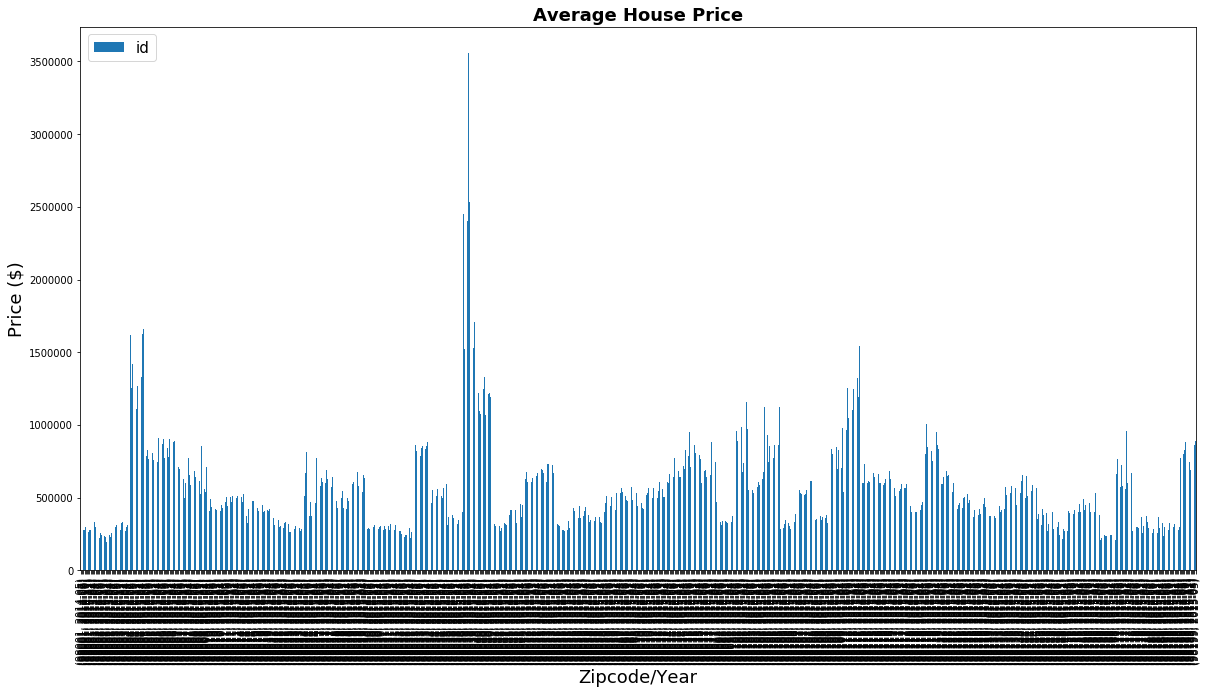

Current size: [20.0, 10.0]


<Figure size 1440x720 with 0 Axes>

In [15]:
housesalebyymszc.plot(kind='bar', y='price')

fig_size = plt.rcParams["figure.figsize"]
 
x_lim = len(housesalebyymszc.index)
# Chart title
plt.title("Average House Price", fontdict = {'fontsize': 18, 'fontweight': 'bold'})
# x label
plt.xlabel("Zipcode/Year", fontdict = {'fontsize': 18})
# y label
plt.ylabel("Price ($)", fontdict = {'fontsize': 18})
# legend 
plt.legend(housesalebyymszc, loc=2, prop={'size': 15})
 
plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('averagepriceinzipcodebyyear.png')

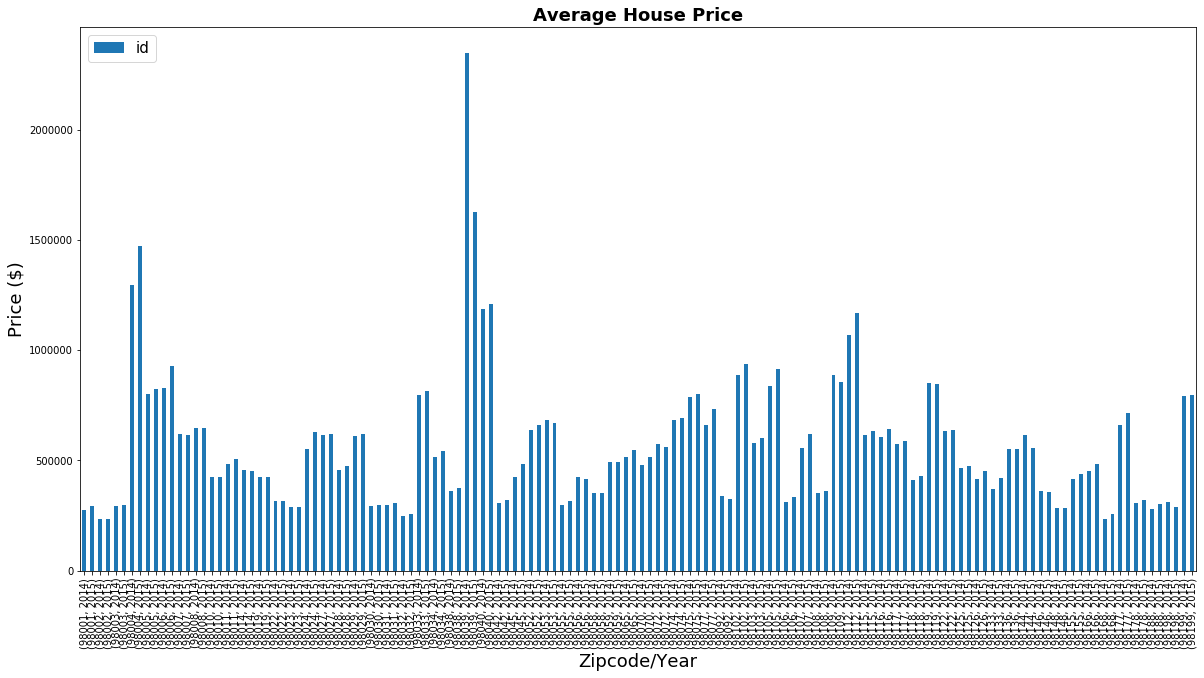

Current size: [20.0, 10.0]


<Figure size 6480x720 with 0 Axes>

In [16]:
housesalebyyearszc.plot(kind='bar', y='price')

fig_size = plt.rcParams["figure.figsize"]
 
x_lim = len(housesalebyymszc.index)
# Chart title
plt.title("Average House Price", fontdict = {'fontsize': 18, 'fontweight': 'bold'})
# x label
plt.xlabel("Zipcode/Year", fontdict = {'fontsize': 18})
# y label
plt.ylabel("Price ($)", fontdict = {'fontsize': 18})
# legend 
plt.legend(housesalebyymszc, loc=2, prop={'size': 15})
 
plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 90
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('averagepriceinzipcodebyyear.png')

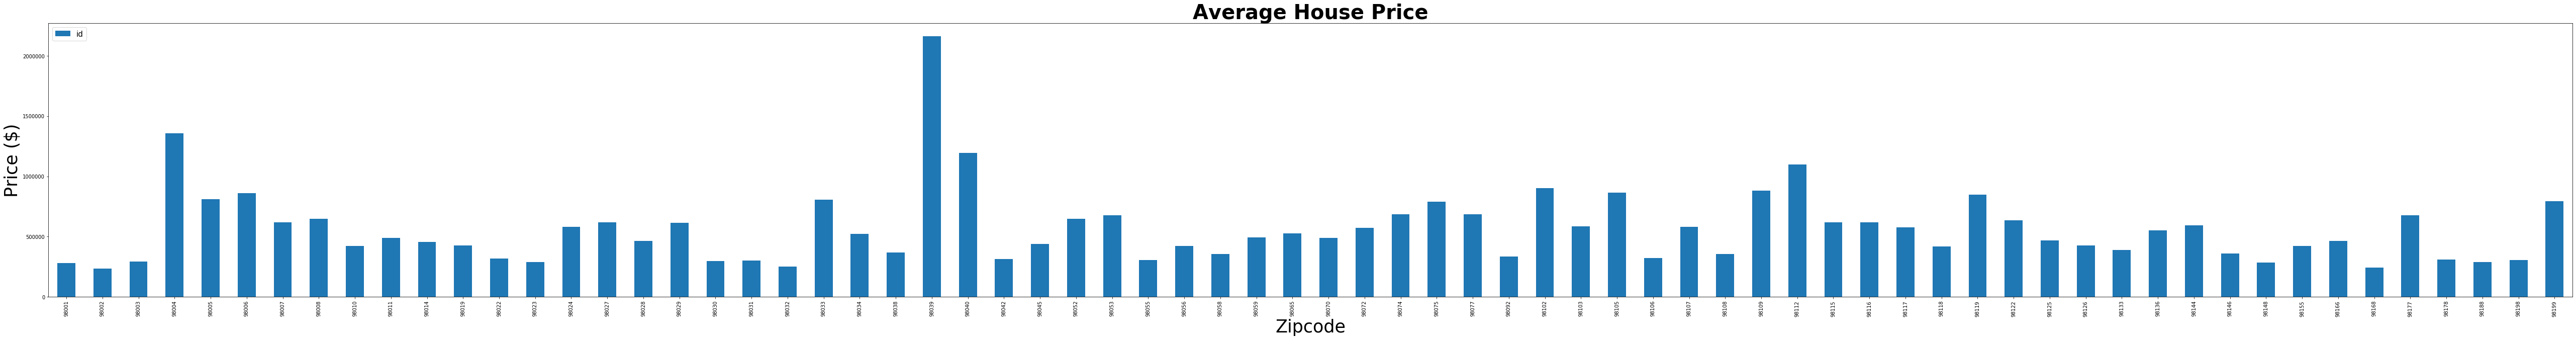

Current size: [90.0, 10.0]


<Figure size 6480x720 with 0 Axes>

In [63]:
byzipcode=df.groupby('zipcode').mean()

byzipcode.plot(kind='bar', y='price')

fig_size = plt.rcParams["figure.figsize"]
 
x_lim = len(housesalebyymszc.index)
# Chart title
plt.title("Average House Price", fontdict = {'fontsize': 40, 'fontweight': 'bold'})
# x label
plt.xlabel("Zipcode", fontdict = {'fontsize': 35})
# y label
plt.ylabel("Price ($)", fontdict = {'fontsize': 35})
# legend 
plt.legend(housesalebyymszc, loc=2, prop={'size': 15})
 
plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 90
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('averagepriceinzipcodeoverall.png')

In [18]:
weatherdata = pd.read_json('Resources/23075d28543cff25d003a483a55b9d88.json')
weatherdata



city_id                                               main  \
0      5799783  {'temp': 275.62, 'temp_min': 271.48, 'temp_max...   
1      5799783  {'temp': 275.61, 'temp_min': 273.71, 'temp_max...   
2      5799783  {'temp': 274.23, 'temp_min': 270.37, 'temp_max...   
3      5799783  {'temp': 273.95, 'temp_min': 270.37, 'temp_max...   
4      5799783  {'temp': 273.55, 'temp_min': 269.82, 'temp_max...   
...        ...                                                ...   
26272  5799783  {'temp': 275.5, 'temp_min': 272.15, 'temp_max'...   
26273  5799783  {'temp': 277.2, 'temp_min': 275.15, 'temp_max'...   
26274  5799783  {'temp': 277.525, 'temp_min': 277.525, 'temp_m...   
26275  5799783  {'temp': 277.85, 'temp_min': 276.55, 'temp_max...   
26276  5799783  {'temp': 276.98, 'temp_min': 276.98, 'temp_max...   

                           wind       clouds  \
0      {'speed': 1, 'deg': 350}   {'all': 1}   
1        {'speed': 0, 'deg': 0}   {'all': 1}   
2        {'speed': 0, 'deg': 0}  {'all': 20}   
3        {'speed': 0, 'deg': 0}   {'all': 1}   
4        {'speed': 0, 'deg': 0}  {'all': 75}   
...                         ...          ...   
26272   {'speed': 1, 'deg': 98}   {'all': 1}   
26273  {'speed': 2, 'deg': 330}   {'all': 1}   
26274  {'speed': 1, 'deg': 210}   {'all': 1}   
26275   {'speed': 0, 'deg': 90}   {'all': 1}   
26276   {'speed': 0, 'deg': 90}   {'all': 1}   

                                                 weather          dt  \
0      [{'id': 800, 'main': 'Clear', 'description': '...  1356998400   
1      [{'id': 800, 'main': 'Clear', 'description': '...  1357002000   
2      [{'id': 801, 'main': 'Clouds', 'description': ...  1357005600   
3      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357009200   
4      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357012800   
...                                                  ...         ...   
26272  [{'id': 500, 'main': 'Rain', 'description': 'l...  1451592000   
26273  [{'id': 800, 'main': 'Clear', 'description': '...  1451595600   
26274  [{'id': 800, 'main': 'Clear', 'description': '...  1451599200   
26275  [{'id': 800, 'main': 'Clear', 'description': '...  1451602800   
26276  [{'id': 800, 'main': 'Clear', 'description': '...  1451606400   

                              dt_iso                         rain snow  
0      2013-01-01 00:00:00 +0000 UTC                          NaN  NaN  
1      2013-01-01 01:00:00 +0000 UTC                          NaN  NaN  
2      2013-01-01 02:00:00 +0000 UTC                          NaN  NaN  
3      2013-01-01 03:00:00 +0000 UTC                          NaN  NaN  
4      2013-01-01 04:00:00 +0000 UTC                          NaN  NaN  
...                              ...                          ...  ...  
26272  2015-12-31 20:00:00 +0000 UTC  {'1h': 0.30000000000000004}  NaN  
26273  2015-12-31 21:00:00 +0000 UTC                          NaN  NaN  
26274  2015-12-31 22:00:00 +0000 UTC                          NaN  NaN  
26275  2015-12-31 23:00:00 +0000 UTC                          NaN  NaN  
26276  2016-01-01 00:00:00 +0000 UTC                          NaN  NaN  

[26277 rows x 9 columns]

In [19]:
date=[]
num = 0
for index, row in weatherdata.iterrows():
    print("working on "+ str(num))
    sdate = weatherdata['dt_iso'].str.split(" ")[num][0]
    date.append(sdate)
    num = num + 1

working on 0
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on 7
working on 8
working on 9
working on 10
working on 11
working on 12
working on 13
working on 14
working on 15
working on 16
working on 17
working on 18
working on 19
working on 20
working on 21
working on 22
working on 23
working on 24
working on 25
working on 26
working on 27
working on 28
working on 29
working on 30
working on 31
working on 32
working on 33
working on 34
working on 35
working on 36
working on 37
working on 38
working on 39
working on 40
working on 41
working on 42
working on 43
working on 44
working on 45
working on 46
working on 47
working on 48
working on 49
working on 50
working on 51
working on 52
working on 53
working on 54
working on 55
working on 56
working on 57
working on 58
working on 59
working on 60
working on 61
working on 62
working on 63
working on 64
working on 65
working on 66
working on 67
working on 68
working on 69
working on 70
working on 71
wo

working on 557
working on 558
working on 559
working on 560
working on 561
working on 562
working on 563
working on 564
working on 565
working on 566
working on 567
working on 568
working on 569
working on 570
working on 571
working on 572
working on 573
working on 574
working on 575
working on 576
working on 577
working on 578
working on 579
working on 580
working on 581
working on 582
working on 583
working on 584
working on 585
working on 586
working on 587
working on 588
working on 589
working on 590
working on 591
working on 592
working on 593
working on 594
working on 595
working on 596
working on 597
working on 598
working on 599
working on 600
working on 601
working on 602
working on 603
working on 604
working on 605
working on 606
working on 607
working on 608
working on 609
working on 610
working on 611
working on 612
working on 613
working on 614
working on 615
working on 616
working on 617
working on 618
working on 619
working on 620
working on 621
working on 622
working on

working on 1100
working on 1101
working on 1102
working on 1103
working on 1104
working on 1105
working on 1106
working on 1107
working on 1108
working on 1109
working on 1110
working on 1111
working on 1112
working on 1113
working on 1114
working on 1115
working on 1116
working on 1117
working on 1118
working on 1119
working on 1120
working on 1121
working on 1122
working on 1123
working on 1124
working on 1125
working on 1126
working on 1127
working on 1128
working on 1129
working on 1130
working on 1131
working on 1132
working on 1133
working on 1134
working on 1135
working on 1136
working on 1137
working on 1138
working on 1139
working on 1140
working on 1141
working on 1142
working on 1143
working on 1144
working on 1145
working on 1146
working on 1147
working on 1148
working on 1149
working on 1150
working on 1151
working on 1152
working on 1153
working on 1154
working on 1155
working on 1156
working on 1157
working on 1158
working on 1159
working on 1160
working on 1161
working 

working on 1616
working on 1617
working on 1618
working on 1619
working on 1620
working on 1621
working on 1622
working on 1623
working on 1624
working on 1625
working on 1626
working on 1627
working on 1628
working on 1629
working on 1630
working on 1631
working on 1632
working on 1633
working on 1634
working on 1635
working on 1636
working on 1637
working on 1638
working on 1639
working on 1640
working on 1641
working on 1642
working on 1643
working on 1644
working on 1645
working on 1646
working on 1647
working on 1648
working on 1649
working on 1650
working on 1651
working on 1652
working on 1653
working on 1654
working on 1655
working on 1656
working on 1657
working on 1658
working on 1659
working on 1660
working on 1661
working on 1662
working on 1663
working on 1664
working on 1665
working on 1666
working on 1667
working on 1668
working on 1669
working on 1670
working on 1671
working on 1672
working on 1673
working on 1674
working on 1675
working on 1676
working on 1677
working 

working on 2130
working on 2131
working on 2132
working on 2133
working on 2134
working on 2135
working on 2136
working on 2137
working on 2138
working on 2139
working on 2140
working on 2141
working on 2142
working on 2143
working on 2144
working on 2145
working on 2146
working on 2147
working on 2148
working on 2149
working on 2150
working on 2151
working on 2152
working on 2153
working on 2154
working on 2155
working on 2156
working on 2157
working on 2158
working on 2159
working on 2160
working on 2161
working on 2162
working on 2163
working on 2164
working on 2165
working on 2166
working on 2167
working on 2168
working on 2169
working on 2170
working on 2171
working on 2172
working on 2173
working on 2174
working on 2175
working on 2176
working on 2177
working on 2178
working on 2179
working on 2180
working on 2181
working on 2182
working on 2183
working on 2184
working on 2185
working on 2186
working on 2187
working on 2188
working on 2189
working on 2190
working on 2191
working 

working on 2645
working on 2646
working on 2647
working on 2648
working on 2649
working on 2650
working on 2651
working on 2652
working on 2653
working on 2654
working on 2655
working on 2656
working on 2657
working on 2658
working on 2659
working on 2660
working on 2661
working on 2662
working on 2663
working on 2664
working on 2665
working on 2666
working on 2667
working on 2668
working on 2669
working on 2670
working on 2671
working on 2672
working on 2673
working on 2674
working on 2675
working on 2676
working on 2677
working on 2678
working on 2679
working on 2680
working on 2681
working on 2682
working on 2683
working on 2684
working on 2685
working on 2686
working on 2687
working on 2688
working on 2689
working on 2690
working on 2691
working on 2692
working on 2693
working on 2694
working on 2695
working on 2696
working on 2697
working on 2698
working on 2699
working on 2700
working on 2701
working on 2702
working on 2703
working on 2704
working on 2705
working on 2706
working 

working on 3158
working on 3159
working on 3160
working on 3161
working on 3162
working on 3163
working on 3164
working on 3165
working on 3166
working on 3167
working on 3168
working on 3169
working on 3170
working on 3171
working on 3172
working on 3173
working on 3174
working on 3175
working on 3176
working on 3177
working on 3178
working on 3179
working on 3180
working on 3181
working on 3182
working on 3183
working on 3184
working on 3185
working on 3186
working on 3187
working on 3188
working on 3189
working on 3190
working on 3191
working on 3192
working on 3193
working on 3194
working on 3195
working on 3196
working on 3197
working on 3198
working on 3199
working on 3200
working on 3201
working on 3202
working on 3203
working on 3204
working on 3205
working on 3206
working on 3207
working on 3208
working on 3209
working on 3210
working on 3211
working on 3212
working on 3213
working on 3214
working on 3215
working on 3216
working on 3217
working on 3218
working on 3219
working 

working on 3670
working on 3671
working on 3672
working on 3673
working on 3674
working on 3675
working on 3676
working on 3677
working on 3678
working on 3679
working on 3680
working on 3681
working on 3682
working on 3683
working on 3684
working on 3685
working on 3686
working on 3687
working on 3688
working on 3689
working on 3690
working on 3691
working on 3692
working on 3693
working on 3694
working on 3695
working on 3696
working on 3697
working on 3698
working on 3699
working on 3700
working on 3701
working on 3702
working on 3703
working on 3704
working on 3705
working on 3706
working on 3707
working on 3708
working on 3709
working on 3710
working on 3711
working on 3712
working on 3713
working on 3714
working on 3715
working on 3716
working on 3717
working on 3718
working on 3719
working on 3720
working on 3721
working on 3722
working on 3723
working on 3724
working on 3725
working on 3726
working on 3727
working on 3728
working on 3729
working on 3730
working on 3731
working 

working on 4185
working on 4186
working on 4187
working on 4188
working on 4189
working on 4190
working on 4191
working on 4192
working on 4193
working on 4194
working on 4195
working on 4196
working on 4197
working on 4198
working on 4199
working on 4200
working on 4201
working on 4202
working on 4203
working on 4204
working on 4205
working on 4206
working on 4207
working on 4208
working on 4209
working on 4210
working on 4211
working on 4212
working on 4213
working on 4214
working on 4215
working on 4216
working on 4217
working on 4218
working on 4219
working on 4220
working on 4221
working on 4222
working on 4223
working on 4224
working on 4225
working on 4226
working on 4227
working on 4228
working on 4229
working on 4230
working on 4231
working on 4232
working on 4233
working on 4234
working on 4235
working on 4236
working on 4237
working on 4238
working on 4239
working on 4240
working on 4241
working on 4242
working on 4243
working on 4244
working on 4245
working on 4246
working 

working on 4699
working on 4700
working on 4701
working on 4702
working on 4703
working on 4704
working on 4705
working on 4706
working on 4707
working on 4708
working on 4709
working on 4710
working on 4711
working on 4712
working on 4713
working on 4714
working on 4715
working on 4716
working on 4717
working on 4718
working on 4719
working on 4720
working on 4721
working on 4722
working on 4723
working on 4724
working on 4725
working on 4726
working on 4727
working on 4728
working on 4729
working on 4730
working on 4731
working on 4732
working on 4733
working on 4734
working on 4735
working on 4736
working on 4737
working on 4738
working on 4739
working on 4740
working on 4741
working on 4742
working on 4743
working on 4744
working on 4745
working on 4746
working on 4747
working on 4748
working on 4749
working on 4750
working on 4751
working on 4752
working on 4753
working on 4754
working on 4755
working on 4756
working on 4757
working on 4758
working on 4759
working on 4760
working 

working on 5215
working on 5216
working on 5217
working on 5218
working on 5219
working on 5220
working on 5221
working on 5222
working on 5223
working on 5224
working on 5225
working on 5226
working on 5227
working on 5228
working on 5229
working on 5230
working on 5231
working on 5232
working on 5233
working on 5234
working on 5235
working on 5236
working on 5237
working on 5238
working on 5239
working on 5240
working on 5241
working on 5242
working on 5243
working on 5244
working on 5245
working on 5246
working on 5247
working on 5248
working on 5249
working on 5250
working on 5251
working on 5252
working on 5253
working on 5254
working on 5255
working on 5256
working on 5257
working on 5258
working on 5259
working on 5260
working on 5261
working on 5262
working on 5263
working on 5264
working on 5265
working on 5266
working on 5267
working on 5268
working on 5269
working on 5270
working on 5271
working on 5272
working on 5273
working on 5274
working on 5275
working on 5276
working 

working on 5729
working on 5730
working on 5731
working on 5732
working on 5733
working on 5734
working on 5735
working on 5736
working on 5737
working on 5738
working on 5739
working on 5740
working on 5741
working on 5742
working on 5743
working on 5744
working on 5745
working on 5746
working on 5747
working on 5748
working on 5749
working on 5750
working on 5751
working on 5752
working on 5753
working on 5754
working on 5755
working on 5756
working on 5757
working on 5758
working on 5759
working on 5760
working on 5761
working on 5762
working on 5763
working on 5764
working on 5765
working on 5766
working on 5767
working on 5768
working on 5769
working on 5770
working on 5771
working on 5772
working on 5773
working on 5774
working on 5775
working on 5776
working on 5777
working on 5778
working on 5779
working on 5780
working on 5781
working on 5782
working on 5783
working on 5784
working on 5785
working on 5786
working on 5787
working on 5788
working on 5789
working on 5790
working 

working on 6241
working on 6242
working on 6243
working on 6244
working on 6245
working on 6246
working on 6247
working on 6248
working on 6249
working on 6250
working on 6251
working on 6252
working on 6253
working on 6254
working on 6255
working on 6256
working on 6257
working on 6258
working on 6259
working on 6260
working on 6261
working on 6262
working on 6263
working on 6264
working on 6265
working on 6266
working on 6267
working on 6268
working on 6269
working on 6270
working on 6271
working on 6272
working on 6273
working on 6274
working on 6275
working on 6276
working on 6277
working on 6278
working on 6279
working on 6280
working on 6281
working on 6282
working on 6283
working on 6284
working on 6285
working on 6286
working on 6287
working on 6288
working on 6289
working on 6290
working on 6291
working on 6292
working on 6293
working on 6294
working on 6295
working on 6296
working on 6297
working on 6298
working on 6299
working on 6300
working on 6301
working on 6302
working 

working on 6755
working on 6756
working on 6757
working on 6758
working on 6759
working on 6760
working on 6761
working on 6762
working on 6763
working on 6764
working on 6765
working on 6766
working on 6767
working on 6768
working on 6769
working on 6770
working on 6771
working on 6772
working on 6773
working on 6774
working on 6775
working on 6776
working on 6777
working on 6778
working on 6779
working on 6780
working on 6781
working on 6782
working on 6783
working on 6784
working on 6785
working on 6786
working on 6787
working on 6788
working on 6789
working on 6790
working on 6791
working on 6792
working on 6793
working on 6794
working on 6795
working on 6796
working on 6797
working on 6798
working on 6799
working on 6800
working on 6801
working on 6802
working on 6803
working on 6804
working on 6805
working on 6806
working on 6807
working on 6808
working on 6809
working on 6810
working on 6811
working on 6812
working on 6813
working on 6814
working on 6815
working on 6816
working 

working on 7270
working on 7271
working on 7272
working on 7273
working on 7274
working on 7275
working on 7276
working on 7277
working on 7278
working on 7279
working on 7280
working on 7281
working on 7282
working on 7283
working on 7284
working on 7285
working on 7286
working on 7287
working on 7288
working on 7289
working on 7290
working on 7291
working on 7292
working on 7293
working on 7294
working on 7295
working on 7296
working on 7297
working on 7298
working on 7299
working on 7300
working on 7301
working on 7302
working on 7303
working on 7304
working on 7305
working on 7306
working on 7307
working on 7308
working on 7309
working on 7310
working on 7311
working on 7312
working on 7313
working on 7314
working on 7315
working on 7316
working on 7317
working on 7318
working on 7319
working on 7320
working on 7321
working on 7322
working on 7323
working on 7324
working on 7325
working on 7326
working on 7327
working on 7328
working on 7329
working on 7330
working on 7331
working 

working on 7786
working on 7787
working on 7788
working on 7789
working on 7790
working on 7791
working on 7792
working on 7793
working on 7794
working on 7795
working on 7796
working on 7797
working on 7798
working on 7799
working on 7800
working on 7801
working on 7802
working on 7803
working on 7804
working on 7805
working on 7806
working on 7807
working on 7808
working on 7809
working on 7810
working on 7811
working on 7812
working on 7813
working on 7814
working on 7815
working on 7816
working on 7817
working on 7818
working on 7819
working on 7820
working on 7821
working on 7822
working on 7823
working on 7824
working on 7825
working on 7826
working on 7827
working on 7828
working on 7829
working on 7830
working on 7831
working on 7832
working on 7833
working on 7834
working on 7835
working on 7836
working on 7837
working on 7838
working on 7839
working on 7840
working on 7841
working on 7842
working on 7843
working on 7844
working on 7845
working on 7846
working on 7847
working 

working on 8301
working on 8302
working on 8303
working on 8304
working on 8305
working on 8306
working on 8307
working on 8308
working on 8309
working on 8310
working on 8311
working on 8312
working on 8313
working on 8314
working on 8315
working on 8316
working on 8317
working on 8318
working on 8319
working on 8320
working on 8321
working on 8322
working on 8323
working on 8324
working on 8325
working on 8326
working on 8327
working on 8328
working on 8329
working on 8330
working on 8331
working on 8332
working on 8333
working on 8334
working on 8335
working on 8336
working on 8337
working on 8338
working on 8339
working on 8340
working on 8341
working on 8342
working on 8343
working on 8344
working on 8345
working on 8346
working on 8347
working on 8348
working on 8349
working on 8350
working on 8351
working on 8352
working on 8353
working on 8354
working on 8355
working on 8356
working on 8357
working on 8358
working on 8359
working on 8360
working on 8361
working on 8362
working 

working on 8818
working on 8819
working on 8820
working on 8821
working on 8822
working on 8823
working on 8824
working on 8825
working on 8826
working on 8827
working on 8828
working on 8829
working on 8830
working on 8831
working on 8832
working on 8833
working on 8834
working on 8835
working on 8836
working on 8837
working on 8838
working on 8839
working on 8840
working on 8841
working on 8842
working on 8843
working on 8844
working on 8845
working on 8846
working on 8847
working on 8848
working on 8849
working on 8850
working on 8851
working on 8852
working on 8853
working on 8854
working on 8855
working on 8856
working on 8857
working on 8858
working on 8859
working on 8860
working on 8861
working on 8862
working on 8863
working on 8864
working on 8865
working on 8866
working on 8867
working on 8868
working on 8869
working on 8870
working on 8871
working on 8872
working on 8873
working on 8874
working on 8875
working on 8876
working on 8877
working on 8878
working on 8879
working 

working on 9331
working on 9332
working on 9333
working on 9334
working on 9335
working on 9336
working on 9337
working on 9338
working on 9339
working on 9340
working on 9341
working on 9342
working on 9343
working on 9344
working on 9345
working on 9346
working on 9347
working on 9348
working on 9349
working on 9350
working on 9351
working on 9352
working on 9353
working on 9354
working on 9355
working on 9356
working on 9357
working on 9358
working on 9359
working on 9360
working on 9361
working on 9362
working on 9363
working on 9364
working on 9365
working on 9366
working on 9367
working on 9368
working on 9369
working on 9370
working on 9371
working on 9372
working on 9373
working on 9374
working on 9375
working on 9376
working on 9377
working on 9378
working on 9379
working on 9380
working on 9381
working on 9382
working on 9383
working on 9384
working on 9385
working on 9386
working on 9387
working on 9388
working on 9389
working on 9390
working on 9391
working on 9392
working 

working on 9843
working on 9844
working on 9845
working on 9846
working on 9847
working on 9848
working on 9849
working on 9850
working on 9851
working on 9852
working on 9853
working on 9854
working on 9855
working on 9856
working on 9857
working on 9858
working on 9859
working on 9860
working on 9861
working on 9862
working on 9863
working on 9864
working on 9865
working on 9866
working on 9867
working on 9868
working on 9869
working on 9870
working on 9871
working on 9872
working on 9873
working on 9874
working on 9875
working on 9876
working on 9877
working on 9878
working on 9879
working on 9880
working on 9881
working on 9882
working on 9883
working on 9884
working on 9885
working on 9886
working on 9887
working on 9888
working on 9889
working on 9890
working on 9891
working on 9892
working on 9893
working on 9894
working on 9895
working on 9896
working on 9897
working on 9898
working on 9899
working on 9900
working on 9901
working on 9902
working on 9903
working on 9904
working 

working on 10336
working on 10337
working on 10338
working on 10339
working on 10340
working on 10341
working on 10342
working on 10343
working on 10344
working on 10345
working on 10346
working on 10347
working on 10348
working on 10349
working on 10350
working on 10351
working on 10352
working on 10353
working on 10354
working on 10355
working on 10356
working on 10357
working on 10358
working on 10359
working on 10360
working on 10361
working on 10362
working on 10363
working on 10364
working on 10365
working on 10366
working on 10367
working on 10368
working on 10369
working on 10370
working on 10371
working on 10372
working on 10373
working on 10374
working on 10375
working on 10376
working on 10377
working on 10378
working on 10379
working on 10380
working on 10381
working on 10382
working on 10383
working on 10384
working on 10385
working on 10386
working on 10387
working on 10388
working on 10389
working on 10390
working on 10391
working on 10392
working on 10393
working on 103

working on 10819
working on 10820
working on 10821
working on 10822
working on 10823
working on 10824
working on 10825
working on 10826
working on 10827
working on 10828
working on 10829
working on 10830
working on 10831
working on 10832
working on 10833
working on 10834
working on 10835
working on 10836
working on 10837
working on 10838
working on 10839
working on 10840
working on 10841
working on 10842
working on 10843
working on 10844
working on 10845
working on 10846
working on 10847
working on 10848
working on 10849
working on 10850
working on 10851
working on 10852
working on 10853
working on 10854
working on 10855
working on 10856
working on 10857
working on 10858
working on 10859
working on 10860
working on 10861
working on 10862
working on 10863
working on 10864
working on 10865
working on 10866
working on 10867
working on 10868
working on 10869
working on 10870
working on 10871
working on 10872
working on 10873
working on 10874
working on 10875
working on 10876
working on 108

working on 11302
working on 11303
working on 11304
working on 11305
working on 11306
working on 11307
working on 11308
working on 11309
working on 11310
working on 11311
working on 11312
working on 11313
working on 11314
working on 11315
working on 11316
working on 11317
working on 11318
working on 11319
working on 11320
working on 11321
working on 11322
working on 11323
working on 11324
working on 11325
working on 11326
working on 11327
working on 11328
working on 11329
working on 11330
working on 11331
working on 11332
working on 11333
working on 11334
working on 11335
working on 11336
working on 11337
working on 11338
working on 11339
working on 11340
working on 11341
working on 11342
working on 11343
working on 11344
working on 11345
working on 11346
working on 11347
working on 11348
working on 11349
working on 11350
working on 11351
working on 11352
working on 11353
working on 11354
working on 11355
working on 11356
working on 11357
working on 11358
working on 11359
working on 113

working on 11789
working on 11790
working on 11791
working on 11792
working on 11793
working on 11794
working on 11795
working on 11796
working on 11797
working on 11798
working on 11799
working on 11800
working on 11801
working on 11802
working on 11803
working on 11804
working on 11805
working on 11806
working on 11807
working on 11808
working on 11809
working on 11810
working on 11811
working on 11812
working on 11813
working on 11814
working on 11815
working on 11816
working on 11817
working on 11818
working on 11819
working on 11820
working on 11821
working on 11822
working on 11823
working on 11824
working on 11825
working on 11826
working on 11827
working on 11828
working on 11829
working on 11830
working on 11831
working on 11832
working on 11833
working on 11834
working on 11835
working on 11836
working on 11837
working on 11838
working on 11839
working on 11840
working on 11841
working on 11842
working on 11843
working on 11844
working on 11845
working on 11846
working on 118

working on 12271
working on 12272
working on 12273
working on 12274
working on 12275
working on 12276
working on 12277
working on 12278
working on 12279
working on 12280
working on 12281
working on 12282
working on 12283
working on 12284
working on 12285
working on 12286
working on 12287
working on 12288
working on 12289
working on 12290
working on 12291
working on 12292
working on 12293
working on 12294
working on 12295
working on 12296
working on 12297
working on 12298
working on 12299
working on 12300
working on 12301
working on 12302
working on 12303
working on 12304
working on 12305
working on 12306
working on 12307
working on 12308
working on 12309
working on 12310
working on 12311
working on 12312
working on 12313
working on 12314
working on 12315
working on 12316
working on 12317
working on 12318
working on 12319
working on 12320
working on 12321
working on 12322
working on 12323
working on 12324
working on 12325
working on 12326
working on 12327
working on 12328
working on 123

working on 12754
working on 12755
working on 12756
working on 12757
working on 12758
working on 12759
working on 12760
working on 12761
working on 12762
working on 12763
working on 12764
working on 12765
working on 12766
working on 12767
working on 12768
working on 12769
working on 12770
working on 12771
working on 12772
working on 12773
working on 12774
working on 12775
working on 12776
working on 12777
working on 12778
working on 12779
working on 12780
working on 12781
working on 12782
working on 12783
working on 12784
working on 12785
working on 12786
working on 12787
working on 12788
working on 12789
working on 12790
working on 12791
working on 12792
working on 12793
working on 12794
working on 12795
working on 12796
working on 12797
working on 12798
working on 12799
working on 12800
working on 12801
working on 12802
working on 12803
working on 12804
working on 12805
working on 12806
working on 12807
working on 12808
working on 12809
working on 12810
working on 12811
working on 128

working on 13240
working on 13241
working on 13242
working on 13243
working on 13244
working on 13245
working on 13246
working on 13247
working on 13248
working on 13249
working on 13250
working on 13251
working on 13252
working on 13253
working on 13254
working on 13255
working on 13256
working on 13257
working on 13258
working on 13259
working on 13260
working on 13261
working on 13262
working on 13263
working on 13264
working on 13265
working on 13266
working on 13267
working on 13268
working on 13269
working on 13270
working on 13271
working on 13272
working on 13273
working on 13274
working on 13275
working on 13276
working on 13277
working on 13278
working on 13279
working on 13280
working on 13281
working on 13282
working on 13283
working on 13284
working on 13285
working on 13286
working on 13287
working on 13288
working on 13289
working on 13290
working on 13291
working on 13292
working on 13293
working on 13294
working on 13295
working on 13296
working on 13297
working on 132

working on 13722
working on 13723
working on 13724
working on 13725
working on 13726
working on 13727
working on 13728
working on 13729
working on 13730
working on 13731
working on 13732
working on 13733
working on 13734
working on 13735
working on 13736
working on 13737
working on 13738
working on 13739
working on 13740
working on 13741
working on 13742
working on 13743
working on 13744
working on 13745
working on 13746
working on 13747
working on 13748
working on 13749
working on 13750
working on 13751
working on 13752
working on 13753
working on 13754
working on 13755
working on 13756
working on 13757
working on 13758
working on 13759
working on 13760
working on 13761
working on 13762
working on 13763
working on 13764
working on 13765
working on 13766
working on 13767
working on 13768
working on 13769
working on 13770
working on 13771
working on 13772
working on 13773
working on 13774
working on 13775
working on 13776
working on 13777
working on 13778
working on 13779
working on 137

working on 14209
working on 14210
working on 14211
working on 14212
working on 14213
working on 14214
working on 14215
working on 14216
working on 14217
working on 14218
working on 14219
working on 14220
working on 14221
working on 14222
working on 14223
working on 14224
working on 14225
working on 14226
working on 14227
working on 14228
working on 14229
working on 14230
working on 14231
working on 14232
working on 14233
working on 14234
working on 14235
working on 14236
working on 14237
working on 14238
working on 14239
working on 14240
working on 14241
working on 14242
working on 14243
working on 14244
working on 14245
working on 14246
working on 14247
working on 14248
working on 14249
working on 14250
working on 14251
working on 14252
working on 14253
working on 14254
working on 14255
working on 14256
working on 14257
working on 14258
working on 14259
working on 14260
working on 14261
working on 14262
working on 14263
working on 14264
working on 14265
working on 14266
working on 142

working on 14694
working on 14695
working on 14696
working on 14697
working on 14698
working on 14699
working on 14700
working on 14701
working on 14702
working on 14703
working on 14704
working on 14705
working on 14706
working on 14707
working on 14708
working on 14709
working on 14710
working on 14711
working on 14712
working on 14713
working on 14714
working on 14715
working on 14716
working on 14717
working on 14718
working on 14719
working on 14720
working on 14721
working on 14722
working on 14723
working on 14724
working on 14725
working on 14726
working on 14727
working on 14728
working on 14729
working on 14730
working on 14731
working on 14732
working on 14733
working on 14734
working on 14735
working on 14736
working on 14737
working on 14738
working on 14739
working on 14740
working on 14741
working on 14742
working on 14743
working on 14744
working on 14745
working on 14746
working on 14747
working on 14748
working on 14749
working on 14750
working on 14751
working on 147

working on 15177
working on 15178
working on 15179
working on 15180
working on 15181
working on 15182
working on 15183
working on 15184
working on 15185
working on 15186
working on 15187
working on 15188
working on 15189
working on 15190
working on 15191
working on 15192
working on 15193
working on 15194
working on 15195
working on 15196
working on 15197
working on 15198
working on 15199
working on 15200
working on 15201
working on 15202
working on 15203
working on 15204
working on 15205
working on 15206
working on 15207
working on 15208
working on 15209
working on 15210
working on 15211
working on 15212
working on 15213
working on 15214
working on 15215
working on 15216
working on 15217
working on 15218
working on 15219
working on 15220
working on 15221
working on 15222
working on 15223
working on 15224
working on 15225
working on 15226
working on 15227
working on 15228
working on 15229
working on 15230
working on 15231
working on 15232
working on 15233
working on 15234
working on 152

working on 15660
working on 15661
working on 15662
working on 15663
working on 15664
working on 15665
working on 15666
working on 15667
working on 15668
working on 15669
working on 15670
working on 15671
working on 15672
working on 15673
working on 15674
working on 15675
working on 15676
working on 15677
working on 15678
working on 15679
working on 15680
working on 15681
working on 15682
working on 15683
working on 15684
working on 15685
working on 15686
working on 15687
working on 15688
working on 15689
working on 15690
working on 15691
working on 15692
working on 15693
working on 15694
working on 15695
working on 15696
working on 15697
working on 15698
working on 15699
working on 15700
working on 15701
working on 15702
working on 15703
working on 15704
working on 15705
working on 15706
working on 15707
working on 15708
working on 15709
working on 15710
working on 15711
working on 15712
working on 15713
working on 15714
working on 15715
working on 15716
working on 15717
working on 157

working on 16145
working on 16146
working on 16147
working on 16148
working on 16149
working on 16150
working on 16151
working on 16152
working on 16153
working on 16154
working on 16155
working on 16156
working on 16157
working on 16158
working on 16159
working on 16160
working on 16161
working on 16162
working on 16163
working on 16164
working on 16165
working on 16166
working on 16167
working on 16168
working on 16169
working on 16170
working on 16171
working on 16172
working on 16173
working on 16174
working on 16175
working on 16176
working on 16177
working on 16178
working on 16179
working on 16180
working on 16181
working on 16182
working on 16183
working on 16184
working on 16185
working on 16186
working on 16187
working on 16188
working on 16189
working on 16190
working on 16191
working on 16192
working on 16193
working on 16194
working on 16195
working on 16196
working on 16197
working on 16198
working on 16199
working on 16200
working on 16201
working on 16202
working on 162

working on 16629
working on 16630
working on 16631
working on 16632
working on 16633
working on 16634
working on 16635
working on 16636
working on 16637
working on 16638
working on 16639
working on 16640
working on 16641
working on 16642
working on 16643
working on 16644
working on 16645
working on 16646
working on 16647
working on 16648
working on 16649
working on 16650
working on 16651
working on 16652
working on 16653
working on 16654
working on 16655
working on 16656
working on 16657
working on 16658
working on 16659
working on 16660
working on 16661
working on 16662
working on 16663
working on 16664
working on 16665
working on 16666
working on 16667
working on 16668
working on 16669
working on 16670
working on 16671
working on 16672
working on 16673
working on 16674
working on 16675
working on 16676
working on 16677
working on 16678
working on 16679
working on 16680
working on 16681
working on 16682
working on 16683
working on 16684
working on 16685
working on 16686
working on 166

working on 17114
working on 17115
working on 17116
working on 17117
working on 17118
working on 17119
working on 17120
working on 17121
working on 17122
working on 17123
working on 17124
working on 17125
working on 17126
working on 17127
working on 17128
working on 17129
working on 17130
working on 17131
working on 17132
working on 17133
working on 17134
working on 17135
working on 17136
working on 17137
working on 17138
working on 17139
working on 17140
working on 17141
working on 17142
working on 17143
working on 17144
working on 17145
working on 17146
working on 17147
working on 17148
working on 17149
working on 17150
working on 17151
working on 17152
working on 17153
working on 17154
working on 17155
working on 17156
working on 17157
working on 17158
working on 17159
working on 17160
working on 17161
working on 17162
working on 17163
working on 17164
working on 17165
working on 17166
working on 17167
working on 17168
working on 17169
working on 17170
working on 17171
working on 171

working on 17599
working on 17600
working on 17601
working on 17602
working on 17603
working on 17604
working on 17605
working on 17606
working on 17607
working on 17608
working on 17609
working on 17610
working on 17611
working on 17612
working on 17613
working on 17614
working on 17615
working on 17616
working on 17617
working on 17618
working on 17619
working on 17620
working on 17621
working on 17622
working on 17623
working on 17624
working on 17625
working on 17626
working on 17627
working on 17628
working on 17629
working on 17630
working on 17631
working on 17632
working on 17633
working on 17634
working on 17635
working on 17636
working on 17637
working on 17638
working on 17639
working on 17640
working on 17641
working on 17642
working on 17643
working on 17644
working on 17645
working on 17646
working on 17647
working on 17648
working on 17649
working on 17650
working on 17651
working on 17652
working on 17653
working on 17654
working on 17655
working on 17656
working on 176

working on 18082
working on 18083
working on 18084
working on 18085
working on 18086
working on 18087
working on 18088
working on 18089
working on 18090
working on 18091
working on 18092
working on 18093
working on 18094
working on 18095
working on 18096
working on 18097
working on 18098
working on 18099
working on 18100
working on 18101
working on 18102
working on 18103
working on 18104
working on 18105
working on 18106
working on 18107
working on 18108
working on 18109
working on 18110
working on 18111
working on 18112
working on 18113
working on 18114
working on 18115
working on 18116
working on 18117
working on 18118
working on 18119
working on 18120
working on 18121
working on 18122
working on 18123
working on 18124
working on 18125
working on 18126
working on 18127
working on 18128
working on 18129
working on 18130
working on 18131
working on 18132
working on 18133
working on 18134
working on 18135
working on 18136
working on 18137
working on 18138
working on 18139
working on 181

working on 18568
working on 18569
working on 18570
working on 18571
working on 18572
working on 18573
working on 18574
working on 18575
working on 18576
working on 18577
working on 18578
working on 18579
working on 18580
working on 18581
working on 18582
working on 18583
working on 18584
working on 18585
working on 18586
working on 18587
working on 18588
working on 18589
working on 18590
working on 18591
working on 18592
working on 18593
working on 18594
working on 18595
working on 18596
working on 18597
working on 18598
working on 18599
working on 18600
working on 18601
working on 18602
working on 18603
working on 18604
working on 18605
working on 18606
working on 18607
working on 18608
working on 18609
working on 18610
working on 18611
working on 18612
working on 18613
working on 18614
working on 18615
working on 18616
working on 18617
working on 18618
working on 18619
working on 18620
working on 18621
working on 18622
working on 18623
working on 18624
working on 18625
working on 186

working on 19052
working on 19053
working on 19054
working on 19055
working on 19056
working on 19057
working on 19058
working on 19059
working on 19060
working on 19061
working on 19062
working on 19063
working on 19064
working on 19065
working on 19066
working on 19067
working on 19068
working on 19069
working on 19070
working on 19071
working on 19072
working on 19073
working on 19074
working on 19075
working on 19076
working on 19077
working on 19078
working on 19079
working on 19080
working on 19081
working on 19082
working on 19083
working on 19084
working on 19085
working on 19086
working on 19087
working on 19088
working on 19089
working on 19090
working on 19091
working on 19092
working on 19093
working on 19094
working on 19095
working on 19096
working on 19097
working on 19098
working on 19099
working on 19100
working on 19101
working on 19102
working on 19103
working on 19104
working on 19105
working on 19106
working on 19107
working on 19108
working on 19109
working on 191

working on 19535
working on 19536
working on 19537
working on 19538
working on 19539
working on 19540
working on 19541
working on 19542
working on 19543
working on 19544
working on 19545
working on 19546
working on 19547
working on 19548
working on 19549
working on 19550
working on 19551
working on 19552
working on 19553
working on 19554
working on 19555
working on 19556
working on 19557
working on 19558
working on 19559
working on 19560
working on 19561
working on 19562
working on 19563
working on 19564
working on 19565
working on 19566
working on 19567
working on 19568
working on 19569
working on 19570
working on 19571
working on 19572
working on 19573
working on 19574
working on 19575
working on 19576
working on 19577
working on 19578
working on 19579
working on 19580
working on 19581
working on 19582
working on 19583
working on 19584
working on 19585
working on 19586
working on 19587
working on 19588
working on 19589
working on 19590
working on 19591
working on 19592
working on 195

working on 20019
working on 20020
working on 20021
working on 20022
working on 20023
working on 20024
working on 20025
working on 20026
working on 20027
working on 20028
working on 20029
working on 20030
working on 20031
working on 20032
working on 20033
working on 20034
working on 20035
working on 20036
working on 20037
working on 20038
working on 20039
working on 20040
working on 20041
working on 20042
working on 20043
working on 20044
working on 20045
working on 20046
working on 20047
working on 20048
working on 20049
working on 20050
working on 20051
working on 20052
working on 20053
working on 20054
working on 20055
working on 20056
working on 20057
working on 20058
working on 20059
working on 20060
working on 20061
working on 20062
working on 20063
working on 20064
working on 20065
working on 20066
working on 20067
working on 20068
working on 20069
working on 20070
working on 20071
working on 20072
working on 20073
working on 20074
working on 20075
working on 20076
working on 200

working on 20503
working on 20504
working on 20505
working on 20506
working on 20507
working on 20508
working on 20509
working on 20510
working on 20511
working on 20512
working on 20513
working on 20514
working on 20515
working on 20516
working on 20517
working on 20518
working on 20519
working on 20520
working on 20521
working on 20522
working on 20523
working on 20524
working on 20525
working on 20526
working on 20527
working on 20528
working on 20529
working on 20530
working on 20531
working on 20532
working on 20533
working on 20534
working on 20535
working on 20536
working on 20537
working on 20538
working on 20539
working on 20540
working on 20541
working on 20542
working on 20543
working on 20544
working on 20545
working on 20546
working on 20547
working on 20548
working on 20549
working on 20550
working on 20551
working on 20552
working on 20553
working on 20554
working on 20555
working on 20556
working on 20557
working on 20558
working on 20559
working on 20560
working on 205

working on 20986
working on 20987
working on 20988
working on 20989
working on 20990
working on 20991
working on 20992
working on 20993
working on 20994
working on 20995
working on 20996
working on 20997
working on 20998
working on 20999
working on 21000
working on 21001
working on 21002
working on 21003
working on 21004
working on 21005
working on 21006
working on 21007
working on 21008
working on 21009
working on 21010
working on 21011
working on 21012
working on 21013
working on 21014
working on 21015
working on 21016
working on 21017
working on 21018
working on 21019
working on 21020
working on 21021
working on 21022
working on 21023
working on 21024
working on 21025
working on 21026
working on 21027
working on 21028
working on 21029
working on 21030
working on 21031
working on 21032
working on 21033
working on 21034
working on 21035
working on 21036
working on 21037
working on 21038
working on 21039
working on 21040
working on 21041
working on 21042
working on 21043
working on 210

working on 21468
working on 21469
working on 21470
working on 21471
working on 21472
working on 21473
working on 21474
working on 21475
working on 21476
working on 21477
working on 21478
working on 21479
working on 21480
working on 21481
working on 21482
working on 21483
working on 21484
working on 21485
working on 21486
working on 21487
working on 21488
working on 21489
working on 21490
working on 21491
working on 21492
working on 21493
working on 21494
working on 21495
working on 21496
working on 21497
working on 21498
working on 21499
working on 21500
working on 21501
working on 21502
working on 21503
working on 21504
working on 21505
working on 21506
working on 21507
working on 21508
working on 21509
working on 21510
working on 21511
working on 21512
working on 21513
working on 21514
working on 21515
working on 21516
working on 21517
working on 21518
working on 21519
working on 21520
working on 21521
working on 21522
working on 21523
working on 21524
working on 21525
working on 215

working on 21953
working on 21954
working on 21955
working on 21956
working on 21957
working on 21958
working on 21959
working on 21960
working on 21961
working on 21962
working on 21963
working on 21964
working on 21965
working on 21966
working on 21967
working on 21968
working on 21969
working on 21970
working on 21971
working on 21972
working on 21973
working on 21974
working on 21975
working on 21976
working on 21977
working on 21978
working on 21979
working on 21980
working on 21981
working on 21982
working on 21983
working on 21984
working on 21985
working on 21986
working on 21987
working on 21988
working on 21989
working on 21990
working on 21991
working on 21992
working on 21993
working on 21994
working on 21995
working on 21996
working on 21997
working on 21998
working on 21999
working on 22000
working on 22001
working on 22002
working on 22003
working on 22004
working on 22005
working on 22006
working on 22007
working on 22008
working on 22009
working on 22010
working on 220

working on 22435
working on 22436
working on 22437
working on 22438
working on 22439
working on 22440
working on 22441
working on 22442
working on 22443
working on 22444
working on 22445
working on 22446
working on 22447
working on 22448
working on 22449
working on 22450
working on 22451
working on 22452
working on 22453
working on 22454
working on 22455
working on 22456
working on 22457
working on 22458
working on 22459
working on 22460
working on 22461
working on 22462
working on 22463
working on 22464
working on 22465
working on 22466
working on 22467
working on 22468
working on 22469
working on 22470
working on 22471
working on 22472
working on 22473
working on 22474
working on 22475
working on 22476
working on 22477
working on 22478
working on 22479
working on 22480
working on 22481
working on 22482
working on 22483
working on 22484
working on 22485
working on 22486
working on 22487
working on 22488
working on 22489
working on 22490
working on 22491
working on 22492
working on 224

working on 22918
working on 22919
working on 22920
working on 22921
working on 22922
working on 22923
working on 22924
working on 22925
working on 22926
working on 22927
working on 22928
working on 22929
working on 22930
working on 22931
working on 22932
working on 22933
working on 22934
working on 22935
working on 22936
working on 22937
working on 22938
working on 22939
working on 22940
working on 22941
working on 22942
working on 22943
working on 22944
working on 22945
working on 22946
working on 22947
working on 22948
working on 22949
working on 22950
working on 22951
working on 22952
working on 22953
working on 22954
working on 22955
working on 22956
working on 22957
working on 22958
working on 22959
working on 22960
working on 22961
working on 22962
working on 22963
working on 22964
working on 22965
working on 22966
working on 22967
working on 22968
working on 22969
working on 22970
working on 22971
working on 22972
working on 22973
working on 22974
working on 22975
working on 229

working on 23401
working on 23402
working on 23403
working on 23404
working on 23405
working on 23406
working on 23407
working on 23408
working on 23409
working on 23410
working on 23411
working on 23412
working on 23413
working on 23414
working on 23415
working on 23416
working on 23417
working on 23418
working on 23419
working on 23420
working on 23421
working on 23422
working on 23423
working on 23424
working on 23425
working on 23426
working on 23427
working on 23428
working on 23429
working on 23430
working on 23431
working on 23432
working on 23433
working on 23434
working on 23435
working on 23436
working on 23437
working on 23438
working on 23439
working on 23440
working on 23441
working on 23442
working on 23443
working on 23444
working on 23445
working on 23446
working on 23447
working on 23448
working on 23449
working on 23450
working on 23451
working on 23452
working on 23453
working on 23454
working on 23455
working on 23456
working on 23457
working on 23458
working on 234

working on 23885
working on 23886
working on 23887
working on 23888
working on 23889
working on 23890
working on 23891
working on 23892
working on 23893
working on 23894
working on 23895
working on 23896
working on 23897
working on 23898
working on 23899
working on 23900
working on 23901
working on 23902
working on 23903
working on 23904
working on 23905
working on 23906
working on 23907
working on 23908
working on 23909
working on 23910
working on 23911
working on 23912
working on 23913
working on 23914
working on 23915
working on 23916
working on 23917
working on 23918
working on 23919
working on 23920
working on 23921
working on 23922
working on 23923
working on 23924
working on 23925
working on 23926
working on 23927
working on 23928
working on 23929
working on 23930
working on 23931
working on 23932
working on 23933
working on 23934
working on 23935
working on 23936
working on 23937
working on 23938
working on 23939
working on 23940
working on 23941
working on 23942
working on 239

working on 24367
working on 24368
working on 24369
working on 24370
working on 24371
working on 24372
working on 24373
working on 24374
working on 24375
working on 24376
working on 24377
working on 24378
working on 24379
working on 24380
working on 24381
working on 24382
working on 24383
working on 24384
working on 24385
working on 24386
working on 24387
working on 24388
working on 24389
working on 24390
working on 24391
working on 24392
working on 24393
working on 24394
working on 24395
working on 24396
working on 24397
working on 24398
working on 24399
working on 24400
working on 24401
working on 24402
working on 24403
working on 24404
working on 24405
working on 24406
working on 24407
working on 24408
working on 24409
working on 24410
working on 24411
working on 24412
working on 24413
working on 24414
working on 24415
working on 24416
working on 24417
working on 24418
working on 24419
working on 24420
working on 24421
working on 24422
working on 24423
working on 24424
working on 244

working on 24853
working on 24854
working on 24855
working on 24856
working on 24857
working on 24858
working on 24859
working on 24860
working on 24861
working on 24862
working on 24863
working on 24864
working on 24865
working on 24866
working on 24867
working on 24868
working on 24869
working on 24870
working on 24871
working on 24872
working on 24873
working on 24874
working on 24875
working on 24876
working on 24877
working on 24878
working on 24879
working on 24880
working on 24881
working on 24882
working on 24883
working on 24884
working on 24885
working on 24886
working on 24887
working on 24888
working on 24889
working on 24890
working on 24891
working on 24892
working on 24893
working on 24894
working on 24895
working on 24896
working on 24897
working on 24898
working on 24899
working on 24900
working on 24901
working on 24902
working on 24903
working on 24904
working on 24905
working on 24906
working on 24907
working on 24908
working on 24909
working on 24910
working on 249

working on 25335
working on 25336
working on 25337
working on 25338
working on 25339
working on 25340
working on 25341
working on 25342
working on 25343
working on 25344
working on 25345
working on 25346
working on 25347
working on 25348
working on 25349
working on 25350
working on 25351
working on 25352
working on 25353
working on 25354
working on 25355
working on 25356
working on 25357
working on 25358
working on 25359
working on 25360
working on 25361
working on 25362
working on 25363
working on 25364
working on 25365
working on 25366
working on 25367
working on 25368
working on 25369
working on 25370
working on 25371
working on 25372
working on 25373
working on 25374
working on 25375
working on 25376
working on 25377
working on 25378
working on 25379
working on 25380
working on 25381
working on 25382
working on 25383
working on 25384
working on 25385
working on 25386
working on 25387
working on 25388
working on 25389
working on 25390
working on 25391
working on 25392
working on 253

working on 25818
working on 25819
working on 25820
working on 25821
working on 25822
working on 25823
working on 25824
working on 25825
working on 25826
working on 25827
working on 25828
working on 25829
working on 25830
working on 25831
working on 25832
working on 25833
working on 25834
working on 25835
working on 25836
working on 25837
working on 25838
working on 25839
working on 25840
working on 25841
working on 25842
working on 25843
working on 25844
working on 25845
working on 25846
working on 25847
working on 25848
working on 25849
working on 25850
working on 25851
working on 25852
working on 25853
working on 25854
working on 25855
working on 25856
working on 25857
working on 25858
working on 25859
working on 25860
working on 25861
working on 25862
working on 25863
working on 25864
working on 25865
working on 25866
working on 25867
working on 25868
working on 25869
working on 25870
working on 25871
working on 25872
working on 25873
working on 25874
working on 25875
working on 258

In [20]:
weatherdata['date']= date
weatherdata

city_id                                               main  \
0      5799783  {'temp': 275.62, 'temp_min': 271.48, 'temp_max...   
1      5799783  {'temp': 275.61, 'temp_min': 273.71, 'temp_max...   
2      5799783  {'temp': 274.23, 'temp_min': 270.37, 'temp_max...   
3      5799783  {'temp': 273.95, 'temp_min': 270.37, 'temp_max...   
4      5799783  {'temp': 273.55, 'temp_min': 269.82, 'temp_max...   
...        ...                                                ...   
26272  5799783  {'temp': 275.5, 'temp_min': 272.15, 'temp_max'...   
26273  5799783  {'temp': 277.2, 'temp_min': 275.15, 'temp_max'...   
26274  5799783  {'temp': 277.525, 'temp_min': 277.525, 'temp_m...   
26275  5799783  {'temp': 277.85, 'temp_min': 276.55, 'temp_max...   
26276  5799783  {'temp': 276.98, 'temp_min': 276.98, 'temp_max...   

                           wind       clouds  \
0      {'speed': 1, 'deg': 350}   {'all': 1}   
1        {'speed': 0, 'deg': 0}   {'all': 1}   
2        {'speed': 0, 'deg': 0}  {'all': 20}   
3        {'speed': 0, 'deg': 0}   {'all': 1}   
4        {'speed': 0, 'deg': 0}  {'all': 75}   
...                         ...          ...   
26272   {'speed': 1, 'deg': 98}   {'all': 1}   
26273  {'speed': 2, 'deg': 330}   {'all': 1}   
26274  {'speed': 1, 'deg': 210}   {'all': 1}   
26275   {'speed': 0, 'deg': 90}   {'all': 1}   
26276   {'speed': 0, 'deg': 90}   {'all': 1}   

                                                 weather          dt  \
0      [{'id': 800, 'main': 'Clear', 'description': '...  1356998400   
1      [{'id': 800, 'main': 'Clear', 'description': '...  1357002000   
2      [{'id': 801, 'main': 'Clouds', 'description': ...  1357005600   
3      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357009200   
4      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357012800   
...                                                  ...         ...   
26272  [{'id': 500, 'main': 'Rain', 'description': 'l...  1451592000   
26273  [{'id': 800, 'main': 'Clear', 'description': '...  1451595600   
26274  [{'id': 800, 'main': 'Clear', 'description': '...  1451599200   
26275  [{'id': 800, 'main': 'Clear', 'description': '...  1451602800   
26276  [{'id': 800, 'main': 'Clear', 'description': '...  1451606400   

                              dt_iso                         rain snow  \
0      2013-01-01 00:00:00 +0000 UTC                          NaN  NaN   
1      2013-01-01 01:00:00 +0000 UTC                          NaN  NaN   
2      2013-01-01 02:00:00 +0000 UTC                          NaN  NaN   
3      2013-01-01 03:00:00 +0000 UTC                          NaN  NaN   
4      2013-01-01 04:00:00 +0000 UTC                          NaN  NaN   
...                              ...                          ...  ...   
26272  2015-12-31 20:00:00 +0000 UTC  {'1h': 0.30000000000000004}  NaN   
26273  2015-12-31 21:00:00 +0000 UTC                          NaN  NaN   
26274  2015-12-31 22:00:00 +0000 UTC                          NaN  NaN   
26275  2015-12-31 23:00:00 +0000 UTC                          NaN  NaN   
26276  2016-01-01 00:00:00 +0000 UTC                          NaN  NaN   

             date  
0      2013-01-01  
1      2013-01-01  
2      2013-01-01  
3      2013-01-01  
4      2013-01-01  
...           ...  
26272  2015-12-31  
26273  2015-12-31  
26274  2015-12-31  
26275  2015-12-31  
26276  2016-01-01  

[26277 rows x 10 columns]

In [21]:
weatherdata.sort_values('date')


city_id                                               main  \
0      5799783  {'temp': 275.62, 'temp_min': 271.48, 'temp_max...   
23     5799783  {'temp': 276.67, 'temp_min': 275.37, 'temp_max...   
22     5799783  {'temp': 275.94, 'temp_min': 270.93, 'temp_max...   
21     5799783  {'temp': 275.66, 'temp_min': 272.04, 'temp_max...   
20     5799783  {'temp': 275.39, 'temp_min': 272.04, 'temp_max...   
...        ...                                                ...   
26253  5799783  {'temp': 273.1445, 'temp_min': 273.1445, 'temp...   
26252  5799783  {'temp': 277.51, 'temp_min': 275.15, 'temp_max...   
26275  5799783  {'temp': 277.85, 'temp_min': 276.55, 'temp_max...   
26263  5799783  {'temp': 270.22, 'temp_min': 266.15, 'temp_max...   
26276  5799783  {'temp': 276.98, 'temp_min': 276.98, 'temp_max...   

                           wind       clouds  \
0      {'speed': 1, 'deg': 350}   {'all': 1}   
23     {'speed': 1, 'deg': 320}  {'all': 90}   
22       {'speed': 0, 'deg': 0}  {'all': 75}   
21     {'speed': 1, 'deg': 290}  {'all': 90}   
20       {'speed': 0, 'deg': 0}   {'all': 1}   
...                         ...          ...   
26253   {'speed': 0, 'deg': 85}   {'all': 0}   
26252   {'speed': 0, 'deg': 86}   {'all': 1}   
26275   {'speed': 0, 'deg': 90}   {'all': 1}   
26263   {'speed': 0, 'deg': 96}   {'all': 1}   
26276   {'speed': 0, 'deg': 90}   {'all': 1}   

                                                 weather          dt  \
0      [{'id': 800, 'main': 'Clear', 'description': '...  1356998400   
23     [{'id': 804, 'main': 'Clouds', 'description': ...  1357081200   
22     [{'id': 803, 'main': 'Clouds', 'description': ...  1357077600   
21     [{'id': 804, 'main': 'Clouds', 'description': ...  1357074000   
20     [{'id': 800, 'main': 'Clear', 'description': '...  1357070400   
...                                                  ...         ...   
26253  [{'id': 800, 'main': 'Clear', 'description': '...  1451523600   
26252  [{'id': 800, 'main': 'Clear', 'description': '...  1451520000   
26275  [{'id': 800, 'main': 'Clear', 'description': '...  1451602800   
26263  [{'id': 800, 'main': 'Clear', 'description': '...  1451559600   
26276  [{'id': 800, 'main': 'Clear', 'description': '...  1451606400   

                              dt_iso       rain       snow        date  
0      2013-01-01 00:00:00 +0000 UTC        NaN        NaN  2013-01-01  
23     2013-01-01 23:00:00 +0000 UTC        NaN        NaN  2013-01-01  
22     2013-01-01 22:00:00 +0000 UTC        NaN        NaN  2013-01-01  
21     2013-01-01 21:00:00 +0000 UTC        NaN        NaN  2013-01-01  
20     2013-01-01 20:00:00 +0000 UTC        NaN        NaN  2013-01-01  
...                              ...        ...        ...         ...  
26253  2015-12-31 01:00:00 +0000 UTC  {'3h': 0}  {'3h': 0}  2015-12-31  
26252  2015-12-31 00:00:00 +0000 UTC        NaN        NaN  2015-12-31  
26275  2015-12-31 23:00:00 +0000 UTC        NaN        NaN  2015-12-31  
26263  2015-12-31 11:00:00 +0000 UTC        NaN        NaN  2015-12-31  
26276  2016-01-01 00:00:00 +0000 UTC        NaN        NaN  2016-01-01  

[26277 rows x 10 columns]

In [22]:
temp=[]
humidity=[]
windspeed = []
clouds = []
weathercondition =[]

num1 = 0
for index, row in weatherdata.iterrows():
    print("working on "+ str(num1))
    stemp = weatherdata['main'][num1]['temp']
    shumidity = weatherdata['main'][num1]['humidity']
    swind = weatherdata['wind'][num1]['speed']
    sclouds = weatherdata['clouds'][num1]['all']
    sweathercondition = weatherdata['weather'][num1][0]['main']
    temp.append(stemp)
    humidity.append(shumidity)
    windspeed.append(swind)
    clouds.append(sclouds)
    weathercondition.append(sweathercondition)
    num1 = num1 + 1

working on 0
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on 7
working on 8
working on 9
working on 10
working on 11
working on 12
working on 13
working on 14
working on 15
working on 16
working on 17
working on 18
working on 19
working on 20
working on 21
working on 22
working on 23
working on 24
working on 25
working on 26
working on 27
working on 28
working on 29
working on 30
working on 31
working on 32
working on 33
working on 34
working on 35
working on 36
working on 37
working on 38
working on 39
working on 40
working on 41
working on 42
working on 43
working on 44
working on 45
working on 46
working on 47
working on 48
working on 49
working on 50
working on 51
working on 52
working on 53
working on 54
working on 55
working on 56
working on 57
working on 58
working on 59
working on 60
working on 61
working on 62
working on 63
working on 64
working on 65
working on 66
working on 67
working on 68
working on 69
working on 70
working on 71
wo

working on 650
working on 651
working on 652
working on 653
working on 654
working on 655
working on 656
working on 657
working on 658
working on 659
working on 660
working on 661
working on 662
working on 663
working on 664
working on 665
working on 666
working on 667
working on 668
working on 669
working on 670
working on 671
working on 672
working on 673
working on 674
working on 675
working on 676
working on 677
working on 678
working on 679
working on 680
working on 681
working on 682
working on 683
working on 684
working on 685
working on 686
working on 687
working on 688
working on 689
working on 690
working on 691
working on 692
working on 693
working on 694
working on 695
working on 696
working on 697
working on 698
working on 699
working on 700
working on 701
working on 702
working on 703
working on 704
working on 705
working on 706
working on 707
working on 708
working on 709
working on 710
working on 711
working on 712
working on 713
working on 714
working on 715
working on

working on 1353
working on 1354
working on 1355
working on 1356
working on 1357
working on 1358
working on 1359
working on 1360
working on 1361
working on 1362
working on 1363
working on 1364
working on 1365
working on 1366
working on 1367
working on 1368
working on 1369
working on 1370
working on 1371
working on 1372
working on 1373
working on 1374
working on 1375
working on 1376
working on 1377
working on 1378
working on 1379
working on 1380
working on 1381
working on 1382
working on 1383
working on 1384
working on 1385
working on 1386
working on 1387
working on 1388
working on 1389
working on 1390
working on 1391
working on 1392
working on 1393
working on 1394
working on 1395
working on 1396
working on 1397
working on 1398
working on 1399
working on 1400
working on 1401
working on 1402
working on 1403
working on 1404
working on 1405
working on 1406
working on 1407
working on 1408
working on 1409
working on 1410
working on 1411
working on 1412
working on 1413
working on 1414
working 

working on 2020
working on 2021
working on 2022
working on 2023
working on 2024
working on 2025
working on 2026
working on 2027
working on 2028
working on 2029
working on 2030
working on 2031
working on 2032
working on 2033
working on 2034
working on 2035
working on 2036
working on 2037
working on 2038
working on 2039
working on 2040
working on 2041
working on 2042
working on 2043
working on 2044
working on 2045
working on 2046
working on 2047
working on 2048
working on 2049
working on 2050
working on 2051
working on 2052
working on 2053
working on 2054
working on 2055
working on 2056
working on 2057
working on 2058
working on 2059
working on 2060
working on 2061
working on 2062
working on 2063
working on 2064
working on 2065
working on 2066
working on 2067
working on 2068
working on 2069
working on 2070
working on 2071
working on 2072
working on 2073
working on 2074
working on 2075
working on 2076
working on 2077
working on 2078
working on 2079
working on 2080
working on 2081
working 

working on 2726
working on 2727
working on 2728
working on 2729
working on 2730
working on 2731
working on 2732
working on 2733
working on 2734
working on 2735
working on 2736
working on 2737
working on 2738
working on 2739
working on 2740
working on 2741
working on 2742
working on 2743
working on 2744
working on 2745
working on 2746
working on 2747
working on 2748
working on 2749
working on 2750
working on 2751
working on 2752
working on 2753
working on 2754
working on 2755
working on 2756
working on 2757
working on 2758
working on 2759
working on 2760
working on 2761
working on 2762
working on 2763
working on 2764
working on 2765
working on 2766
working on 2767
working on 2768
working on 2769
working on 2770
working on 2771
working on 2772
working on 2773
working on 2774
working on 2775
working on 2776
working on 2777
working on 2778
working on 2779
working on 2780
working on 2781
working on 2782
working on 2783
working on 2784
working on 2785
working on 2786
working on 2787
working 

working on 3364
working on 3365
working on 3366
working on 3367
working on 3368
working on 3369
working on 3370
working on 3371
working on 3372
working on 3373
working on 3374
working on 3375
working on 3376
working on 3377
working on 3378
working on 3379
working on 3380
working on 3381
working on 3382
working on 3383
working on 3384
working on 3385
working on 3386
working on 3387
working on 3388
working on 3389
working on 3390
working on 3391
working on 3392
working on 3393
working on 3394
working on 3395
working on 3396
working on 3397
working on 3398
working on 3399
working on 3400
working on 3401
working on 3402
working on 3403
working on 3404
working on 3405
working on 3406
working on 3407
working on 3408
working on 3409
working on 3410
working on 3411
working on 3412
working on 3413
working on 3414
working on 3415
working on 3416
working on 3417
working on 3418
working on 3419
working on 3420
working on 3421
working on 3422
working on 3423
working on 3424
working on 3425
working 

working on 4046
working on 4047
working on 4048
working on 4049
working on 4050
working on 4051
working on 4052
working on 4053
working on 4054
working on 4055
working on 4056
working on 4057
working on 4058
working on 4059
working on 4060
working on 4061
working on 4062
working on 4063
working on 4064
working on 4065
working on 4066
working on 4067
working on 4068
working on 4069
working on 4070
working on 4071
working on 4072
working on 4073
working on 4074
working on 4075
working on 4076
working on 4077
working on 4078
working on 4079
working on 4080
working on 4081
working on 4082
working on 4083
working on 4084
working on 4085
working on 4086
working on 4087
working on 4088
working on 4089
working on 4090
working on 4091
working on 4092
working on 4093
working on 4094
working on 4095
working on 4096
working on 4097
working on 4098
working on 4099
working on 4100
working on 4101
working on 4102
working on 4103
working on 4104
working on 4105
working on 4106
working on 4107
working 

working on 4675
working on 4676
working on 4677
working on 4678
working on 4679
working on 4680
working on 4681
working on 4682
working on 4683
working on 4684
working on 4685
working on 4686
working on 4687
working on 4688
working on 4689
working on 4690
working on 4691
working on 4692
working on 4693
working on 4694
working on 4695
working on 4696
working on 4697
working on 4698
working on 4699
working on 4700
working on 4701
working on 4702
working on 4703
working on 4704
working on 4705
working on 4706
working on 4707
working on 4708
working on 4709
working on 4710
working on 4711
working on 4712
working on 4713
working on 4714
working on 4715
working on 4716
working on 4717
working on 4718
working on 4719
working on 4720
working on 4721
working on 4722
working on 4723
working on 4724
working on 4725
working on 4726
working on 4727
working on 4728
working on 4729
working on 4730
working on 4731
working on 4732
working on 4733
working on 4734
working on 4735
working on 4736
working 

working on 5322
working on 5323
working on 5324
working on 5325
working on 5326
working on 5327
working on 5328
working on 5329
working on 5330
working on 5331
working on 5332
working on 5333
working on 5334
working on 5335
working on 5336
working on 5337
working on 5338
working on 5339
working on 5340
working on 5341
working on 5342
working on 5343
working on 5344
working on 5345
working on 5346
working on 5347
working on 5348
working on 5349
working on 5350
working on 5351
working on 5352
working on 5353
working on 5354
working on 5355
working on 5356
working on 5357
working on 5358
working on 5359
working on 5360
working on 5361
working on 5362
working on 5363
working on 5364
working on 5365
working on 5366
working on 5367
working on 5368
working on 5369
working on 5370
working on 5371
working on 5372
working on 5373
working on 5374
working on 5375
working on 5376
working on 5377
working on 5378
working on 5379
working on 5380
working on 5381
working on 5382
working on 5383
working 

working on 6015
working on 6016
working on 6017
working on 6018
working on 6019
working on 6020
working on 6021
working on 6022
working on 6023
working on 6024
working on 6025
working on 6026
working on 6027
working on 6028
working on 6029
working on 6030
working on 6031
working on 6032
working on 6033
working on 6034
working on 6035
working on 6036
working on 6037
working on 6038
working on 6039
working on 6040
working on 6041
working on 6042
working on 6043
working on 6044
working on 6045
working on 6046
working on 6047
working on 6048
working on 6049
working on 6050
working on 6051
working on 6052
working on 6053
working on 6054
working on 6055
working on 6056
working on 6057
working on 6058
working on 6059
working on 6060
working on 6061
working on 6062
working on 6063
working on 6064
working on 6065
working on 6066
working on 6067
working on 6068
working on 6069
working on 6070
working on 6071
working on 6072
working on 6073
working on 6074
working on 6075
working on 6076
working 

working on 6548
working on 6549
working on 6550
working on 6551
working on 6552
working on 6553
working on 6554
working on 6555
working on 6556
working on 6557
working on 6558
working on 6559
working on 6560
working on 6561
working on 6562
working on 6563
working on 6564
working on 6565
working on 6566
working on 6567
working on 6568
working on 6569
working on 6570
working on 6571
working on 6572
working on 6573
working on 6574
working on 6575
working on 6576
working on 6577
working on 6578
working on 6579
working on 6580
working on 6581
working on 6582
working on 6583
working on 6584
working on 6585
working on 6586
working on 6587
working on 6588
working on 6589
working on 6590
working on 6591
working on 6592
working on 6593
working on 6594
working on 6595
working on 6596
working on 6597
working on 6598
working on 6599
working on 6600
working on 6601
working on 6602
working on 6603
working on 6604
working on 6605
working on 6606
working on 6607
working on 6608
working on 6609
working 

working on 7127
working on 7128
working on 7129
working on 7130
working on 7131
working on 7132
working on 7133
working on 7134
working on 7135
working on 7136
working on 7137
working on 7138
working on 7139
working on 7140
working on 7141
working on 7142
working on 7143
working on 7144
working on 7145
working on 7146
working on 7147
working on 7148
working on 7149
working on 7150
working on 7151
working on 7152
working on 7153
working on 7154
working on 7155
working on 7156
working on 7157
working on 7158
working on 7159
working on 7160
working on 7161
working on 7162
working on 7163
working on 7164
working on 7165
working on 7166
working on 7167
working on 7168
working on 7169
working on 7170
working on 7171
working on 7172
working on 7173
working on 7174
working on 7175
working on 7176
working on 7177
working on 7178
working on 7179
working on 7180
working on 7181
working on 7182
working on 7183
working on 7184
working on 7185
working on 7186
working on 7187
working on 7188
working 

working on 7680
working on 7681
working on 7682
working on 7683
working on 7684
working on 7685
working on 7686
working on 7687
working on 7688
working on 7689
working on 7690
working on 7691
working on 7692
working on 7693
working on 7694
working on 7695
working on 7696
working on 7697
working on 7698
working on 7699
working on 7700
working on 7701
working on 7702
working on 7703
working on 7704
working on 7705
working on 7706
working on 7707
working on 7708
working on 7709
working on 7710
working on 7711
working on 7712
working on 7713
working on 7714
working on 7715
working on 7716
working on 7717
working on 7718
working on 7719
working on 7720
working on 7721
working on 7722
working on 7723
working on 7724
working on 7725
working on 7726
working on 7727
working on 7728
working on 7729
working on 7730
working on 7731
working on 7732
working on 7733
working on 7734
working on 7735
working on 7736
working on 7737
working on 7738
working on 7739
working on 7740
working on 7741
working 

working on 8224
working on 8225
working on 8226
working on 8227
working on 8228
working on 8229
working on 8230
working on 8231
working on 8232
working on 8233
working on 8234
working on 8235
working on 8236
working on 8237
working on 8238
working on 8239
working on 8240
working on 8241
working on 8242
working on 8243
working on 8244
working on 8245
working on 8246
working on 8247
working on 8248
working on 8249
working on 8250
working on 8251
working on 8252
working on 8253
working on 8254
working on 8255
working on 8256
working on 8257
working on 8258
working on 8259
working on 8260
working on 8261
working on 8262
working on 8263
working on 8264
working on 8265
working on 8266
working on 8267
working on 8268
working on 8269
working on 8270
working on 8271
working on 8272
working on 8273
working on 8274
working on 8275
working on 8276
working on 8277
working on 8278
working on 8279
working on 8280
working on 8281
working on 8282
working on 8283
working on 8284
working on 8285
working 

working on 8931
working on 8932
working on 8933
working on 8934
working on 8935
working on 8936
working on 8937
working on 8938
working on 8939
working on 8940
working on 8941
working on 8942
working on 8943
working on 8944
working on 8945
working on 8946
working on 8947
working on 8948
working on 8949
working on 8950
working on 8951
working on 8952
working on 8953
working on 8954
working on 8955
working on 8956
working on 8957
working on 8958
working on 8959
working on 8960
working on 8961
working on 8962
working on 8963
working on 8964
working on 8965
working on 8966
working on 8967
working on 8968
working on 8969
working on 8970
working on 8971
working on 8972
working on 8973
working on 8974
working on 8975
working on 8976
working on 8977
working on 8978
working on 8979
working on 8980
working on 8981
working on 8982
working on 8983
working on 8984
working on 8985
working on 8986
working on 8987
working on 8988
working on 8989
working on 8990
working on 8991
working on 8992
working 

working on 9464
working on 9465
working on 9466
working on 9467
working on 9468
working on 9469
working on 9470
working on 9471
working on 9472
working on 9473
working on 9474
working on 9475
working on 9476
working on 9477
working on 9478
working on 9479
working on 9480
working on 9481
working on 9482
working on 9483
working on 9484
working on 9485
working on 9486
working on 9487
working on 9488
working on 9489
working on 9490
working on 9491
working on 9492
working on 9493
working on 9494
working on 9495
working on 9496
working on 9497
working on 9498
working on 9499
working on 9500
working on 9501
working on 9502
working on 9503
working on 9504
working on 9505
working on 9506
working on 9507
working on 9508
working on 9509
working on 9510
working on 9511
working on 9512
working on 9513
working on 9514
working on 9515
working on 9516
working on 9517
working on 9518
working on 9519
working on 9520
working on 9521
working on 9522
working on 9523
working on 9524
working on 9525
working 

working on 10049
working on 10050
working on 10051
working on 10052
working on 10053
working on 10054
working on 10055
working on 10056
working on 10057
working on 10058
working on 10059
working on 10060
working on 10061
working on 10062
working on 10063
working on 10064
working on 10065
working on 10066
working on 10067
working on 10068
working on 10069
working on 10070
working on 10071
working on 10072
working on 10073
working on 10074
working on 10075
working on 10076
working on 10077
working on 10078
working on 10079
working on 10080
working on 10081
working on 10082
working on 10083
working on 10084
working on 10085
working on 10086
working on 10087
working on 10088
working on 10089
working on 10090
working on 10091
working on 10092
working on 10093
working on 10094
working on 10095
working on 10096
working on 10097
working on 10098
working on 10099
working on 10100
working on 10101
working on 10102
working on 10103
working on 10104
working on 10105
working on 10106
working on 101

working on 10563
working on 10564
working on 10565
working on 10566
working on 10567
working on 10568
working on 10569
working on 10570
working on 10571
working on 10572
working on 10573
working on 10574
working on 10575
working on 10576
working on 10577
working on 10578
working on 10579
working on 10580
working on 10581
working on 10582
working on 10583
working on 10584
working on 10585
working on 10586
working on 10587
working on 10588
working on 10589
working on 10590
working on 10591
working on 10592
working on 10593
working on 10594
working on 10595
working on 10596
working on 10597
working on 10598
working on 10599
working on 10600
working on 10601
working on 10602
working on 10603
working on 10604
working on 10605
working on 10606
working on 10607
working on 10608
working on 10609
working on 10610
working on 10611
working on 10612
working on 10613
working on 10614
working on 10615
working on 10616
working on 10617
working on 10618
working on 10619
working on 10620
working on 106

working on 11095
working on 11096
working on 11097
working on 11098
working on 11099
working on 11100
working on 11101
working on 11102
working on 11103
working on 11104
working on 11105
working on 11106
working on 11107
working on 11108
working on 11109
working on 11110
working on 11111
working on 11112
working on 11113
working on 11114
working on 11115
working on 11116
working on 11117
working on 11118
working on 11119
working on 11120
working on 11121
working on 11122
working on 11123
working on 11124
working on 11125
working on 11126
working on 11127
working on 11128
working on 11129
working on 11130
working on 11131
working on 11132
working on 11133
working on 11134
working on 11135
working on 11136
working on 11137
working on 11138
working on 11139
working on 11140
working on 11141
working on 11142
working on 11143
working on 11144
working on 11145
working on 11146
working on 11147
working on 11148
working on 11149
working on 11150
working on 11151
working on 11152
working on 111

working on 11591
working on 11592
working on 11593
working on 11594
working on 11595
working on 11596
working on 11597
working on 11598
working on 11599
working on 11600
working on 11601
working on 11602
working on 11603
working on 11604
working on 11605
working on 11606
working on 11607
working on 11608
working on 11609
working on 11610
working on 11611
working on 11612
working on 11613
working on 11614
working on 11615
working on 11616
working on 11617
working on 11618
working on 11619
working on 11620
working on 11621
working on 11622
working on 11623
working on 11624
working on 11625
working on 11626
working on 11627
working on 11628
working on 11629
working on 11630
working on 11631
working on 11632
working on 11633
working on 11634
working on 11635
working on 11636
working on 11637
working on 11638
working on 11639
working on 11640
working on 11641
working on 11642
working on 11643
working on 11644
working on 11645
working on 11646
working on 11647
working on 11648
working on 116

working on 12103
working on 12104
working on 12105
working on 12106
working on 12107
working on 12108
working on 12109
working on 12110
working on 12111
working on 12112
working on 12113
working on 12114
working on 12115
working on 12116
working on 12117
working on 12118
working on 12119
working on 12120
working on 12121
working on 12122
working on 12123
working on 12124
working on 12125
working on 12126
working on 12127
working on 12128
working on 12129
working on 12130
working on 12131
working on 12132
working on 12133
working on 12134
working on 12135
working on 12136
working on 12137
working on 12138
working on 12139
working on 12140
working on 12141
working on 12142
working on 12143
working on 12144
working on 12145
working on 12146
working on 12147
working on 12148
working on 12149
working on 12150
working on 12151
working on 12152
working on 12153
working on 12154
working on 12155
working on 12156
working on 12157
working on 12158
working on 12159
working on 12160
working on 121

working on 12630
working on 12631
working on 12632
working on 12633
working on 12634
working on 12635
working on 12636
working on 12637
working on 12638
working on 12639
working on 12640
working on 12641
working on 12642
working on 12643
working on 12644
working on 12645
working on 12646
working on 12647
working on 12648
working on 12649
working on 12650
working on 12651
working on 12652
working on 12653
working on 12654
working on 12655
working on 12656
working on 12657
working on 12658
working on 12659
working on 12660
working on 12661
working on 12662
working on 12663
working on 12664
working on 12665
working on 12666
working on 12667
working on 12668
working on 12669
working on 12670
working on 12671
working on 12672
working on 12673
working on 12674
working on 12675
working on 12676
working on 12677
working on 12678
working on 12679
working on 12680
working on 12681
working on 12682
working on 12683
working on 12684
working on 12685
working on 12686
working on 12687
working on 126

working on 13175
working on 13176
working on 13177
working on 13178
working on 13179
working on 13180
working on 13181
working on 13182
working on 13183
working on 13184
working on 13185
working on 13186
working on 13187
working on 13188
working on 13189
working on 13190
working on 13191
working on 13192
working on 13193
working on 13194
working on 13195
working on 13196
working on 13197
working on 13198
working on 13199
working on 13200
working on 13201
working on 13202
working on 13203
working on 13204
working on 13205
working on 13206
working on 13207
working on 13208
working on 13209
working on 13210
working on 13211
working on 13212
working on 13213
working on 13214
working on 13215
working on 13216
working on 13217
working on 13218
working on 13219
working on 13220
working on 13221
working on 13222
working on 13223
working on 13224
working on 13225
working on 13226
working on 13227
working on 13228
working on 13229
working on 13230
working on 13231
working on 13232
working on 132

working on 13692
working on 13693
working on 13694
working on 13695
working on 13696
working on 13697
working on 13698
working on 13699
working on 13700
working on 13701
working on 13702
working on 13703
working on 13704
working on 13705
working on 13706
working on 13707
working on 13708
working on 13709
working on 13710
working on 13711
working on 13712
working on 13713
working on 13714
working on 13715
working on 13716
working on 13717
working on 13718
working on 13719
working on 13720
working on 13721
working on 13722
working on 13723
working on 13724
working on 13725
working on 13726
working on 13727
working on 13728
working on 13729
working on 13730
working on 13731
working on 13732
working on 13733
working on 13734
working on 13735
working on 13736
working on 13737
working on 13738
working on 13739
working on 13740
working on 13741
working on 13742
working on 13743
working on 13744
working on 13745
working on 13746
working on 13747
working on 13748
working on 13749
working on 137

working on 14234
working on 14235
working on 14236
working on 14237
working on 14238
working on 14239
working on 14240
working on 14241
working on 14242
working on 14243
working on 14244
working on 14245
working on 14246
working on 14247
working on 14248
working on 14249
working on 14250
working on 14251
working on 14252
working on 14253
working on 14254
working on 14255
working on 14256
working on 14257
working on 14258
working on 14259
working on 14260
working on 14261
working on 14262
working on 14263
working on 14264
working on 14265
working on 14266
working on 14267
working on 14268
working on 14269
working on 14270
working on 14271
working on 14272
working on 14273
working on 14274
working on 14275
working on 14276
working on 14277
working on 14278
working on 14279
working on 14280
working on 14281
working on 14282
working on 14283
working on 14284
working on 14285
working on 14286
working on 14287
working on 14288
working on 14289
working on 14290
working on 14291
working on 142

working on 14809
working on 14810
working on 14811
working on 14812
working on 14813
working on 14814
working on 14815
working on 14816
working on 14817
working on 14818
working on 14819
working on 14820
working on 14821
working on 14822
working on 14823
working on 14824
working on 14825
working on 14826
working on 14827
working on 14828
working on 14829
working on 14830
working on 14831
working on 14832
working on 14833
working on 14834
working on 14835
working on 14836
working on 14837
working on 14838
working on 14839
working on 14840
working on 14841
working on 14842
working on 14843
working on 14844
working on 14845
working on 14846
working on 14847
working on 14848
working on 14849
working on 14850
working on 14851
working on 14852
working on 14853
working on 14854
working on 14855
working on 14856
working on 14857
working on 14858
working on 14859
working on 14860
working on 14861
working on 14862
working on 14863
working on 14864
working on 14865
working on 14866
working on 148

working on 15384
working on 15385
working on 15386
working on 15387
working on 15388
working on 15389
working on 15390
working on 15391
working on 15392
working on 15393
working on 15394
working on 15395
working on 15396
working on 15397
working on 15398
working on 15399
working on 15400
working on 15401
working on 15402
working on 15403
working on 15404
working on 15405
working on 15406
working on 15407
working on 15408
working on 15409
working on 15410
working on 15411
working on 15412
working on 15413
working on 15414
working on 15415
working on 15416
working on 15417
working on 15418
working on 15419
working on 15420
working on 15421
working on 15422
working on 15423
working on 15424
working on 15425
working on 15426
working on 15427
working on 15428
working on 15429
working on 15430
working on 15431
working on 15432
working on 15433
working on 15434
working on 15435
working on 15436
working on 15437
working on 15438
working on 15439
working on 15440
working on 15441
working on 154

working on 15907
working on 15908
working on 15909
working on 15910
working on 15911
working on 15912
working on 15913
working on 15914
working on 15915
working on 15916
working on 15917
working on 15918
working on 15919
working on 15920
working on 15921
working on 15922
working on 15923
working on 15924
working on 15925
working on 15926
working on 15927
working on 15928
working on 15929
working on 15930
working on 15931
working on 15932
working on 15933
working on 15934
working on 15935
working on 15936
working on 15937
working on 15938
working on 15939
working on 15940
working on 15941
working on 15942
working on 15943
working on 15944
working on 15945
working on 15946
working on 15947
working on 15948
working on 15949
working on 15950
working on 15951
working on 15952
working on 15953
working on 15954
working on 15955
working on 15956
working on 15957
working on 15958
working on 15959
working on 15960
working on 15961
working on 15962
working on 15963
working on 15964
working on 159

working on 16475
working on 16476
working on 16477
working on 16478
working on 16479
working on 16480
working on 16481
working on 16482
working on 16483
working on 16484
working on 16485
working on 16486
working on 16487
working on 16488
working on 16489
working on 16490
working on 16491
working on 16492
working on 16493
working on 16494
working on 16495
working on 16496
working on 16497
working on 16498
working on 16499
working on 16500
working on 16501
working on 16502
working on 16503
working on 16504
working on 16505
working on 16506
working on 16507
working on 16508
working on 16509
working on 16510
working on 16511
working on 16512
working on 16513
working on 16514
working on 16515
working on 16516
working on 16517
working on 16518
working on 16519
working on 16520
working on 16521
working on 16522
working on 16523
working on 16524
working on 16525
working on 16526
working on 16527
working on 16528
working on 16529
working on 16530
working on 16531
working on 16532
working on 165

working on 17077
working on 17078
working on 17079
working on 17080
working on 17081
working on 17082
working on 17083
working on 17084
working on 17085
working on 17086
working on 17087
working on 17088
working on 17089
working on 17090
working on 17091
working on 17092
working on 17093
working on 17094
working on 17095
working on 17096
working on 17097
working on 17098
working on 17099
working on 17100
working on 17101
working on 17102
working on 17103
working on 17104
working on 17105
working on 17106
working on 17107
working on 17108
working on 17109
working on 17110
working on 17111
working on 17112
working on 17113
working on 17114
working on 17115
working on 17116
working on 17117
working on 17118
working on 17119
working on 17120
working on 17121
working on 17122
working on 17123
working on 17124
working on 17125
working on 17126
working on 17127
working on 17128
working on 17129
working on 17130
working on 17131
working on 17132
working on 17133
working on 17134
working on 171

working on 17586
working on 17587
working on 17588
working on 17589
working on 17590
working on 17591
working on 17592
working on 17593
working on 17594
working on 17595
working on 17596
working on 17597
working on 17598
working on 17599
working on 17600
working on 17601
working on 17602
working on 17603
working on 17604
working on 17605
working on 17606
working on 17607
working on 17608
working on 17609
working on 17610
working on 17611
working on 17612
working on 17613
working on 17614
working on 17615
working on 17616
working on 17617
working on 17618
working on 17619
working on 17620
working on 17621
working on 17622
working on 17623
working on 17624
working on 17625
working on 17626
working on 17627
working on 17628
working on 17629
working on 17630
working on 17631
working on 17632
working on 17633
working on 17634
working on 17635
working on 17636
working on 17637
working on 17638
working on 17639
working on 17640
working on 17641
working on 17642
working on 17643
working on 176

working on 18112
working on 18113
working on 18114
working on 18115
working on 18116
working on 18117
working on 18118
working on 18119
working on 18120
working on 18121
working on 18122
working on 18123
working on 18124
working on 18125
working on 18126
working on 18127
working on 18128
working on 18129
working on 18130
working on 18131
working on 18132
working on 18133
working on 18134
working on 18135
working on 18136
working on 18137
working on 18138
working on 18139
working on 18140
working on 18141
working on 18142
working on 18143
working on 18144
working on 18145
working on 18146
working on 18147
working on 18148
working on 18149
working on 18150
working on 18151
working on 18152
working on 18153
working on 18154
working on 18155
working on 18156
working on 18157
working on 18158
working on 18159
working on 18160
working on 18161
working on 18162
working on 18163
working on 18164
working on 18165
working on 18166
working on 18167
working on 18168
working on 18169
working on 181

working on 18625
working on 18626
working on 18627
working on 18628
working on 18629
working on 18630
working on 18631
working on 18632
working on 18633
working on 18634
working on 18635
working on 18636
working on 18637
working on 18638
working on 18639
working on 18640
working on 18641
working on 18642
working on 18643
working on 18644
working on 18645
working on 18646
working on 18647
working on 18648
working on 18649
working on 18650
working on 18651
working on 18652
working on 18653
working on 18654
working on 18655
working on 18656
working on 18657
working on 18658
working on 18659
working on 18660
working on 18661
working on 18662
working on 18663
working on 18664
working on 18665
working on 18666
working on 18667
working on 18668
working on 18669
working on 18670
working on 18671
working on 18672
working on 18673
working on 18674
working on 18675
working on 18676
working on 18677
working on 18678
working on 18679
working on 18680
working on 18681
working on 18682
working on 186

working on 19107
working on 19108
working on 19109
working on 19110
working on 19111
working on 19112
working on 19113
working on 19114
working on 19115
working on 19116
working on 19117
working on 19118
working on 19119
working on 19120
working on 19121
working on 19122
working on 19123
working on 19124
working on 19125
working on 19126
working on 19127
working on 19128
working on 19129
working on 19130
working on 19131
working on 19132
working on 19133
working on 19134
working on 19135
working on 19136
working on 19137
working on 19138
working on 19139
working on 19140
working on 19141
working on 19142
working on 19143
working on 19144
working on 19145
working on 19146
working on 19147
working on 19148
working on 19149
working on 19150
working on 19151
working on 19152
working on 19153
working on 19154
working on 19155
working on 19156
working on 19157
working on 19158
working on 19159
working on 19160
working on 19161
working on 19162
working on 19163
working on 19164
working on 191

working on 19606
working on 19607
working on 19608
working on 19609
working on 19610
working on 19611
working on 19612
working on 19613
working on 19614
working on 19615
working on 19616
working on 19617
working on 19618
working on 19619
working on 19620
working on 19621
working on 19622
working on 19623
working on 19624
working on 19625
working on 19626
working on 19627
working on 19628
working on 19629
working on 19630
working on 19631
working on 19632
working on 19633
working on 19634
working on 19635
working on 19636
working on 19637
working on 19638
working on 19639
working on 19640
working on 19641
working on 19642
working on 19643
working on 19644
working on 19645
working on 19646
working on 19647
working on 19648
working on 19649
working on 19650
working on 19651
working on 19652
working on 19653
working on 19654
working on 19655
working on 19656
working on 19657
working on 19658
working on 19659
working on 19660
working on 19661
working on 19662
working on 19663
working on 196

working on 20137
working on 20138
working on 20139
working on 20140
working on 20141
working on 20142
working on 20143
working on 20144
working on 20145
working on 20146
working on 20147
working on 20148
working on 20149
working on 20150
working on 20151
working on 20152
working on 20153
working on 20154
working on 20155
working on 20156
working on 20157
working on 20158
working on 20159
working on 20160
working on 20161
working on 20162
working on 20163
working on 20164
working on 20165
working on 20166
working on 20167
working on 20168
working on 20169
working on 20170
working on 20171
working on 20172
working on 20173
working on 20174
working on 20175
working on 20176
working on 20177
working on 20178
working on 20179
working on 20180
working on 20181
working on 20182
working on 20183
working on 20184
working on 20185
working on 20186
working on 20187
working on 20188
working on 20189
working on 20190
working on 20191
working on 20192
working on 20193
working on 20194
working on 201

working on 20659
working on 20660
working on 20661
working on 20662
working on 20663
working on 20664
working on 20665
working on 20666
working on 20667
working on 20668
working on 20669
working on 20670
working on 20671
working on 20672
working on 20673
working on 20674
working on 20675
working on 20676
working on 20677
working on 20678
working on 20679
working on 20680
working on 20681
working on 20682
working on 20683
working on 20684
working on 20685
working on 20686
working on 20687
working on 20688
working on 20689
working on 20690
working on 20691
working on 20692
working on 20693
working on 20694
working on 20695
working on 20696
working on 20697
working on 20698
working on 20699
working on 20700
working on 20701
working on 20702
working on 20703
working on 20704
working on 20705
working on 20706
working on 20707
working on 20708
working on 20709
working on 20710
working on 20711
working on 20712
working on 20713
working on 20714
working on 20715
working on 20716
working on 207

working on 21192
working on 21193
working on 21194
working on 21195
working on 21196
working on 21197
working on 21198
working on 21199
working on 21200
working on 21201
working on 21202
working on 21203
working on 21204
working on 21205
working on 21206
working on 21207
working on 21208
working on 21209
working on 21210
working on 21211
working on 21212
working on 21213
working on 21214
working on 21215
working on 21216
working on 21217
working on 21218
working on 21219
working on 21220
working on 21221
working on 21222
working on 21223
working on 21224
working on 21225
working on 21226
working on 21227
working on 21228
working on 21229
working on 21230
working on 21231
working on 21232
working on 21233
working on 21234
working on 21235
working on 21236
working on 21237
working on 21238
working on 21239
working on 21240
working on 21241
working on 21242
working on 21243
working on 21244
working on 21245
working on 21246
working on 21247
working on 21248
working on 21249
working on 212

working on 21755
working on 21756
working on 21757
working on 21758
working on 21759
working on 21760
working on 21761
working on 21762
working on 21763
working on 21764
working on 21765
working on 21766
working on 21767
working on 21768
working on 21769
working on 21770
working on 21771
working on 21772
working on 21773
working on 21774
working on 21775
working on 21776
working on 21777
working on 21778
working on 21779
working on 21780
working on 21781
working on 21782
working on 21783
working on 21784
working on 21785
working on 21786
working on 21787
working on 21788
working on 21789
working on 21790
working on 21791
working on 21792
working on 21793
working on 21794
working on 21795
working on 21796
working on 21797
working on 21798
working on 21799
working on 21800
working on 21801
working on 21802
working on 21803
working on 21804
working on 21805
working on 21806
working on 21807
working on 21808
working on 21809
working on 21810
working on 21811
working on 21812
working on 218

working on 22239
working on 22240
working on 22241
working on 22242
working on 22243
working on 22244
working on 22245
working on 22246
working on 22247
working on 22248
working on 22249
working on 22250
working on 22251
working on 22252
working on 22253
working on 22254
working on 22255
working on 22256
working on 22257
working on 22258
working on 22259
working on 22260
working on 22261
working on 22262
working on 22263
working on 22264
working on 22265
working on 22266
working on 22267
working on 22268
working on 22269
working on 22270
working on 22271
working on 22272
working on 22273
working on 22274
working on 22275
working on 22276
working on 22277
working on 22278
working on 22279
working on 22280
working on 22281
working on 22282
working on 22283
working on 22284
working on 22285
working on 22286
working on 22287
working on 22288
working on 22289
working on 22290
working on 22291
working on 22292
working on 22293
working on 22294
working on 22295
working on 22296
working on 222

working on 22821
working on 22822
working on 22823
working on 22824
working on 22825
working on 22826
working on 22827
working on 22828
working on 22829
working on 22830
working on 22831
working on 22832
working on 22833
working on 22834
working on 22835
working on 22836
working on 22837
working on 22838
working on 22839
working on 22840
working on 22841
working on 22842
working on 22843
working on 22844
working on 22845
working on 22846
working on 22847
working on 22848
working on 22849
working on 22850
working on 22851
working on 22852
working on 22853
working on 22854
working on 22855
working on 22856
working on 22857
working on 22858
working on 22859
working on 22860
working on 22861
working on 22862
working on 22863
working on 22864
working on 22865
working on 22866
working on 22867
working on 22868
working on 22869
working on 22870
working on 22871
working on 22872
working on 22873
working on 22874
working on 22875
working on 22876
working on 22877
working on 22878
working on 228

working on 23383
working on 23384
working on 23385
working on 23386
working on 23387
working on 23388
working on 23389
working on 23390
working on 23391
working on 23392
working on 23393
working on 23394
working on 23395
working on 23396
working on 23397
working on 23398
working on 23399
working on 23400
working on 23401
working on 23402
working on 23403
working on 23404
working on 23405
working on 23406
working on 23407
working on 23408
working on 23409
working on 23410
working on 23411
working on 23412
working on 23413
working on 23414
working on 23415
working on 23416
working on 23417
working on 23418
working on 23419
working on 23420
working on 23421
working on 23422
working on 23423
working on 23424
working on 23425
working on 23426
working on 23427
working on 23428
working on 23429
working on 23430
working on 23431
working on 23432
working on 23433
working on 23434
working on 23435
working on 23436
working on 23437
working on 23438
working on 23439
working on 23440
working on 234

working on 23874
working on 23875
working on 23876
working on 23877
working on 23878
working on 23879
working on 23880
working on 23881
working on 23882
working on 23883
working on 23884
working on 23885
working on 23886
working on 23887
working on 23888
working on 23889
working on 23890
working on 23891
working on 23892
working on 23893
working on 23894
working on 23895
working on 23896
working on 23897
working on 23898
working on 23899
working on 23900
working on 23901
working on 23902
working on 23903
working on 23904
working on 23905
working on 23906
working on 23907
working on 23908
working on 23909
working on 23910
working on 23911
working on 23912
working on 23913
working on 23914
working on 23915
working on 23916
working on 23917
working on 23918
working on 23919
working on 23920
working on 23921
working on 23922
working on 23923
working on 23924
working on 23925
working on 23926
working on 23927
working on 23928
working on 23929
working on 23930
working on 23931
working on 239

working on 24356
working on 24357
working on 24358
working on 24359
working on 24360
working on 24361
working on 24362
working on 24363
working on 24364
working on 24365
working on 24366
working on 24367
working on 24368
working on 24369
working on 24370
working on 24371
working on 24372
working on 24373
working on 24374
working on 24375
working on 24376
working on 24377
working on 24378
working on 24379
working on 24380
working on 24381
working on 24382
working on 24383
working on 24384
working on 24385
working on 24386
working on 24387
working on 24388
working on 24389
working on 24390
working on 24391
working on 24392
working on 24393
working on 24394
working on 24395
working on 24396
working on 24397
working on 24398
working on 24399
working on 24400
working on 24401
working on 24402
working on 24403
working on 24404
working on 24405
working on 24406
working on 24407
working on 24408
working on 24409
working on 24410
working on 24411
working on 24412
working on 24413
working on 244

working on 24992
working on 24993
working on 24994
working on 24995
working on 24996
working on 24997
working on 24998
working on 24999
working on 25000
working on 25001
working on 25002
working on 25003
working on 25004
working on 25005
working on 25006
working on 25007
working on 25008
working on 25009
working on 25010
working on 25011
working on 25012
working on 25013
working on 25014
working on 25015
working on 25016
working on 25017
working on 25018
working on 25019
working on 25020
working on 25021
working on 25022
working on 25023
working on 25024
working on 25025
working on 25026
working on 25027
working on 25028
working on 25029
working on 25030
working on 25031
working on 25032
working on 25033
working on 25034
working on 25035
working on 25036
working on 25037
working on 25038
working on 25039
working on 25040
working on 25041
working on 25042
working on 25043
working on 25044
working on 25045
working on 25046
working on 25047
working on 25048
working on 25049
working on 250

working on 25501
working on 25502
working on 25503
working on 25504
working on 25505
working on 25506
working on 25507
working on 25508
working on 25509
working on 25510
working on 25511
working on 25512
working on 25513
working on 25514
working on 25515
working on 25516
working on 25517
working on 25518
working on 25519
working on 25520
working on 25521
working on 25522
working on 25523
working on 25524
working on 25525
working on 25526
working on 25527
working on 25528
working on 25529
working on 25530
working on 25531
working on 25532
working on 25533
working on 25534
working on 25535
working on 25536
working on 25537
working on 25538
working on 25539
working on 25540
working on 25541
working on 25542
working on 25543
working on 25544
working on 25545
working on 25546
working on 25547
working on 25548
working on 25549
working on 25550
working on 25551
working on 25552
working on 25553
working on 25554
working on 25555
working on 25556
working on 25557
working on 25558
working on 255

working on 26034
working on 26035
working on 26036
working on 26037
working on 26038
working on 26039
working on 26040
working on 26041
working on 26042
working on 26043
working on 26044
working on 26045
working on 26046
working on 26047
working on 26048
working on 26049
working on 26050
working on 26051
working on 26052
working on 26053
working on 26054
working on 26055
working on 26056
working on 26057
working on 26058
working on 26059
working on 26060
working on 26061
working on 26062
working on 26063
working on 26064
working on 26065
working on 26066
working on 26067
working on 26068
working on 26069
working on 26070
working on 26071
working on 26072
working on 26073
working on 26074
working on 26075
working on 26076
working on 26077
working on 26078
working on 26079
working on 26080
working on 26081
working on 26082
working on 26083
working on 26084
working on 26085
working on 26086
working on 26087
working on 26088
working on 26089
working on 26090
working on 26091
working on 260

In [23]:
weatherdata['Temperature']=temp
weatherdata['Humidity']=humidity
weatherdata['Cloudliness']=clouds
weatherdata['Weather Condition']=weathercondition
weatherdata['Wind Speed']=windspeed
weatherdata

city_id                                               main  \
0      5799783  {'temp': 275.62, 'temp_min': 271.48, 'temp_max...   
1      5799783  {'temp': 275.61, 'temp_min': 273.71, 'temp_max...   
2      5799783  {'temp': 274.23, 'temp_min': 270.37, 'temp_max...   
3      5799783  {'temp': 273.95, 'temp_min': 270.37, 'temp_max...   
4      5799783  {'temp': 273.55, 'temp_min': 269.82, 'temp_max...   
...        ...                                                ...   
26272  5799783  {'temp': 275.5, 'temp_min': 272.15, 'temp_max'...   
26273  5799783  {'temp': 277.2, 'temp_min': 275.15, 'temp_max'...   
26274  5799783  {'temp': 277.525, 'temp_min': 277.525, 'temp_m...   
26275  5799783  {'temp': 277.85, 'temp_min': 276.55, 'temp_max...   
26276  5799783  {'temp': 276.98, 'temp_min': 276.98, 'temp_max...   

                           wind       clouds  \
0      {'speed': 1, 'deg': 350}   {'all': 1}   
1        {'speed': 0, 'deg': 0}   {'all': 1}   
2        {'speed': 0, 'deg': 0}  {'all': 20}   
3        {'speed': 0, 'deg': 0}   {'all': 1}   
4        {'speed': 0, 'deg': 0}  {'all': 75}   
...                         ...          ...   
26272   {'speed': 1, 'deg': 98}   {'all': 1}   
26273  {'speed': 2, 'deg': 330}   {'all': 1}   
26274  {'speed': 1, 'deg': 210}   {'all': 1}   
26275   {'speed': 0, 'deg': 90}   {'all': 1}   
26276   {'speed': 0, 'deg': 90}   {'all': 1}   

                                                 weather          dt  \
0      [{'id': 800, 'main': 'Clear', 'description': '...  1356998400   
1      [{'id': 800, 'main': 'Clear', 'description': '...  1357002000   
2      [{'id': 801, 'main': 'Clouds', 'description': ...  1357005600   
3      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357009200   
4      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357012800   
...                                                  ...         ...   
26272  [{'id': 500, 'main': 'Rain', 'description': 'l...  1451592000   
26273  [{'id': 800, 'main': 'Clear', 'description': '...  1451595600   
26274  [{'id': 800, 'main': 'Clear', 'description': '...  1451599200   
26275  [{'id': 800, 'main': 'Clear', 'description': '...  1451602800   
26276  [{'id': 800, 'main': 'Clear', 'description': '...  1451606400   

                              dt_iso                         rain snow  \
0      2013-01-01 00:00:00 +0000 UTC                          NaN  NaN   
1      2013-01-01 01:00:00 +0000 UTC                          NaN  NaN   
2      2013-01-01 02:00:00 +0000 UTC                          NaN  NaN   
3      2013-01-01 03:00:00 +0000 UTC                          NaN  NaN   
4      2013-01-01 04:00:00 +0000 UTC                          NaN  NaN   
...                              ...                          ...  ...   
26272  2015-12-31 20:00:00 +0000 UTC  {'1h': 0.30000000000000004}  NaN   
26273  2015-12-31 21:00:00 +0000 UTC                          NaN  NaN   
26274  2015-12-31 22:00:00 +0000 UTC                          NaN  NaN   
26275  2015-12-31 23:00:00 +0000 UTC                          NaN  NaN   
26276  2016-01-01 00:00:00 +0000 UTC                          NaN  NaN   

             date  Temperature  Humidity  Cloudliness Weather Condition  \
0      2013-01-01      275.620        93            1             Clear   
1      2013-01-01      275.610        93            1             Clear   
2      2013-01-01      274.230        93           20            Clouds   
3      2013-01-01      273.950         0            1              Mist   
4      2013-01-01      273.550         0           75              Mist   
...           ...          ...       ...          ...               ...   
26272  2015-12-31      275.500        74            1              Rain   
26273  2015-12-31      277.200        41            1             Clear   
26274  2015-12-31      277.525        44            1             Clear   
26275  2015-12-31      277.850        48            1             Clear   
26276  2016-01-01     

In [24]:
tempc = []
num2 = 0
for index, row in weatherdata.iterrows():
    print("working on "+ str(num2))
    ctemp = weatherdata['Temperature'] - 273.15
    tempc.append(ctemp)
    num2=num2+1

working on 0
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on 7
working on 8
working on 9
working on 10
working on 11
working on 12
working on 13
working on 14
working on 15
working on 16
working on 17
working on 18
working on 19
working on 20
working on 21
working on 22
working on 23
working on 24
working on 25
working on 26
working on 27
working on 28
working on 29
working on 30
working on 31
working on 32
working on 33
working on 34
working on 35
working on 36
working on 37
working on 38
working on 39
working on 40
working on 41
working on 42
working on 43
working on 44
working on 45
working on 46
working on 47
working on 48
working on 49
working on 50
working on 51
working on 52
working on 53
working on 54
working on 55
working on 56
working on 57
working on 58
working on 59
working on 60
working on 61
working on 62
working on 63
working on 64
working on 65
working on 66
working on 67
working on 68
working on 69
working on 70
working on 71
wo

working on 619
working on 620
working on 621
working on 622
working on 623
working on 624
working on 625
working on 626
working on 627
working on 628
working on 629
working on 630
working on 631
working on 632
working on 633
working on 634
working on 635
working on 636
working on 637
working on 638
working on 639
working on 640
working on 641
working on 642
working on 643
working on 644
working on 645
working on 646
working on 647
working on 648
working on 649
working on 650
working on 651
working on 652
working on 653
working on 654
working on 655
working on 656
working on 657
working on 658
working on 659
working on 660
working on 661
working on 662
working on 663
working on 664
working on 665
working on 666
working on 667
working on 668
working on 669
working on 670
working on 671
working on 672
working on 673
working on 674
working on 675
working on 676
working on 677
working on 678
working on 679
working on 680
working on 681
working on 682
working on 683
working on 684
working on

working on 1193
working on 1194
working on 1195
working on 1196
working on 1197
working on 1198
working on 1199
working on 1200
working on 1201
working on 1202
working on 1203
working on 1204
working on 1205
working on 1206
working on 1207
working on 1208
working on 1209
working on 1210
working on 1211
working on 1212
working on 1213
working on 1214
working on 1215
working on 1216
working on 1217
working on 1218
working on 1219
working on 1220
working on 1221
working on 1222
working on 1223
working on 1224
working on 1225
working on 1226
working on 1227
working on 1228
working on 1229
working on 1230
working on 1231
working on 1232
working on 1233
working on 1234
working on 1235
working on 1236
working on 1237
working on 1238
working on 1239
working on 1240
working on 1241
working on 1242
working on 1243
working on 1244
working on 1245
working on 1246
working on 1247
working on 1248
working on 1249
working on 1250
working on 1251
working on 1252
working on 1253
working on 1254
working 

working on 1790
working on 1791
working on 1792
working on 1793
working on 1794
working on 1795
working on 1796
working on 1797
working on 1798
working on 1799
working on 1800
working on 1801
working on 1802
working on 1803
working on 1804
working on 1805
working on 1806
working on 1807
working on 1808
working on 1809
working on 1810
working on 1811
working on 1812
working on 1813
working on 1814
working on 1815
working on 1816
working on 1817
working on 1818
working on 1819
working on 1820
working on 1821
working on 1822
working on 1823
working on 1824
working on 1825
working on 1826
working on 1827
working on 1828
working on 1829
working on 1830
working on 1831
working on 1832
working on 1833
working on 1834
working on 1835
working on 1836
working on 1837
working on 1838
working on 1839
working on 1840
working on 1841
working on 1842
working on 1843
working on 1844
working on 1845
working on 1846
working on 1847
working on 1848
working on 1849
working on 1850
working on 1851
working 

working on 2343
working on 2344
working on 2345
working on 2346
working on 2347
working on 2348
working on 2349
working on 2350
working on 2351
working on 2352
working on 2353
working on 2354
working on 2355
working on 2356
working on 2357
working on 2358
working on 2359
working on 2360
working on 2361
working on 2362
working on 2363
working on 2364
working on 2365
working on 2366
working on 2367
working on 2368
working on 2369
working on 2370
working on 2371
working on 2372
working on 2373
working on 2374
working on 2375
working on 2376
working on 2377
working on 2378
working on 2379
working on 2380
working on 2381
working on 2382
working on 2383
working on 2384
working on 2385
working on 2386
working on 2387
working on 2388
working on 2389
working on 2390
working on 2391
working on 2392
working on 2393
working on 2394
working on 2395
working on 2396
working on 2397
working on 2398
working on 2399
working on 2400
working on 2401
working on 2402
working on 2403
working on 2404
working 

working on 2856
working on 2857
working on 2858
working on 2859
working on 2860
working on 2861
working on 2862
working on 2863
working on 2864
working on 2865
working on 2866
working on 2867
working on 2868
working on 2869
working on 2870
working on 2871
working on 2872
working on 2873
working on 2874
working on 2875
working on 2876
working on 2877
working on 2878
working on 2879
working on 2880
working on 2881
working on 2882
working on 2883
working on 2884
working on 2885
working on 2886
working on 2887
working on 2888
working on 2889
working on 2890
working on 2891
working on 2892
working on 2893
working on 2894
working on 2895
working on 2896
working on 2897
working on 2898
working on 2899
working on 2900
working on 2901
working on 2902
working on 2903
working on 2904
working on 2905
working on 2906
working on 2907
working on 2908
working on 2909
working on 2910
working on 2911
working on 2912
working on 2913
working on 2914
working on 2915
working on 2916
working on 2917
working 

working on 3430
working on 3431
working on 3432
working on 3433
working on 3434
working on 3435
working on 3436
working on 3437
working on 3438
working on 3439
working on 3440
working on 3441
working on 3442
working on 3443
working on 3444
working on 3445
working on 3446
working on 3447
working on 3448
working on 3449
working on 3450
working on 3451
working on 3452
working on 3453
working on 3454
working on 3455
working on 3456
working on 3457
working on 3458
working on 3459
working on 3460
working on 3461
working on 3462
working on 3463
working on 3464
working on 3465
working on 3466
working on 3467
working on 3468
working on 3469
working on 3470
working on 3471
working on 3472
working on 3473
working on 3474
working on 3475
working on 3476
working on 3477
working on 3478
working on 3479
working on 3480
working on 3481
working on 3482
working on 3483
working on 3484
working on 3485
working on 3486
working on 3487
working on 3488
working on 3489
working on 3490
working on 3491
working 

working on 4003
working on 4004
working on 4005
working on 4006
working on 4007
working on 4008
working on 4009
working on 4010
working on 4011
working on 4012
working on 4013
working on 4014
working on 4015
working on 4016
working on 4017
working on 4018
working on 4019
working on 4020
working on 4021
working on 4022
working on 4023
working on 4024
working on 4025
working on 4026
working on 4027
working on 4028
working on 4029
working on 4030
working on 4031
working on 4032
working on 4033
working on 4034
working on 4035
working on 4036
working on 4037
working on 4038
working on 4039
working on 4040
working on 4041
working on 4042
working on 4043
working on 4044
working on 4045
working on 4046
working on 4047
working on 4048
working on 4049
working on 4050
working on 4051
working on 4052
working on 4053
working on 4054
working on 4055
working on 4056
working on 4057
working on 4058
working on 4059
working on 4060
working on 4061
working on 4062
working on 4063
working on 4064
working 

working on 4531
working on 4532
working on 4533
working on 4534
working on 4535
working on 4536
working on 4537
working on 4538
working on 4539
working on 4540
working on 4541
working on 4542
working on 4543
working on 4544
working on 4545
working on 4546
working on 4547
working on 4548
working on 4549
working on 4550
working on 4551
working on 4552
working on 4553
working on 4554
working on 4555
working on 4556
working on 4557
working on 4558
working on 4559
working on 4560
working on 4561
working on 4562
working on 4563
working on 4564
working on 4565
working on 4566
working on 4567
working on 4568
working on 4569
working on 4570
working on 4571
working on 4572
working on 4573
working on 4574
working on 4575
working on 4576
working on 4577
working on 4578
working on 4579
working on 4580
working on 4581
working on 4582
working on 4583
working on 4584
working on 4585
working on 4586
working on 4587
working on 4588
working on 4589
working on 4590
working on 4591
working on 4592
working 

working on 5095
working on 5096
working on 5097
working on 5098
working on 5099
working on 5100
working on 5101
working on 5102
working on 5103
working on 5104
working on 5105
working on 5106
working on 5107
working on 5108
working on 5109
working on 5110
working on 5111
working on 5112
working on 5113
working on 5114
working on 5115
working on 5116
working on 5117
working on 5118
working on 5119
working on 5120
working on 5121
working on 5122
working on 5123
working on 5124
working on 5125
working on 5126
working on 5127
working on 5128
working on 5129
working on 5130
working on 5131
working on 5132
working on 5133
working on 5134
working on 5135
working on 5136
working on 5137
working on 5138
working on 5139
working on 5140
working on 5141
working on 5142
working on 5143
working on 5144
working on 5145
working on 5146
working on 5147
working on 5148
working on 5149
working on 5150
working on 5151
working on 5152
working on 5153
working on 5154
working on 5155
working on 5156
working 

working on 5696
working on 5697
working on 5698
working on 5699
working on 5700
working on 5701
working on 5702
working on 5703
working on 5704
working on 5705
working on 5706
working on 5707
working on 5708
working on 5709
working on 5710
working on 5711
working on 5712
working on 5713
working on 5714
working on 5715
working on 5716
working on 5717
working on 5718
working on 5719
working on 5720
working on 5721
working on 5722
working on 5723
working on 5724
working on 5725
working on 5726
working on 5727
working on 5728
working on 5729
working on 5730
working on 5731
working on 5732
working on 5733
working on 5734
working on 5735
working on 5736
working on 5737
working on 5738
working on 5739
working on 5740
working on 5741
working on 5742
working on 5743
working on 5744
working on 5745
working on 5746
working on 5747
working on 5748
working on 5749
working on 5750
working on 5751
working on 5752
working on 5753
working on 5754
working on 5755
working on 5756
working on 5757
working 

working on 6235
working on 6236
working on 6237
working on 6238
working on 6239
working on 6240
working on 6241
working on 6242
working on 6243
working on 6244
working on 6245
working on 6246
working on 6247
working on 6248
working on 6249
working on 6250
working on 6251
working on 6252
working on 6253
working on 6254
working on 6255
working on 6256
working on 6257
working on 6258
working on 6259
working on 6260
working on 6261
working on 6262
working on 6263
working on 6264
working on 6265
working on 6266
working on 6267
working on 6268
working on 6269
working on 6270
working on 6271
working on 6272
working on 6273
working on 6274
working on 6275
working on 6276
working on 6277
working on 6278
working on 6279
working on 6280
working on 6281
working on 6282
working on 6283
working on 6284
working on 6285
working on 6286
working on 6287
working on 6288
working on 6289
working on 6290
working on 6291
working on 6292
working on 6293
working on 6294
working on 6295
working on 6296
working 

working on 6809
working on 6810
working on 6811
working on 6812
working on 6813
working on 6814
working on 6815
working on 6816
working on 6817
working on 6818
working on 6819
working on 6820
working on 6821
working on 6822
working on 6823
working on 6824
working on 6825
working on 6826
working on 6827
working on 6828
working on 6829
working on 6830
working on 6831
working on 6832
working on 6833
working on 6834
working on 6835
working on 6836
working on 6837
working on 6838
working on 6839
working on 6840
working on 6841
working on 6842
working on 6843
working on 6844
working on 6845
working on 6846
working on 6847
working on 6848
working on 6849
working on 6850
working on 6851
working on 6852
working on 6853
working on 6854
working on 6855
working on 6856
working on 6857
working on 6858
working on 6859
working on 6860
working on 6861
working on 6862
working on 6863
working on 6864
working on 6865
working on 6866
working on 6867
working on 6868
working on 6869
working on 6870
working 

working on 7354
working on 7355
working on 7356
working on 7357
working on 7358
working on 7359
working on 7360
working on 7361
working on 7362
working on 7363
working on 7364
working on 7365
working on 7366
working on 7367
working on 7368
working on 7369
working on 7370
working on 7371
working on 7372
working on 7373
working on 7374
working on 7375
working on 7376
working on 7377
working on 7378
working on 7379
working on 7380
working on 7381
working on 7382
working on 7383
working on 7384
working on 7385
working on 7386
working on 7387
working on 7388
working on 7389
working on 7390
working on 7391
working on 7392
working on 7393
working on 7394
working on 7395
working on 7396
working on 7397
working on 7398
working on 7399
working on 7400
working on 7401
working on 7402
working on 7403
working on 7404
working on 7405
working on 7406
working on 7407
working on 7408
working on 7409
working on 7410
working on 7411
working on 7412
working on 7413
working on 7414
working on 7415
working 

working on 7935
working on 7936
working on 7937
working on 7938
working on 7939
working on 7940
working on 7941
working on 7942
working on 7943
working on 7944
working on 7945
working on 7946
working on 7947
working on 7948
working on 7949
working on 7950
working on 7951
working on 7952
working on 7953
working on 7954
working on 7955
working on 7956
working on 7957
working on 7958
working on 7959
working on 7960
working on 7961
working on 7962
working on 7963
working on 7964
working on 7965
working on 7966
working on 7967
working on 7968
working on 7969
working on 7970
working on 7971
working on 7972
working on 7973
working on 7974
working on 7975
working on 7976
working on 7977
working on 7978
working on 7979
working on 7980
working on 7981
working on 7982
working on 7983
working on 7984
working on 7985
working on 7986
working on 7987
working on 7988
working on 7989
working on 7990
working on 7991
working on 7992
working on 7993
working on 7994
working on 7995
working on 7996
working 

working on 8483
working on 8484
working on 8485
working on 8486
working on 8487
working on 8488
working on 8489
working on 8490
working on 8491
working on 8492
working on 8493
working on 8494
working on 8495
working on 8496
working on 8497
working on 8498
working on 8499
working on 8500
working on 8501
working on 8502
working on 8503
working on 8504
working on 8505
working on 8506
working on 8507
working on 8508
working on 8509
working on 8510
working on 8511
working on 8512
working on 8513
working on 8514
working on 8515
working on 8516
working on 8517
working on 8518
working on 8519
working on 8520
working on 8521
working on 8522
working on 8523
working on 8524
working on 8525
working on 8526
working on 8527
working on 8528
working on 8529
working on 8530
working on 8531
working on 8532
working on 8533
working on 8534
working on 8535
working on 8536
working on 8537
working on 8538
working on 8539
working on 8540
working on 8541
working on 8542
working on 8543
working on 8544
working 

working on 9042
working on 9043
working on 9044
working on 9045
working on 9046
working on 9047
working on 9048
working on 9049
working on 9050
working on 9051
working on 9052
working on 9053
working on 9054
working on 9055
working on 9056
working on 9057
working on 9058
working on 9059
working on 9060
working on 9061
working on 9062
working on 9063
working on 9064
working on 9065
working on 9066
working on 9067
working on 9068
working on 9069
working on 9070
working on 9071
working on 9072
working on 9073
working on 9074
working on 9075
working on 9076
working on 9077
working on 9078
working on 9079
working on 9080
working on 9081
working on 9082
working on 9083
working on 9084
working on 9085
working on 9086
working on 9087
working on 9088
working on 9089
working on 9090
working on 9091
working on 9092
working on 9093
working on 9094
working on 9095
working on 9096
working on 9097
working on 9098
working on 9099
working on 9100
working on 9101
working on 9102
working on 9103
working 

working on 9617
working on 9618
working on 9619
working on 9620
working on 9621
working on 9622
working on 9623
working on 9624
working on 9625
working on 9626
working on 9627
working on 9628
working on 9629
working on 9630
working on 9631
working on 9632
working on 9633
working on 9634
working on 9635
working on 9636
working on 9637
working on 9638
working on 9639
working on 9640
working on 9641
working on 9642
working on 9643
working on 9644
working on 9645
working on 9646
working on 9647
working on 9648
working on 9649
working on 9650
working on 9651
working on 9652
working on 9653
working on 9654
working on 9655
working on 9656
working on 9657
working on 9658
working on 9659
working on 9660
working on 9661
working on 9662
working on 9663
working on 9664
working on 9665
working on 9666
working on 9667
working on 9668
working on 9669
working on 9670
working on 9671
working on 9672
working on 9673
working on 9674
working on 9675
working on 9676
working on 9677
working on 9678
working 

working on 10201
working on 10202
working on 10203
working on 10204
working on 10205
working on 10206
working on 10207
working on 10208
working on 10209
working on 10210
working on 10211
working on 10212
working on 10213
working on 10214
working on 10215
working on 10216
working on 10217
working on 10218
working on 10219
working on 10220
working on 10221
working on 10222
working on 10223
working on 10224
working on 10225
working on 10226
working on 10227
working on 10228
working on 10229
working on 10230
working on 10231
working on 10232
working on 10233
working on 10234
working on 10235
working on 10236
working on 10237
working on 10238
working on 10239
working on 10240
working on 10241
working on 10242
working on 10243
working on 10244
working on 10245
working on 10246
working on 10247
working on 10248
working on 10249
working on 10250
working on 10251
working on 10252
working on 10253
working on 10254
working on 10255
working on 10256
working on 10257
working on 10258
working on 102

working on 10738
working on 10739
working on 10740
working on 10741
working on 10742
working on 10743
working on 10744
working on 10745
working on 10746
working on 10747
working on 10748
working on 10749
working on 10750
working on 10751
working on 10752
working on 10753
working on 10754
working on 10755
working on 10756
working on 10757
working on 10758
working on 10759
working on 10760
working on 10761
working on 10762
working on 10763
working on 10764
working on 10765
working on 10766
working on 10767
working on 10768
working on 10769
working on 10770
working on 10771
working on 10772
working on 10773
working on 10774
working on 10775
working on 10776
working on 10777
working on 10778
working on 10779
working on 10780
working on 10781
working on 10782
working on 10783
working on 10784
working on 10785
working on 10786
working on 10787
working on 10788
working on 10789
working on 10790
working on 10791
working on 10792
working on 10793
working on 10794
working on 10795
working on 107

working on 11291
working on 11292
working on 11293
working on 11294
working on 11295
working on 11296
working on 11297
working on 11298
working on 11299
working on 11300
working on 11301
working on 11302
working on 11303
working on 11304
working on 11305
working on 11306
working on 11307
working on 11308
working on 11309
working on 11310
working on 11311
working on 11312
working on 11313
working on 11314
working on 11315
working on 11316
working on 11317
working on 11318
working on 11319
working on 11320
working on 11321
working on 11322
working on 11323
working on 11324
working on 11325
working on 11326
working on 11327
working on 11328
working on 11329
working on 11330
working on 11331
working on 11332
working on 11333
working on 11334
working on 11335
working on 11336
working on 11337
working on 11338
working on 11339
working on 11340
working on 11341
working on 11342
working on 11343
working on 11344
working on 11345
working on 11346
working on 11347
working on 11348
working on 113

working on 11833
working on 11834
working on 11835
working on 11836
working on 11837
working on 11838
working on 11839
working on 11840
working on 11841
working on 11842
working on 11843
working on 11844
working on 11845
working on 11846
working on 11847
working on 11848
working on 11849
working on 11850
working on 11851
working on 11852
working on 11853
working on 11854
working on 11855
working on 11856
working on 11857
working on 11858
working on 11859
working on 11860
working on 11861
working on 11862
working on 11863
working on 11864
working on 11865
working on 11866
working on 11867
working on 11868
working on 11869
working on 11870
working on 11871
working on 11872
working on 11873
working on 11874
working on 11875
working on 11876
working on 11877
working on 11878
working on 11879
working on 11880
working on 11881
working on 11882
working on 11883
working on 11884
working on 11885
working on 11886
working on 11887
working on 11888
working on 11889
working on 11890
working on 118

working on 12317
working on 12318
working on 12319
working on 12320
working on 12321
working on 12322
working on 12323
working on 12324
working on 12325
working on 12326
working on 12327
working on 12328
working on 12329
working on 12330
working on 12331
working on 12332
working on 12333
working on 12334
working on 12335
working on 12336
working on 12337
working on 12338
working on 12339
working on 12340
working on 12341
working on 12342
working on 12343
working on 12344
working on 12345
working on 12346
working on 12347
working on 12348
working on 12349
working on 12350
working on 12351
working on 12352
working on 12353
working on 12354
working on 12355
working on 12356
working on 12357
working on 12358
working on 12359
working on 12360
working on 12361
working on 12362
working on 12363
working on 12364
working on 12365
working on 12366
working on 12367
working on 12368
working on 12369
working on 12370
working on 12371
working on 12372
working on 12373
working on 12374
working on 123

working on 12871
working on 12872
working on 12873
working on 12874
working on 12875
working on 12876
working on 12877
working on 12878
working on 12879
working on 12880
working on 12881
working on 12882
working on 12883
working on 12884
working on 12885
working on 12886
working on 12887
working on 12888
working on 12889
working on 12890
working on 12891
working on 12892
working on 12893
working on 12894
working on 12895
working on 12896
working on 12897
working on 12898
working on 12899
working on 12900
working on 12901
working on 12902
working on 12903
working on 12904
working on 12905
working on 12906
working on 12907
working on 12908
working on 12909
working on 12910
working on 12911
working on 12912
working on 12913
working on 12914
working on 12915
working on 12916
working on 12917
working on 12918
working on 12919
working on 12920
working on 12921
working on 12922
working on 12923
working on 12924
working on 12925
working on 12926
working on 12927
working on 12928
working on 129

working on 13360
working on 13361
working on 13362
working on 13363
working on 13364
working on 13365
working on 13366
working on 13367
working on 13368
working on 13369
working on 13370
working on 13371
working on 13372
working on 13373
working on 13374
working on 13375
working on 13376
working on 13377
working on 13378
working on 13379
working on 13380
working on 13381
working on 13382
working on 13383
working on 13384
working on 13385
working on 13386
working on 13387
working on 13388
working on 13389
working on 13390
working on 13391
working on 13392
working on 13393
working on 13394
working on 13395
working on 13396
working on 13397
working on 13398
working on 13399
working on 13400
working on 13401
working on 13402
working on 13403
working on 13404
working on 13405
working on 13406
working on 13407
working on 13408
working on 13409
working on 13410
working on 13411
working on 13412
working on 13413
working on 13414
working on 13415
working on 13416
working on 13417
working on 134

working on 13899
working on 13900
working on 13901
working on 13902
working on 13903
working on 13904
working on 13905
working on 13906
working on 13907
working on 13908
working on 13909
working on 13910
working on 13911
working on 13912
working on 13913
working on 13914
working on 13915
working on 13916
working on 13917
working on 13918
working on 13919
working on 13920
working on 13921
working on 13922
working on 13923
working on 13924
working on 13925
working on 13926
working on 13927
working on 13928
working on 13929
working on 13930
working on 13931
working on 13932
working on 13933
working on 13934
working on 13935
working on 13936
working on 13937
working on 13938
working on 13939
working on 13940
working on 13941
working on 13942
working on 13943
working on 13944
working on 13945
working on 13946
working on 13947
working on 13948
working on 13949
working on 13950
working on 13951
working on 13952
working on 13953
working on 13954
working on 13955
working on 13956
working on 139

working on 14420
working on 14421
working on 14422
working on 14423
working on 14424
working on 14425
working on 14426
working on 14427
working on 14428
working on 14429
working on 14430
working on 14431
working on 14432
working on 14433
working on 14434
working on 14435
working on 14436
working on 14437
working on 14438
working on 14439
working on 14440
working on 14441
working on 14442
working on 14443
working on 14444
working on 14445
working on 14446
working on 14447
working on 14448
working on 14449
working on 14450
working on 14451
working on 14452
working on 14453
working on 14454
working on 14455
working on 14456
working on 14457
working on 14458
working on 14459
working on 14460
working on 14461
working on 14462
working on 14463
working on 14464
working on 14465
working on 14466
working on 14467
working on 14468
working on 14469
working on 14470
working on 14471
working on 14472
working on 14473
working on 14474
working on 14475
working on 14476
working on 14477
working on 144

working on 14944
working on 14945
working on 14946
working on 14947
working on 14948
working on 14949
working on 14950
working on 14951
working on 14952
working on 14953
working on 14954
working on 14955
working on 14956
working on 14957
working on 14958
working on 14959
working on 14960
working on 14961
working on 14962
working on 14963
working on 14964
working on 14965
working on 14966
working on 14967
working on 14968
working on 14969
working on 14970
working on 14971
working on 14972
working on 14973
working on 14974
working on 14975
working on 14976
working on 14977
working on 14978
working on 14979
working on 14980
working on 14981
working on 14982
working on 14983
working on 14984
working on 14985
working on 14986
working on 14987
working on 14988
working on 14989
working on 14990
working on 14991
working on 14992
working on 14993
working on 14994
working on 14995
working on 14996
working on 14997
working on 14998
working on 14999
working on 15000
working on 15001
working on 150

working on 15465
working on 15466
working on 15467
working on 15468
working on 15469
working on 15470
working on 15471
working on 15472
working on 15473
working on 15474
working on 15475
working on 15476
working on 15477
working on 15478
working on 15479
working on 15480
working on 15481
working on 15482
working on 15483
working on 15484
working on 15485
working on 15486
working on 15487
working on 15488
working on 15489
working on 15490
working on 15491
working on 15492
working on 15493
working on 15494
working on 15495
working on 15496
working on 15497
working on 15498
working on 15499
working on 15500
working on 15501
working on 15502
working on 15503
working on 15504
working on 15505
working on 15506
working on 15507
working on 15508
working on 15509
working on 15510
working on 15511
working on 15512
working on 15513
working on 15514
working on 15515
working on 15516
working on 15517
working on 15518
working on 15519
working on 15520
working on 15521
working on 15522
working on 155

working on 15957
working on 15958
working on 15959
working on 15960
working on 15961
working on 15962
working on 15963
working on 15964
working on 15965
working on 15966
working on 15967
working on 15968
working on 15969
working on 15970
working on 15971
working on 15972
working on 15973
working on 15974
working on 15975
working on 15976
working on 15977
working on 15978
working on 15979
working on 15980
working on 15981
working on 15982
working on 15983
working on 15984
working on 15985
working on 15986
working on 15987
working on 15988
working on 15989
working on 15990
working on 15991
working on 15992
working on 15993
working on 15994
working on 15995
working on 15996
working on 15997
working on 15998
working on 15999
working on 16000
working on 16001
working on 16002
working on 16003
working on 16004
working on 16005
working on 16006
working on 16007
working on 16008
working on 16009
working on 16010
working on 16011
working on 16012
working on 16013
working on 16014
working on 160

working on 16457
working on 16458
working on 16459
working on 16460
working on 16461
working on 16462
working on 16463
working on 16464
working on 16465
working on 16466
working on 16467
working on 16468
working on 16469
working on 16470
working on 16471
working on 16472
working on 16473
working on 16474
working on 16475
working on 16476
working on 16477
working on 16478
working on 16479
working on 16480
working on 16481
working on 16482
working on 16483
working on 16484
working on 16485
working on 16486
working on 16487
working on 16488
working on 16489
working on 16490
working on 16491
working on 16492
working on 16493
working on 16494
working on 16495
working on 16496
working on 16497
working on 16498
working on 16499
working on 16500
working on 16501
working on 16502
working on 16503
working on 16504
working on 16505
working on 16506
working on 16507
working on 16508
working on 16509
working on 16510
working on 16511
working on 16512
working on 16513
working on 16514
working on 165

working on 16948
working on 16949
working on 16950
working on 16951
working on 16952
working on 16953
working on 16954
working on 16955
working on 16956
working on 16957
working on 16958
working on 16959
working on 16960
working on 16961
working on 16962
working on 16963
working on 16964
working on 16965
working on 16966
working on 16967
working on 16968
working on 16969
working on 16970
working on 16971
working on 16972
working on 16973
working on 16974
working on 16975
working on 16976
working on 16977
working on 16978
working on 16979
working on 16980
working on 16981
working on 16982
working on 16983
working on 16984
working on 16985
working on 16986
working on 16987
working on 16988
working on 16989
working on 16990
working on 16991
working on 16992
working on 16993
working on 16994
working on 16995
working on 16996
working on 16997
working on 16998
working on 16999
working on 17000
working on 17001
working on 17002
working on 17003
working on 17004
working on 17005
working on 170

working on 17510
working on 17511
working on 17512
working on 17513
working on 17514
working on 17515
working on 17516
working on 17517
working on 17518
working on 17519
working on 17520
working on 17521
working on 17522
working on 17523
working on 17524
working on 17525
working on 17526
working on 17527
working on 17528
working on 17529
working on 17530
working on 17531
working on 17532
working on 17533
working on 17534
working on 17535
working on 17536
working on 17537
working on 17538
working on 17539
working on 17540
working on 17541
working on 17542
working on 17543
working on 17544
working on 17545
working on 17546
working on 17547
working on 17548
working on 17549
working on 17550
working on 17551
working on 17552
working on 17553
working on 17554
working on 17555
working on 17556
working on 17557
working on 17558
working on 17559
working on 17560
working on 17561
working on 17562
working on 17563
working on 17564
working on 17565
working on 17566
working on 17567
working on 175

working on 18074
working on 18075
working on 18076
working on 18077
working on 18078
working on 18079
working on 18080
working on 18081
working on 18082
working on 18083
working on 18084
working on 18085
working on 18086
working on 18087
working on 18088
working on 18089
working on 18090
working on 18091
working on 18092
working on 18093
working on 18094
working on 18095
working on 18096
working on 18097
working on 18098
working on 18099
working on 18100
working on 18101
working on 18102
working on 18103
working on 18104
working on 18105
working on 18106
working on 18107
working on 18108
working on 18109
working on 18110
working on 18111
working on 18112
working on 18113
working on 18114
working on 18115
working on 18116
working on 18117
working on 18118
working on 18119
working on 18120
working on 18121
working on 18122
working on 18123
working on 18124
working on 18125
working on 18126
working on 18127
working on 18128
working on 18129
working on 18130
working on 18131
working on 181

working on 18586
working on 18587
working on 18588
working on 18589
working on 18590
working on 18591
working on 18592
working on 18593
working on 18594
working on 18595
working on 18596
working on 18597
working on 18598
working on 18599
working on 18600
working on 18601
working on 18602
working on 18603
working on 18604
working on 18605
working on 18606
working on 18607
working on 18608
working on 18609
working on 18610
working on 18611
working on 18612
working on 18613
working on 18614
working on 18615
working on 18616
working on 18617
working on 18618
working on 18619
working on 18620
working on 18621
working on 18622
working on 18623
working on 18624
working on 18625
working on 18626
working on 18627
working on 18628
working on 18629
working on 18630
working on 18631
working on 18632
working on 18633
working on 18634
working on 18635
working on 18636
working on 18637
working on 18638
working on 18639
working on 18640
working on 18641
working on 18642
working on 18643
working on 186

working on 19067
working on 19068
working on 19069
working on 19070
working on 19071
working on 19072
working on 19073
working on 19074
working on 19075
working on 19076
working on 19077
working on 19078
working on 19079
working on 19080
working on 19081
working on 19082
working on 19083
working on 19084
working on 19085
working on 19086
working on 19087
working on 19088
working on 19089
working on 19090
working on 19091
working on 19092
working on 19093
working on 19094
working on 19095
working on 19096
working on 19097
working on 19098
working on 19099
working on 19100
working on 19101
working on 19102
working on 19103
working on 19104
working on 19105
working on 19106
working on 19107
working on 19108
working on 19109
working on 19110
working on 19111
working on 19112
working on 19113
working on 19114
working on 19115
working on 19116
working on 19117
working on 19118
working on 19119
working on 19120
working on 19121
working on 19122
working on 19123
working on 19124
working on 191

working on 19552
working on 19553
working on 19554
working on 19555
working on 19556
working on 19557
working on 19558
working on 19559
working on 19560
working on 19561
working on 19562
working on 19563
working on 19564
working on 19565
working on 19566
working on 19567
working on 19568
working on 19569
working on 19570
working on 19571
working on 19572
working on 19573
working on 19574
working on 19575
working on 19576
working on 19577
working on 19578
working on 19579
working on 19580
working on 19581
working on 19582
working on 19583
working on 19584
working on 19585
working on 19586
working on 19587
working on 19588
working on 19589
working on 19590
working on 19591
working on 19592
working on 19593
working on 19594
working on 19595
working on 19596
working on 19597
working on 19598
working on 19599
working on 19600
working on 19601
working on 19602
working on 19603
working on 19604
working on 19605
working on 19606
working on 19607
working on 19608
working on 19609
working on 196

working on 20061
working on 20062
working on 20063
working on 20064
working on 20065
working on 20066
working on 20067
working on 20068
working on 20069
working on 20070
working on 20071
working on 20072
working on 20073
working on 20074
working on 20075
working on 20076
working on 20077
working on 20078
working on 20079
working on 20080
working on 20081
working on 20082
working on 20083
working on 20084
working on 20085
working on 20086
working on 20087
working on 20088
working on 20089
working on 20090
working on 20091
working on 20092
working on 20093
working on 20094
working on 20095
working on 20096
working on 20097
working on 20098
working on 20099
working on 20100
working on 20101
working on 20102
working on 20103
working on 20104
working on 20105
working on 20106
working on 20107
working on 20108
working on 20109
working on 20110
working on 20111
working on 20112
working on 20113
working on 20114
working on 20115
working on 20116
working on 20117
working on 20118
working on 201

working on 20593
working on 20594
working on 20595
working on 20596
working on 20597
working on 20598
working on 20599
working on 20600
working on 20601
working on 20602
working on 20603
working on 20604
working on 20605
working on 20606
working on 20607
working on 20608
working on 20609
working on 20610
working on 20611
working on 20612
working on 20613
working on 20614
working on 20615
working on 20616
working on 20617
working on 20618
working on 20619
working on 20620
working on 20621
working on 20622
working on 20623
working on 20624
working on 20625
working on 20626
working on 20627
working on 20628
working on 20629
working on 20630
working on 20631
working on 20632
working on 20633
working on 20634
working on 20635
working on 20636
working on 20637
working on 20638
working on 20639
working on 20640
working on 20641
working on 20642
working on 20643
working on 20644
working on 20645
working on 20646
working on 20647
working on 20648
working on 20649
working on 20650
working on 206

working on 21082
working on 21083
working on 21084
working on 21085
working on 21086
working on 21087
working on 21088
working on 21089
working on 21090
working on 21091
working on 21092
working on 21093
working on 21094
working on 21095
working on 21096
working on 21097
working on 21098
working on 21099
working on 21100
working on 21101
working on 21102
working on 21103
working on 21104
working on 21105
working on 21106
working on 21107
working on 21108
working on 21109
working on 21110
working on 21111
working on 21112
working on 21113
working on 21114
working on 21115
working on 21116
working on 21117
working on 21118
working on 21119
working on 21120
working on 21121
working on 21122
working on 21123
working on 21124
working on 21125
working on 21126
working on 21127
working on 21128
working on 21129
working on 21130
working on 21131
working on 21132
working on 21133
working on 21134
working on 21135
working on 21136
working on 21137
working on 21138
working on 21139
working on 211

working on 21582
working on 21583
working on 21584
working on 21585
working on 21586
working on 21587
working on 21588
working on 21589
working on 21590
working on 21591
working on 21592
working on 21593
working on 21594
working on 21595
working on 21596
working on 21597
working on 21598
working on 21599
working on 21600
working on 21601
working on 21602
working on 21603
working on 21604
working on 21605
working on 21606
working on 21607
working on 21608
working on 21609
working on 21610
working on 21611
working on 21612
working on 21613
working on 21614
working on 21615
working on 21616
working on 21617
working on 21618
working on 21619
working on 21620
working on 21621
working on 21622
working on 21623
working on 21624
working on 21625
working on 21626
working on 21627
working on 21628
working on 21629
working on 21630
working on 21631
working on 21632
working on 21633
working on 21634
working on 21635
working on 21636
working on 21637
working on 21638
working on 21639
working on 216

working on 22078
working on 22079
working on 22080
working on 22081
working on 22082
working on 22083
working on 22084
working on 22085
working on 22086
working on 22087
working on 22088
working on 22089
working on 22090
working on 22091
working on 22092
working on 22093
working on 22094
working on 22095
working on 22096
working on 22097
working on 22098
working on 22099
working on 22100
working on 22101
working on 22102
working on 22103
working on 22104
working on 22105
working on 22106
working on 22107
working on 22108
working on 22109
working on 22110
working on 22111
working on 22112
working on 22113
working on 22114
working on 22115
working on 22116
working on 22117
working on 22118
working on 22119
working on 22120
working on 22121
working on 22122
working on 22123
working on 22124
working on 22125
working on 22126
working on 22127
working on 22128
working on 22129
working on 22130
working on 22131
working on 22132
working on 22133
working on 22134
working on 22135
working on 221

working on 22602
working on 22603
working on 22604
working on 22605
working on 22606
working on 22607
working on 22608
working on 22609
working on 22610
working on 22611
working on 22612
working on 22613
working on 22614
working on 22615
working on 22616
working on 22617
working on 22618
working on 22619
working on 22620
working on 22621
working on 22622
working on 22623
working on 22624
working on 22625
working on 22626
working on 22627
working on 22628
working on 22629
working on 22630
working on 22631
working on 22632
working on 22633
working on 22634
working on 22635
working on 22636
working on 22637
working on 22638
working on 22639
working on 22640
working on 22641
working on 22642
working on 22643
working on 22644
working on 22645
working on 22646
working on 22647
working on 22648
working on 22649
working on 22650
working on 22651
working on 22652
working on 22653
working on 22654
working on 22655
working on 22656
working on 22657
working on 22658
working on 22659
working on 226

working on 23142
working on 23143
working on 23144
working on 23145
working on 23146
working on 23147
working on 23148
working on 23149
working on 23150
working on 23151
working on 23152
working on 23153
working on 23154
working on 23155
working on 23156
working on 23157
working on 23158
working on 23159
working on 23160
working on 23161
working on 23162
working on 23163
working on 23164
working on 23165
working on 23166
working on 23167
working on 23168
working on 23169
working on 23170
working on 23171
working on 23172
working on 23173
working on 23174
working on 23175
working on 23176
working on 23177
working on 23178
working on 23179
working on 23180
working on 23181
working on 23182
working on 23183
working on 23184
working on 23185
working on 23186
working on 23187
working on 23188
working on 23189
working on 23190
working on 23191
working on 23192
working on 23193
working on 23194
working on 23195
working on 23196
working on 23197
working on 23198
working on 23199
working on 232

working on 23659
working on 23660
working on 23661
working on 23662
working on 23663
working on 23664
working on 23665
working on 23666
working on 23667
working on 23668
working on 23669
working on 23670
working on 23671
working on 23672
working on 23673
working on 23674
working on 23675
working on 23676
working on 23677
working on 23678
working on 23679
working on 23680
working on 23681
working on 23682
working on 23683
working on 23684
working on 23685
working on 23686
working on 23687
working on 23688
working on 23689
working on 23690
working on 23691
working on 23692
working on 23693
working on 23694
working on 23695
working on 23696
working on 23697
working on 23698
working on 23699
working on 23700
working on 23701
working on 23702
working on 23703
working on 23704
working on 23705
working on 23706
working on 23707
working on 23708
working on 23709
working on 23710
working on 23711
working on 23712
working on 23713
working on 23714
working on 23715
working on 23716
working on 237

working on 24162
working on 24163
working on 24164
working on 24165
working on 24166
working on 24167
working on 24168
working on 24169
working on 24170
working on 24171
working on 24172
working on 24173
working on 24174
working on 24175
working on 24176
working on 24177
working on 24178
working on 24179
working on 24180
working on 24181
working on 24182
working on 24183
working on 24184
working on 24185
working on 24186
working on 24187
working on 24188
working on 24189
working on 24190
working on 24191
working on 24192
working on 24193
working on 24194
working on 24195
working on 24196
working on 24197
working on 24198
working on 24199
working on 24200
working on 24201
working on 24202
working on 24203
working on 24204
working on 24205
working on 24206
working on 24207
working on 24208
working on 24209
working on 24210
working on 24211
working on 24212
working on 24213
working on 24214
working on 24215
working on 24216
working on 24217
working on 24218
working on 24219
working on 242

working on 24687
working on 24688
working on 24689
working on 24690
working on 24691
working on 24692
working on 24693
working on 24694
working on 24695
working on 24696
working on 24697
working on 24698
working on 24699
working on 24700
working on 24701
working on 24702
working on 24703
working on 24704
working on 24705
working on 24706
working on 24707
working on 24708
working on 24709
working on 24710
working on 24711
working on 24712
working on 24713
working on 24714
working on 24715
working on 24716
working on 24717
working on 24718
working on 24719
working on 24720
working on 24721
working on 24722
working on 24723
working on 24724
working on 24725
working on 24726
working on 24727
working on 24728
working on 24729
working on 24730
working on 24731
working on 24732
working on 24733
working on 24734
working on 24735
working on 24736
working on 24737
working on 24738
working on 24739
working on 24740
working on 24741
working on 24742
working on 24743
working on 24744
working on 247

working on 25185
working on 25186
working on 25187
working on 25188
working on 25189
working on 25190
working on 25191
working on 25192
working on 25193
working on 25194
working on 25195
working on 25196
working on 25197
working on 25198
working on 25199
working on 25200
working on 25201
working on 25202
working on 25203
working on 25204
working on 25205
working on 25206
working on 25207
working on 25208
working on 25209
working on 25210
working on 25211
working on 25212
working on 25213
working on 25214
working on 25215
working on 25216
working on 25217
working on 25218
working on 25219
working on 25220
working on 25221
working on 25222
working on 25223
working on 25224
working on 25225
working on 25226
working on 25227
working on 25228
working on 25229
working on 25230
working on 25231
working on 25232
working on 25233
working on 25234
working on 25235
working on 25236
working on 25237
working on 25238
working on 25239
working on 25240
working on 25241
working on 25242
working on 252

working on 25729
working on 25730
working on 25731
working on 25732
working on 25733
working on 25734
working on 25735
working on 25736
working on 25737
working on 25738
working on 25739
working on 25740
working on 25741
working on 25742
working on 25743
working on 25744
working on 25745
working on 25746
working on 25747
working on 25748
working on 25749
working on 25750
working on 25751
working on 25752
working on 25753
working on 25754
working on 25755
working on 25756
working on 25757
working on 25758
working on 25759
working on 25760
working on 25761
working on 25762
working on 25763
working on 25764
working on 25765
working on 25766
working on 25767
working on 25768
working on 25769
working on 25770
working on 25771
working on 25772
working on 25773
working on 25774
working on 25775
working on 25776
working on 25777
working on 25778
working on 25779
working on 25780
working on 25781
working on 25782
working on 25783
working on 25784
working on 25785
working on 25786
working on 257

In [25]:
weatherdata['Temperature (C)']=tempc[1]
weatherdata

city_id                                               main  \
0      5799783  {'temp': 275.62, 'temp_min': 271.48, 'temp_max...   
1      5799783  {'temp': 275.61, 'temp_min': 273.71, 'temp_max...   
2      5799783  {'temp': 274.23, 'temp_min': 270.37, 'temp_max...   
3      5799783  {'temp': 273.95, 'temp_min': 270.37, 'temp_max...   
4      5799783  {'temp': 273.55, 'temp_min': 269.82, 'temp_max...   
...        ...                                                ...   
26272  5799783  {'temp': 275.5, 'temp_min': 272.15, 'temp_max'...   
26273  5799783  {'temp': 277.2, 'temp_min': 275.15, 'temp_max'...   
26274  5799783  {'temp': 277.525, 'temp_min': 277.525, 'temp_m...   
26275  5799783  {'temp': 277.85, 'temp_min': 276.55, 'temp_max...   
26276  5799783  {'temp': 276.98, 'temp_min': 276.98, 'temp_max...   

                           wind       clouds  \
0      {'speed': 1, 'deg': 350}   {'all': 1}   
1        {'speed': 0, 'deg': 0}   {'all': 1}   
2        {'speed': 0, 'deg': 0}  {'all': 20}   
3        {'speed': 0, 'deg': 0}   {'all': 1}   
4        {'speed': 0, 'deg': 0}  {'all': 75}   
...                         ...          ...   
26272   {'speed': 1, 'deg': 98}   {'all': 1}   
26273  {'speed': 2, 'deg': 330}   {'all': 1}   
26274  {'speed': 1, 'deg': 210}   {'all': 1}   
26275   {'speed': 0, 'deg': 90}   {'all': 1}   
26276   {'speed': 0, 'deg': 90}   {'all': 1}   

                                                 weather          dt  \
0      [{'id': 800, 'main': 'Clear', 'description': '...  1356998400   
1      [{'id': 800, 'main': 'Clear', 'description': '...  1357002000   
2      [{'id': 801, 'main': 'Clouds', 'description': ...  1357005600   
3      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357009200   
4      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357012800   
...                                                  ...         ...   
26272  [{'id': 500, 'main': 'Rain', 'description': 'l...  1451592000   
26273  [{'id': 800, 'main': 'Clear', 'description': '...  1451595600   
26274  [{'id': 800, 'main': 'Clear', 'description': '...  1451599200   
26275  [{'id': 800, 'main': 'Clear', 'description': '...  1451602800   
26276  [{'id': 800, 'main': 'Clear', 'description': '...  1451606400   

                              dt_iso                         rain snow  \
0      2013-01-01 00:00:00 +0000 UTC                          NaN  NaN   
1      2013-01-01 01:00:00 +0000 UTC                          NaN  NaN   
2      2013-01-01 02:00:00 +0000 UTC                          NaN  NaN   
3      2013-01-01 03:00:00 +0000 UTC                          NaN  NaN   
4      2013-01-01 04:00:00 +0000 UTC                          NaN  NaN   
...                              ...                          ...  ...   
26272  2015-12-31 20:00:00 +0000 UTC  {'1h': 0.30000000000000004}  NaN   
26273  2015-12-31 21:00:00 +0000 UTC                          NaN  NaN   
26274  2015-12-31 22:00:00 +0000 UTC                          NaN  NaN   
26275  2015-12-31 23:00:00 +0000 UTC                          NaN  NaN   
26276  2016-01-01 00:00:00 +0000 UTC                          NaN  NaN   

             date  Temperature  Humidity  Cloudliness Weather Condition  \
0      2013-01-01      275.620        93            1             Clear   
1      2013-01-01      275.610        93            1             Clear   
2      2013-01-01      274.230        93           20            Clouds   
3      2013-01-01      273.950         0            1              Mist   
4      2013-01-01      273.550         0           75              Mist   
...           ...          ...       ...          ...               ...   
26272  2015-12-31      275.500        74            1              Rain   
26273  2015-12-31      277.200        41            1             Clear   
26274  2015-12-31      277.525        44            1             Clear   
26275  2015-12-31      277.850        48            1             Clear   
26276  2016-01-01     

In [26]:
weatherdata = weatherdata[['date', 'Temperature (C)', 'Humidity', 'Cloudliness', 'Weather Condition', 'Wind Speed']]

In [27]:
weatherdata

date  Temperature (C)  Humidity  Cloudliness Weather Condition  \
0      2013-01-01            2.470        93            1             Clear   
1      2013-01-01            2.460        93            1             Clear   
2      2013-01-01            1.080        93           20            Clouds   
3      2013-01-01            0.800         0            1              Mist   
4      2013-01-01            0.400         0           75              Mist   
...           ...              ...       ...          ...               ...   
26272  2015-12-31            2.350        74            1              Rain   
26273  2015-12-31            4.050        41            1             Clear   
26274  2015-12-31            4.375        44            1             Clear   
26275  2015-12-31            4.700        48            1             Clear   
26276  2016-01-01            3.830        56            1             Clear   

       Wind Speed  
0               1  
1               0  
2               0  
3               0  
4               0  
...           ...  
26272           1  
26273           2  
26274           1  
26275           0  
26276           0  

[26277 rows x 6 columns]

In [30]:
weatherbydateymd = weatherdata.groupby('date').mean()
weatherbydateymd

Temperature (C)   Humidity  Cloudliness  Wind Speed
date                                                           
2013-01-01         0.619583  61.958333    33.416667    0.250000
2013-01-02         0.534167  77.500000    12.291667    1.000000
2013-01-03         0.463750  54.166667    22.708333    2.291667
2013-01-04         1.745833  57.125000     1.000000    1.458333
2013-01-05         3.907366  83.333333    84.375000    1.750000
...                     ...        ...          ...         ...
2015-12-28         2.579458  94.666667    89.125000    0.875000
2015-12-29         2.798354  95.416667    87.041667    0.750000
2015-12-30         0.159417  92.916667     6.375000    0.333333
2015-12-31        -1.076479  85.333333     0.791667    0.500000
2016-01-01         3.830000  56.000000     1.000000    0.000000

[1096 rows x 4 columns]

In [31]:
wdateym=[]
num3 = 0
for index, row in weatherdata.iterrows():
    mdate = weatherdata['date'][num3][0:7]
    wdateym.append(mdate)
    num3 = num3 + 1
    
    

In [33]:
weatherdata['date(Y/M)']=wdateym
weatherdata

C:\Users\Kaveh\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


date  Temperature (C)  Humidity  Cloudliness Weather Condition  \
0      2013-01-01            2.470        93            1             Clear   
1      2013-01-01            2.460        93            1             Clear   
2      2013-01-01            1.080        93           20            Clouds   
3      2013-01-01            0.800         0            1              Mist   
4      2013-01-01            0.400         0           75              Mist   
...           ...              ...       ...          ...               ...   
26272  2015-12-31            2.350        74            1              Rain   
26273  2015-12-31            4.050        41            1             Clear   
26274  2015-12-31            4.375        44            1             Clear   
26275  2015-12-31            4.700        48            1             Clear   
26276  2016-01-01            3.830        56            1             Clear   

       Wind Speed date(Y/M)  
0               1   2013-01  
1               0   2013-01  
2               0   2013-01  
3               0   2013-01  
4               0   2013-01  
...           ...       ...  
26272           1   2015-12  
26273           2   2015-12  
26274           1   2015-12  
26275           0   2015-12  
26276           0   2016-01  

[26277 rows x 7 columns]

In [34]:
weatherdataym = weatherdata.groupby('date(Y/M)').mean()
weatherdataym

Temperature (C)   Humidity  Cloudliness  Wind Speed
date(Y/M)                                                     
2013-01           2.541290  76.581989    64.669355    1.198925
2013-02           6.016165  75.611607    76.558036    1.697917
2013-03           7.138878  66.061828    60.897849    1.041667
2013-04           9.459154  69.781944    58.947222    1.879167
2013-05          13.585724  52.876344    42.327957    1.248656
2013-06          16.259861  60.609722    49.747222    0.800000
2013-07          18.301708  57.524194     8.356183    0.666667
2013-08          17.912518  63.607527    39.805108    0.681452
2013-09          15.300842  80.112500    50.676389    1.115278
2013-10           8.487598  85.764785    35.830645    0.704301
2013-11           7.751019  77.690278    18.868056    1.052778
2013-12           2.949882  79.697581     7.888441    1.271505
2014-01           5.504302  86.306040    15.046980    1.448322
2014-02          -0.145985  83.986607    60.784226    1.186012
2014-03           4.549942  86.451613    65.055108    0.923387
2014-04           6.840869  78.173611    54.548611    0.770833
2014-05          13.414395  71.299731    46.129032    1.259409
2014-06          14.327004  73.752778    45.356944    1.083333
2014-07          19.891122  66.193767    23.678862    2.107046
2014-08          18.026412  72.879032    26.202957    0.750000
2014-09          14.508711  72.355556    34.181944    0.504167
2014-10          10.578193  86.837366    59.088710    0.647849
2014-11           3.356622  86.575000    55.147222    1.251389
2014-12           1.950354  89.362903    62.224462    1.044355
2015-01           2.992706  91.057718    51.088591    0.708725
2015-02           5.200498  86.285714    58.593750    0.668155
2015-03           6.285907  81.182796    52.931452    0.677419
2015-04           6.213240  78.016667    51.750000    0.695833
2015-05          12.044640  76.911290    40.752688    0.543011
2015-06          16.995892  59.127778    23.130556    0.912500
2015-07          20.634321  58.559140    29.389785    2.010753
2015-08          19.417782  62.408602    29.674731    2.073925
2015-09          14.832857  73.697222    45.833333    1.758333
2015-10          12.505920  85.044355    53.069892    1.466398
2015-11           5.656833  87.933333    58.822222    1.594444
2015-12           5.180198  89.267473    73.112903    2.182796
2016-01           3.830000  56.000000     1.000000    0.000000

In [35]:
mergedtable =pd.merge(weatherbydateymd, housesalesbydateymd, on ="date", how='outer')
mergedtable.dropna()

Temperature (C)   Humidity  Cloudliness  Wind Speed            id  \
date                                                                            
2014-05-02        16.163522  54.875000    18.208333    0.708333  4.088342e+09   
2014-05-03        10.194961  78.625000    82.208333    1.000000  6.709662e+09   
2014-05-04         8.960943  89.458333    91.625000    0.958333  5.848658e+09   
2014-05-05        10.799583  89.541667    88.333333    1.666667  4.571210e+09   
2014-05-06        11.157323  83.708333    38.125000    1.166667  4.553568e+09   
...                     ...        ...          ...         ...           ...   
2015-05-13         8.864440  93.166667    88.250000    0.833333  4.625505e+09   
2015-05-14         9.033814  91.416667    77.958333    0.375000  6.159145e+09   
2015-05-15        10.121395  84.625000    57.375000    0.375000  7.923600e+09   
2015-05-24        11.517940  88.333333    87.666667    0.708333  5.101401e+09   
2015-05-27        13.384792  80.583333     3.291667    0.416667  9.106000e+09   

                   price  bedrooms  bathrooms  sqft_living      sqft_lot  ...  \
date                                                                      ...   
2014-05-02  5.261918e+05  3.402985   2.138060  2102.835821  15640.477612  ...   
2014-05-03  4.669700e+05  3.000000   1.812500  1620.000000   8901.000000  ...   
2014-05-04  5.766900e+05  3.200000   2.400000  2508.000000   7563.000000  ...   
2014-05-05  5.810577e+05  3.523810   2.193452  2257.845238  17966.309524  ...   
2014-05-06  5.341684e+05  3.493976   2.171687  2102.168675  12127.662651  ...   
...                  ...       ...        ...          ...           ...  ...   
2015-05-13  5.116239e+05  3.193548   2.088710  1922.322581   8165.096774  ...   
2015-05-14  6.038908e+05  3.818182   2.340909  2093.909091   9393.363636  ...   
2015-05-15  4.500000e+05  5.000000   2.000000  1870.000000   7344.000000  ...   
2015-05-24  4.455000e+05  2.000000   1.750000  1390.000000   6670.000000  ...   
2015-05-27  1.310000e+06  4.000000   2.250000  3750.000000   5000.000000  ...   

               grade   sqft_above  sqft_basement     yr_built  yr_renovated  \
date                                                                          
2014-05-02  7.835821  1819.850746     282.985075  1972.850746     29.761194   
2014-05-03  7.000000  1490.000000     130.000000  1978.750000      0.000000   
2014-05-04  8.400000  1878.000000     630.000000  1972.400000      0.000000   
2014-05-05  7.833333  1887.607143     370.238095  1972.857143    141.988095   
2014-05-06  7.650602  1769.638554     332.530120  1969.108434    193.373494   
...              ...          ...            ...          ...           ...   
2015-05-13  7.548387  1673.096774     249.225806  1969.838710     64.322581   
2015-05-14  7.909091  1919.363636     174.545455  1986.454545      0.000000   
2015-05-15  7.000000  1870.000000       0.000000  1960.000000      0.000000   
2015-05-24  6.000000   720.000000     670.000000  1941.000000      0.000000   
2015-05-27  8.000000  2440.000000    1310.000000  1924.000000      0.000000   

                 zipcode        lat        long  sqft_living15    sqft_lot15  
date                                                                          
2014-05-02  98075.402985  47.570193 -122.183612    2068.358209  15771.328358  
2014-05-03  98067.000000  47.548425 -122.079750    1910.000000  27967.500000  
2014-05-04  98089.400000  47.525660 -122.196200    2265.000000   7438.800000  
2014-05-05  98079.773810  47.593731 -122.205560    2035.726190  13471.428571  
2014-05-06  98080.481928  47.597886 -122.237205    1974.349398  10881.469880  
...                  ...        ...         ...            ...           ...  
2015-05-13  98076.774194  47.528861 -122.244194    1927.806452   8278.774194  
2015-05-14  98083.818182  47.507082 -122.251182    2121.727273   7709.181818  
2015-05-15  98007.000000  47.595100 -122.144000    1870.000000   7650.000000  
2015-05

In [93]:
belowzerosales=mergedtable.loc[mergedtable['Temperature (C)']<=0]
belowzerosales['price'].count()

21

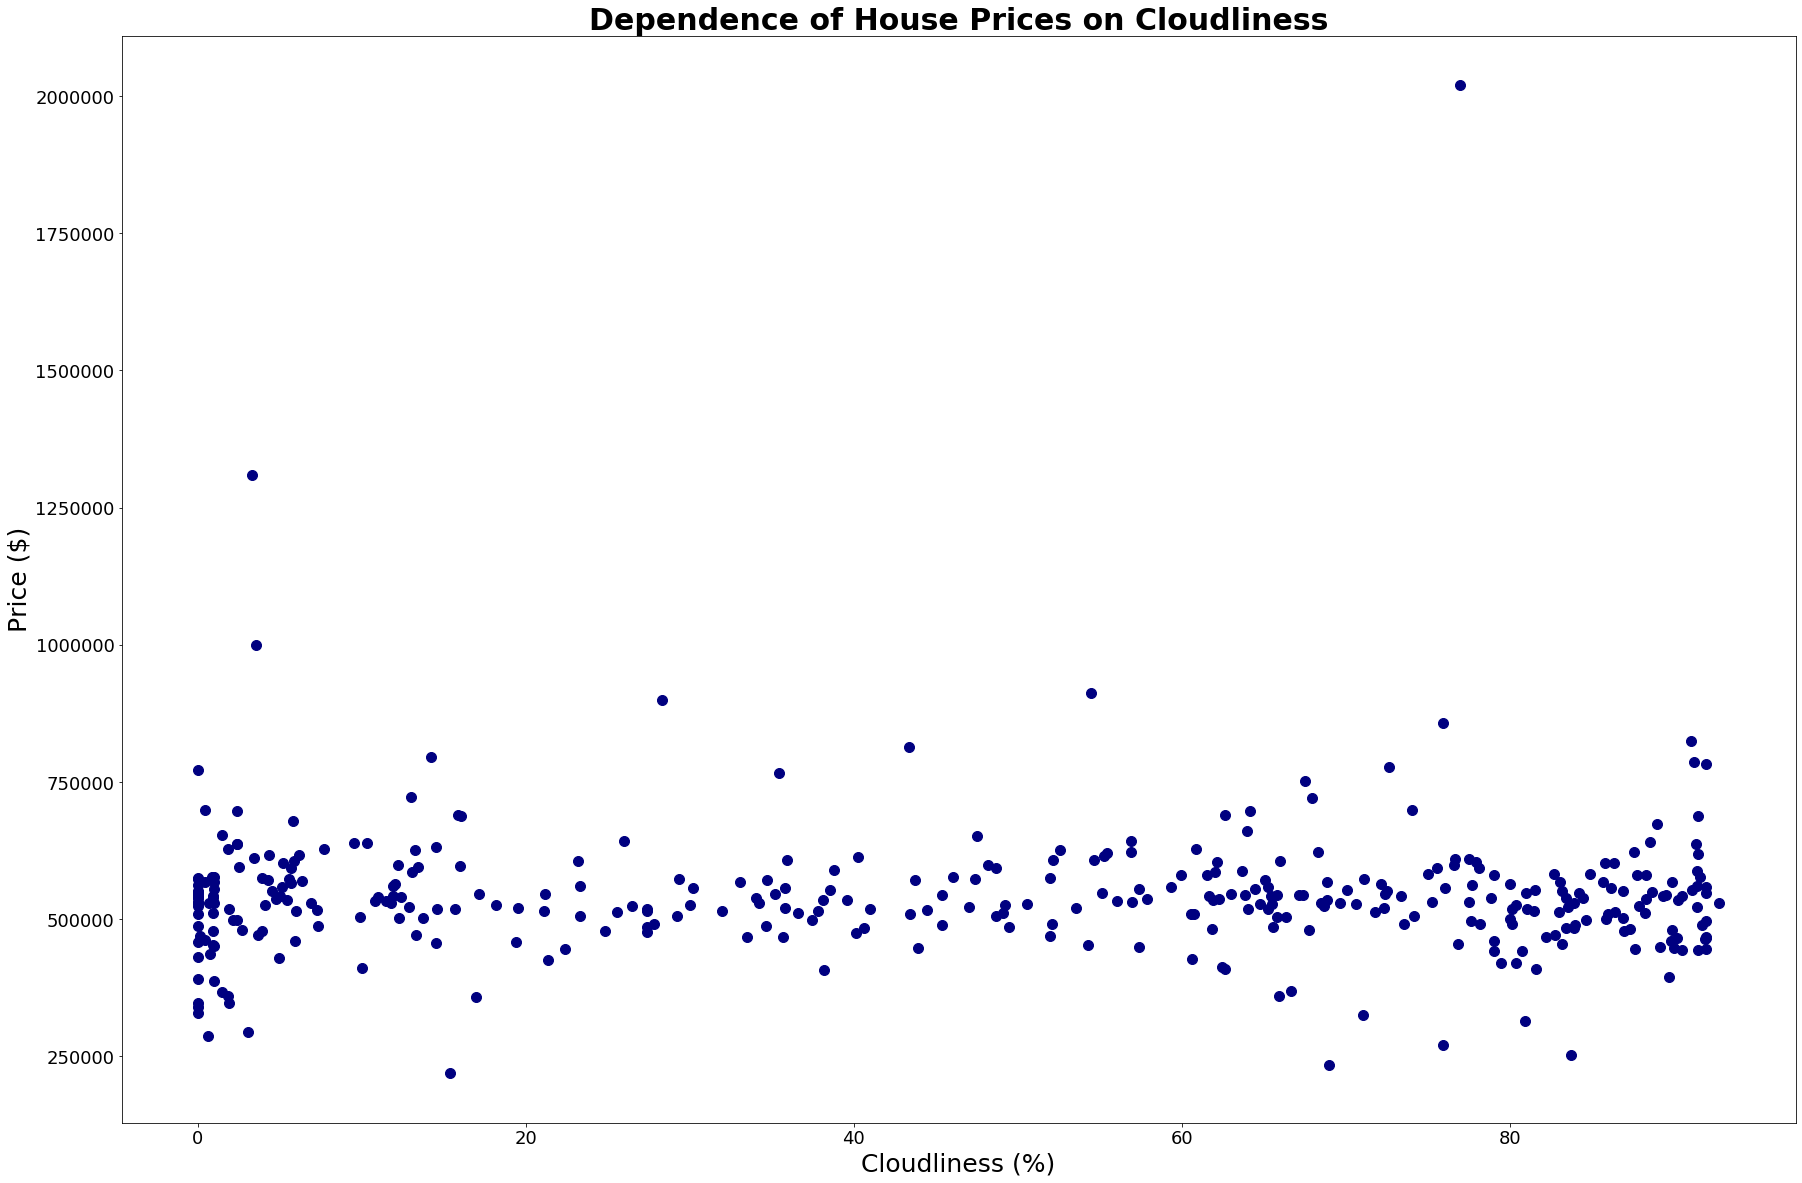

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [76]:
mergedtable.plot(x='Cloudliness', y='price', kind='scatter', color='navy', s=100)
x_lim = len(mergedtable.index)
# Chart title
plt.title("Dependence of House Prices on Cloudliness", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Cloudliness (%)", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Price ($)", fontdict = {'fontsize': 25})
# legend 

plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('cloudlinessvshouseprices.png')


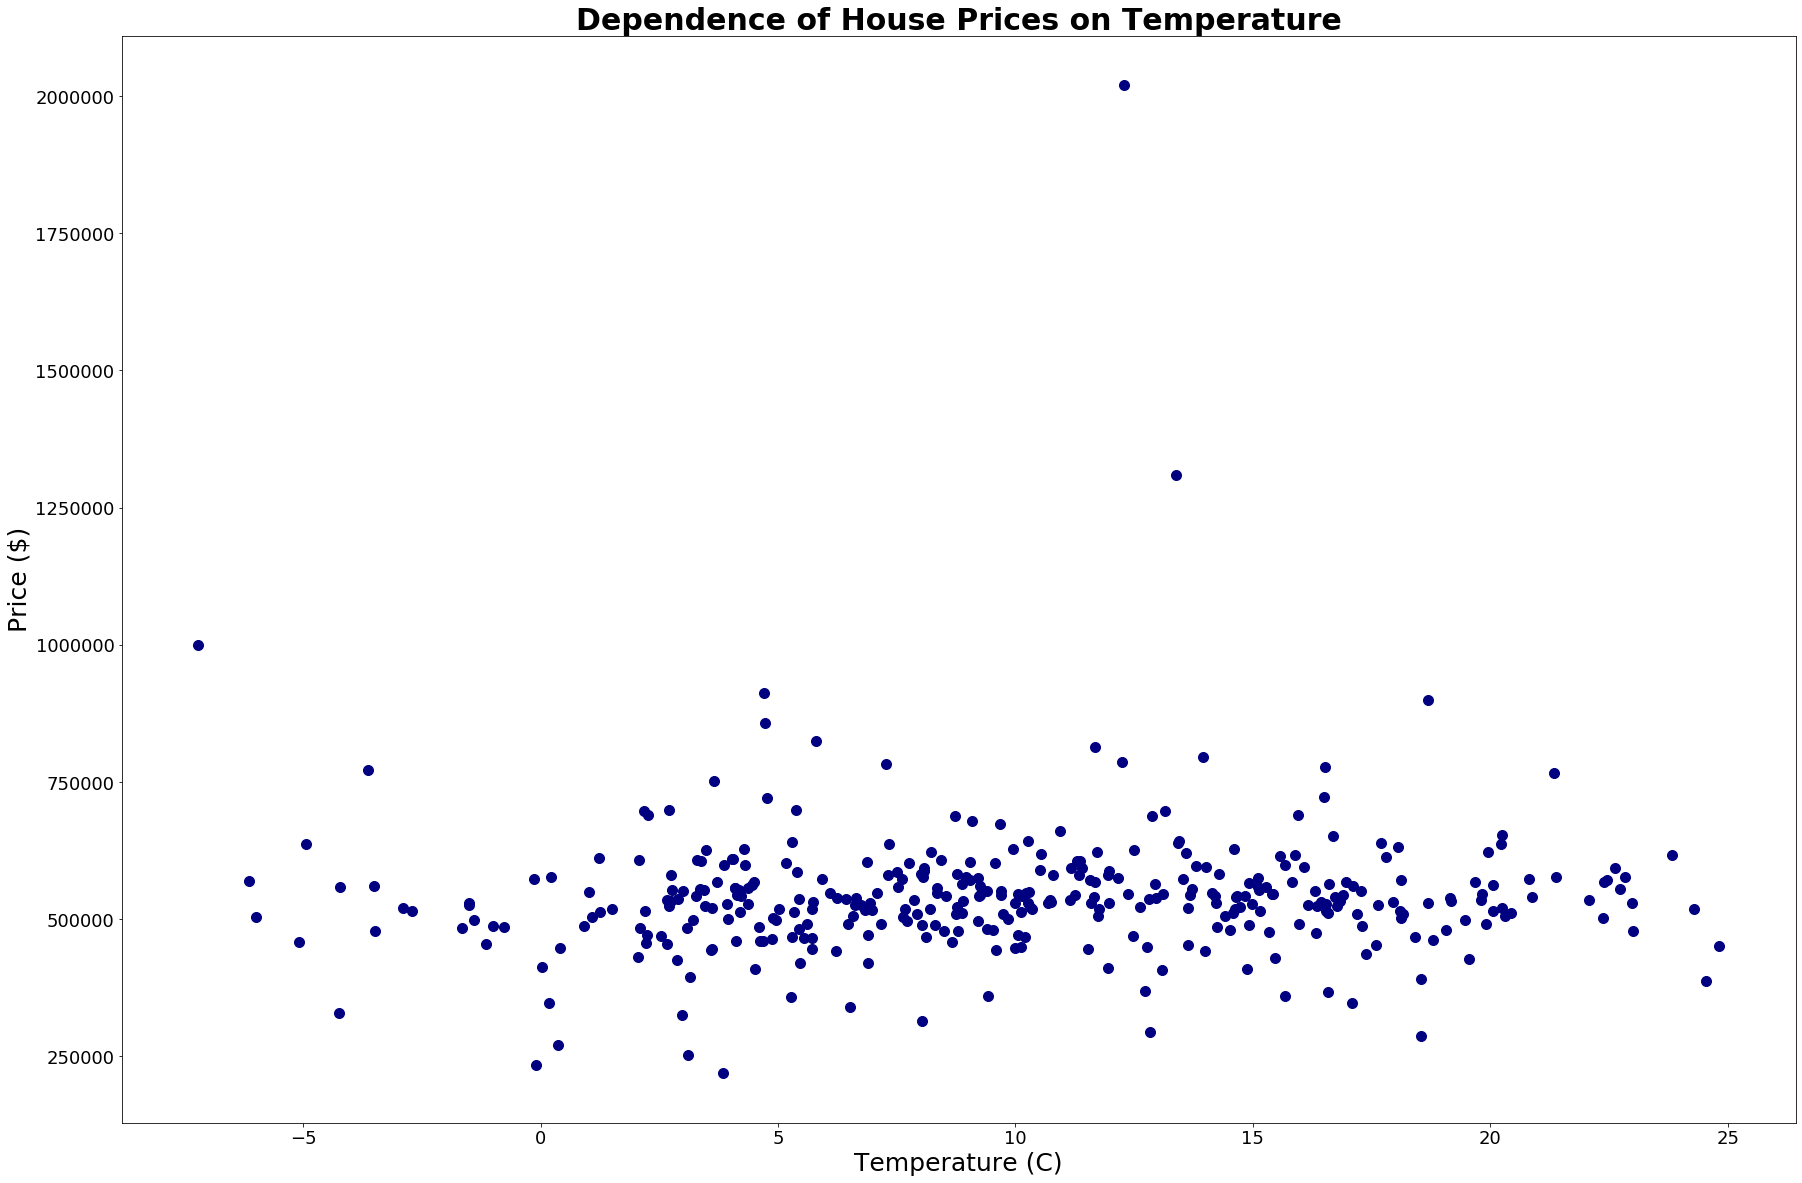

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [77]:
mergedtable.plot(x='Temperature (C)', y='price', kind='scatter', color='navy', s=100)

x_lim = len(mergedtable.index)
# Chart title
plt.title("Dependence of House Prices on Temperature", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Temperature (C)", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Price ($)", fontdict = {'fontsize': 25})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('temperaturevshouseprices.png')


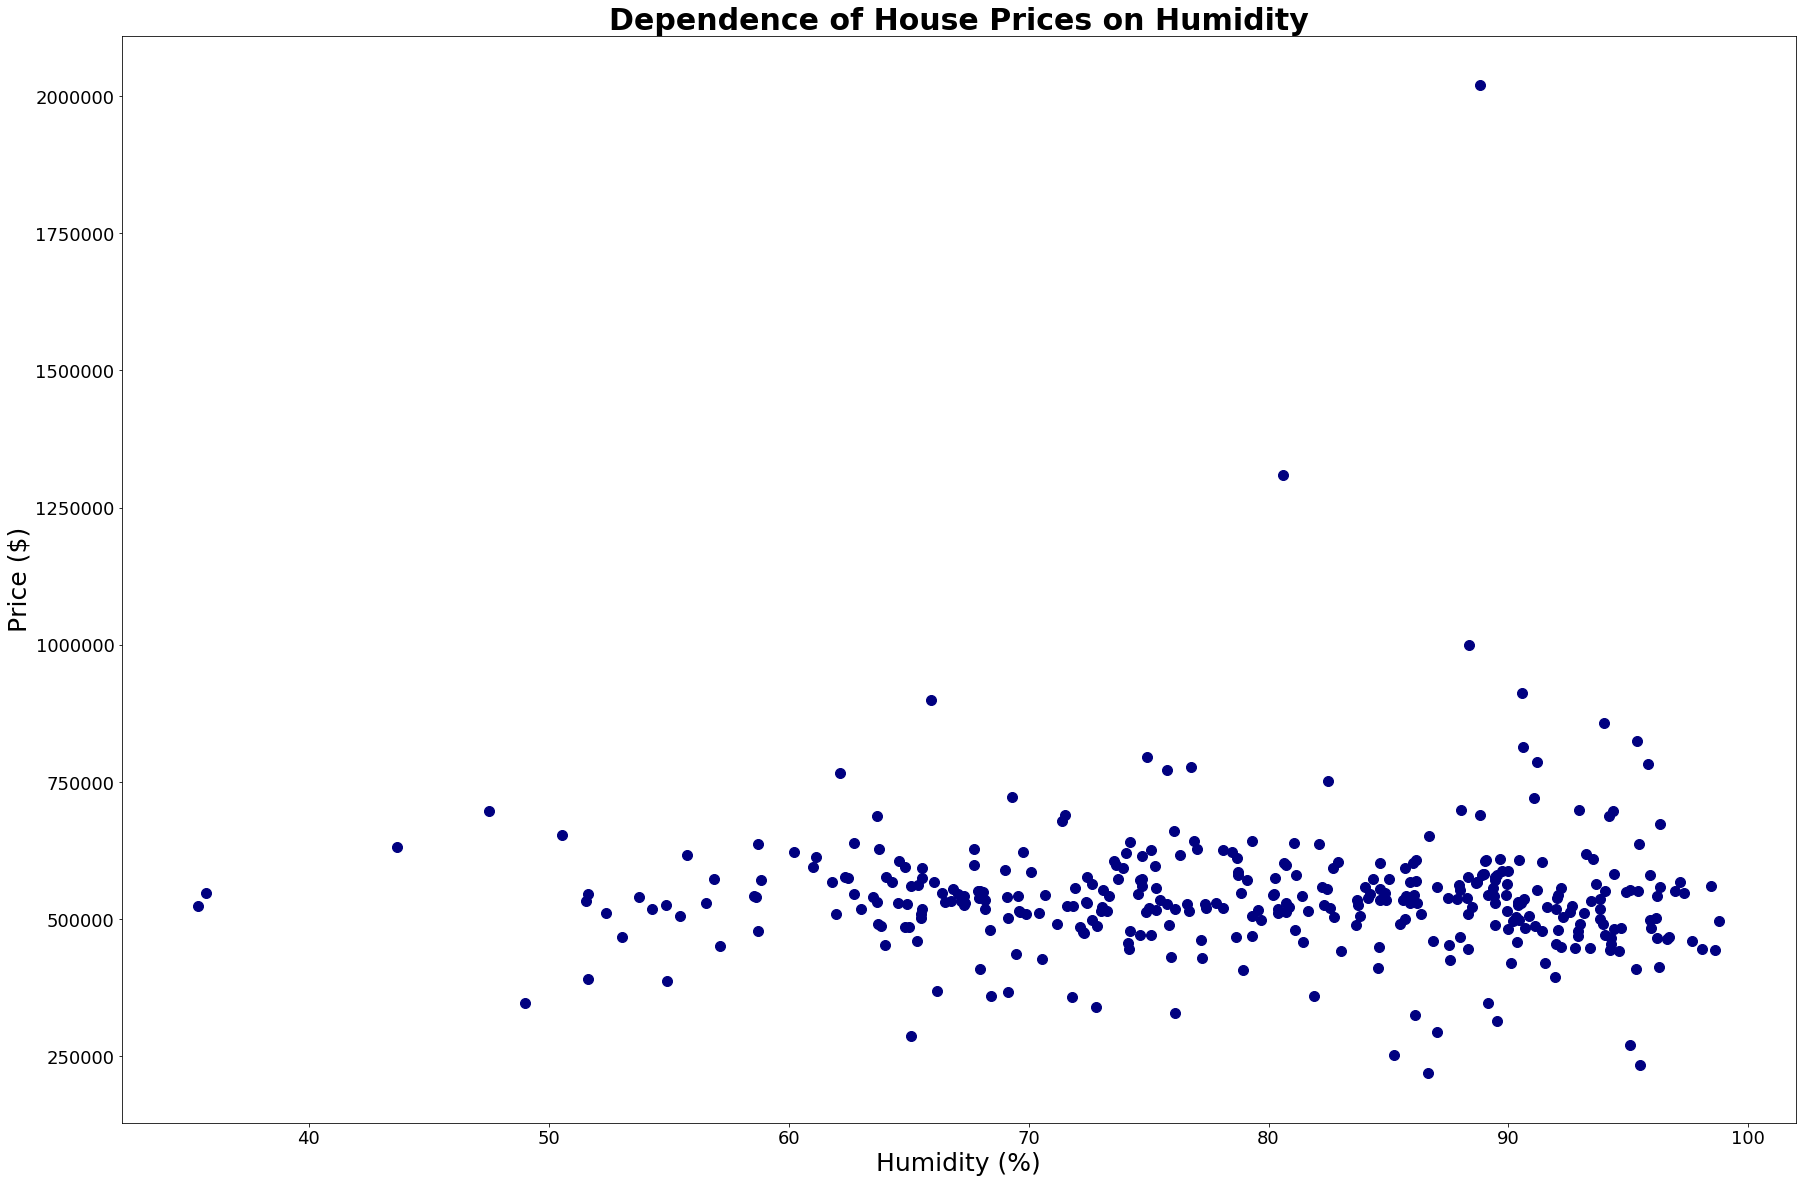

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [78]:
mergedtable.plot(x='Humidity', y='price', kind='scatter', color='navy', s=100)

x_lim = len(mergedtable.index)
# Chart title
plt.title("Dependence of House Prices on Humidity", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Humidity (%)", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Price ($)", fontdict = {'fontsize': 25})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('humidityvshouseprices.png')


In [40]:
housesalescount = df.groupby('date').count()
housesalescount

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
date                                                                        
2014-05-02  67     67        67         67           67        67      67   
2014-05-03   4      4         4          4            4         4       4   
2014-05-04   5      5         5          5            5         5       5   
2014-05-05  84     84        84         84           84        84      84   
2014-05-06  83     83        83         83           83        83      83   
...         ..    ...       ...        ...          ...       ...     ...   
2015-05-13  31     31        31         31           31        31      31   
2015-05-14  11     11        11         11           11        11      11   
2015-05-15   1      1         1          1            1         1       1   
2015-05-24   1      1         1          1            1         1       1   
2015-05-27   1      1         1          1            1         1       1   

            waterfront  view  condition  ...  sqft_basement  yr_built  \
date                                     ...                            
2014-05-02          67    67         67  ...             67        67   
2014-05-03           4     4          4  ...              4         4   
2014-05-04           5     5          5  ...              5         5   
2014-05-05          84    84         84  ...             84        84   
2014-05-06          83    83         83  ...             83        83   
...                ...   ...        ...  ...            ...       ...   
2015-05-13          31    31         31  ...             31        31   
2015-05-14          11    11         11  ...             11        11   
2015-05-15           1     1          1  ...              1         1   
2015-05-24           1     1          1  ...              1         1   
2015-05-27           1     1          1  ...              1         1   

            yr_renovated  zipcode  lat  long  sqft_living15  sqft_lot15  \
date                                                                      
2014-05-02            67       67   67    67             67          67   
2014-05-03             4        4    4     4              4           4   
2014-05-04             5        5    5     5              5           5   
2014-05-05            84       84   84    84             84          84   
2014-05-06            83       83   83    83             83          83   
...                  ...      ...  ...   ...            ...         ...   
2015-05-13            31       31   31    31             31          31   
2015-05-14            11       11   11    11             11          11   
2015-05-15             1        1    1     1              1           1   
2015-05-24             1        1    1     1              1           1   
2015-05-27             1        1    1     1              1           1   

            date(Y/M)  date(Y)  
date                            
2014-05-02         67       67  
2014-05-03          4        4  
2014-05-04          5        5  
2014-05-05         84       84  
2014-05-06         83       83  
...               ...      ...  
2015-05-13         31       31  
2015-05-14         11       11  
2015-05-15          1        1  
2015-05-24          1        1  
2015-05-27          1        1  

[372 rows x 22 columns]

In [41]:
merged2= pd. merge(housesalescount, weatherbydateymd, on="date", how="inner" )
merged2

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
date                                                                        
2014-05-02  67     67        67         67           67        67      67   
2014-05-03   4      4         4          4            4         4       4   
2014-05-04   5      5         5          5            5         5       5   
2014-05-05  84     84        84         84           84        84      84   
2014-05-06  83     83        83         83           83        83      83   
...         ..    ...       ...        ...          ...       ...     ...   
2015-05-13  31     31        31         31           31        31      31   
2015-05-14  11     11        11         11           11        11      11   
2015-05-15   1      1         1          1            1         1       1   
2015-05-24   1      1         1          1            1         1       1   
2015-05-27   1      1         1          1            1         1       1   

            waterfront  view  condition  ...  lat  long  sqft_living15  \
date                                     ...                             
2014-05-02          67    67         67  ...   67    67             67   
2014-05-03           4     4          4  ...    4     4              4   
2014-05-04           5     5          5  ...    5     5              5   
2014-05-05          84    84         84  ...   84    84             84   
2014-05-06          83    83         83  ...   83    83             83   
...                ...   ...        ...  ...  ...   ...            ...   
2015-05-13          31    31         31  ...   31    31             31   
2015-05-14          11    11         11  ...   11    11             11   
2015-05-15           1     1          1  ...    1     1              1   
2015-05-24           1     1          1  ...    1     1              1   
2015-05-27           1     1          1  ...    1     1              1   

            sqft_lot15  date(Y/M)  date(Y)  Temperature (C)   Humidity  \
date                                                                     
2014-05-02          67         67       67        16.163522  54.875000   
2014-05-03           4          4        4        10.194961  78.625000   
2014-05-04           5          5        5         8.960943  89.458333   
2014-05-05          84         84       84        10.799583  89.541667   
2014-05-06          83         83       83        11.157323  83.708333   
...                ...        ...      ...              ...        ...   
2015-05-13          31         31       31         8.864440  93.166667   
2015-05-14          11         11       11         9.033814  91.416667   
2015-05-15           1          1        1        10.121395  84.625000   
2015-05-24           1          1        1        11.517940  88.333333   
2015-05-27           1          1        1        13.384792  80.583333   

            Cloudliness  Wind Speed  
date                                 
2014-05-02    18.208333    0.708333  
2014-05-03    82.208333    1.000000  
2014-05-04    91.625000    0.958333  
2014-05-05    88.333333    1.666667  
2014-05-06    38.125000    1.166667  
...                 ...         ...  
2015-05-13    88.250000    0.833333  
2015-05-14    77.958333    0.375000  
2015-05-15    57.375000    0.375000  
2015-05-24    87.666667    0.708333  
2015-05-27     3.291667    0.416667  

[372 rows x 26 columns]

In [42]:
salescountvsweatherdf = merged2[["id", "Temperature (C)", "Humidity", "Cloudliness", "Wind Speed"]]
salescountvsweatherdf=salescountvsweatherdf.rename(columns={"id" : "Average Number of Houses Sold"})
salescountvsweatherdf

Average Number of Houses Sold  Temperature (C)   Humidity  \
date                                                                    
2014-05-02                             67        16.163522  54.875000   
2014-05-03                              4        10.194961  78.625000   
2014-05-04                              5         8.960943  89.458333   
2014-05-05                             84        10.799583  89.541667   
2014-05-06                             83        11.157323  83.708333   
...                                   ...              ...        ...   
2015-05-13                             31         8.864440  93.166667   
2015-05-14                             11         9.033814  91.416667   
2015-05-15                              1        10.121395  84.625000   
2015-05-24                              1        11.517940  88.333333   
2015-05-27                              1        13.384792  80.583333   

            Cloudliness  Wind Speed  
date                                 
2014-05-02    18.208333    0.708333  
2014-05-03    82.208333    1.000000  
2014-05-04    91.625000    0.958333  
2014-05-05    88.333333    1.666667  
2014-05-06    38.125000    1.166667  
...                 ...         ...  
2015-05-13    88.250000    0.833333  
2015-05-14    77.958333    0.375000  
2015-05-15    57.375000    0.375000  
2015-05-24    87.666667    0.708333  
2015-05-27     3.291667    0.416667  

[372 rows x 5 columns]

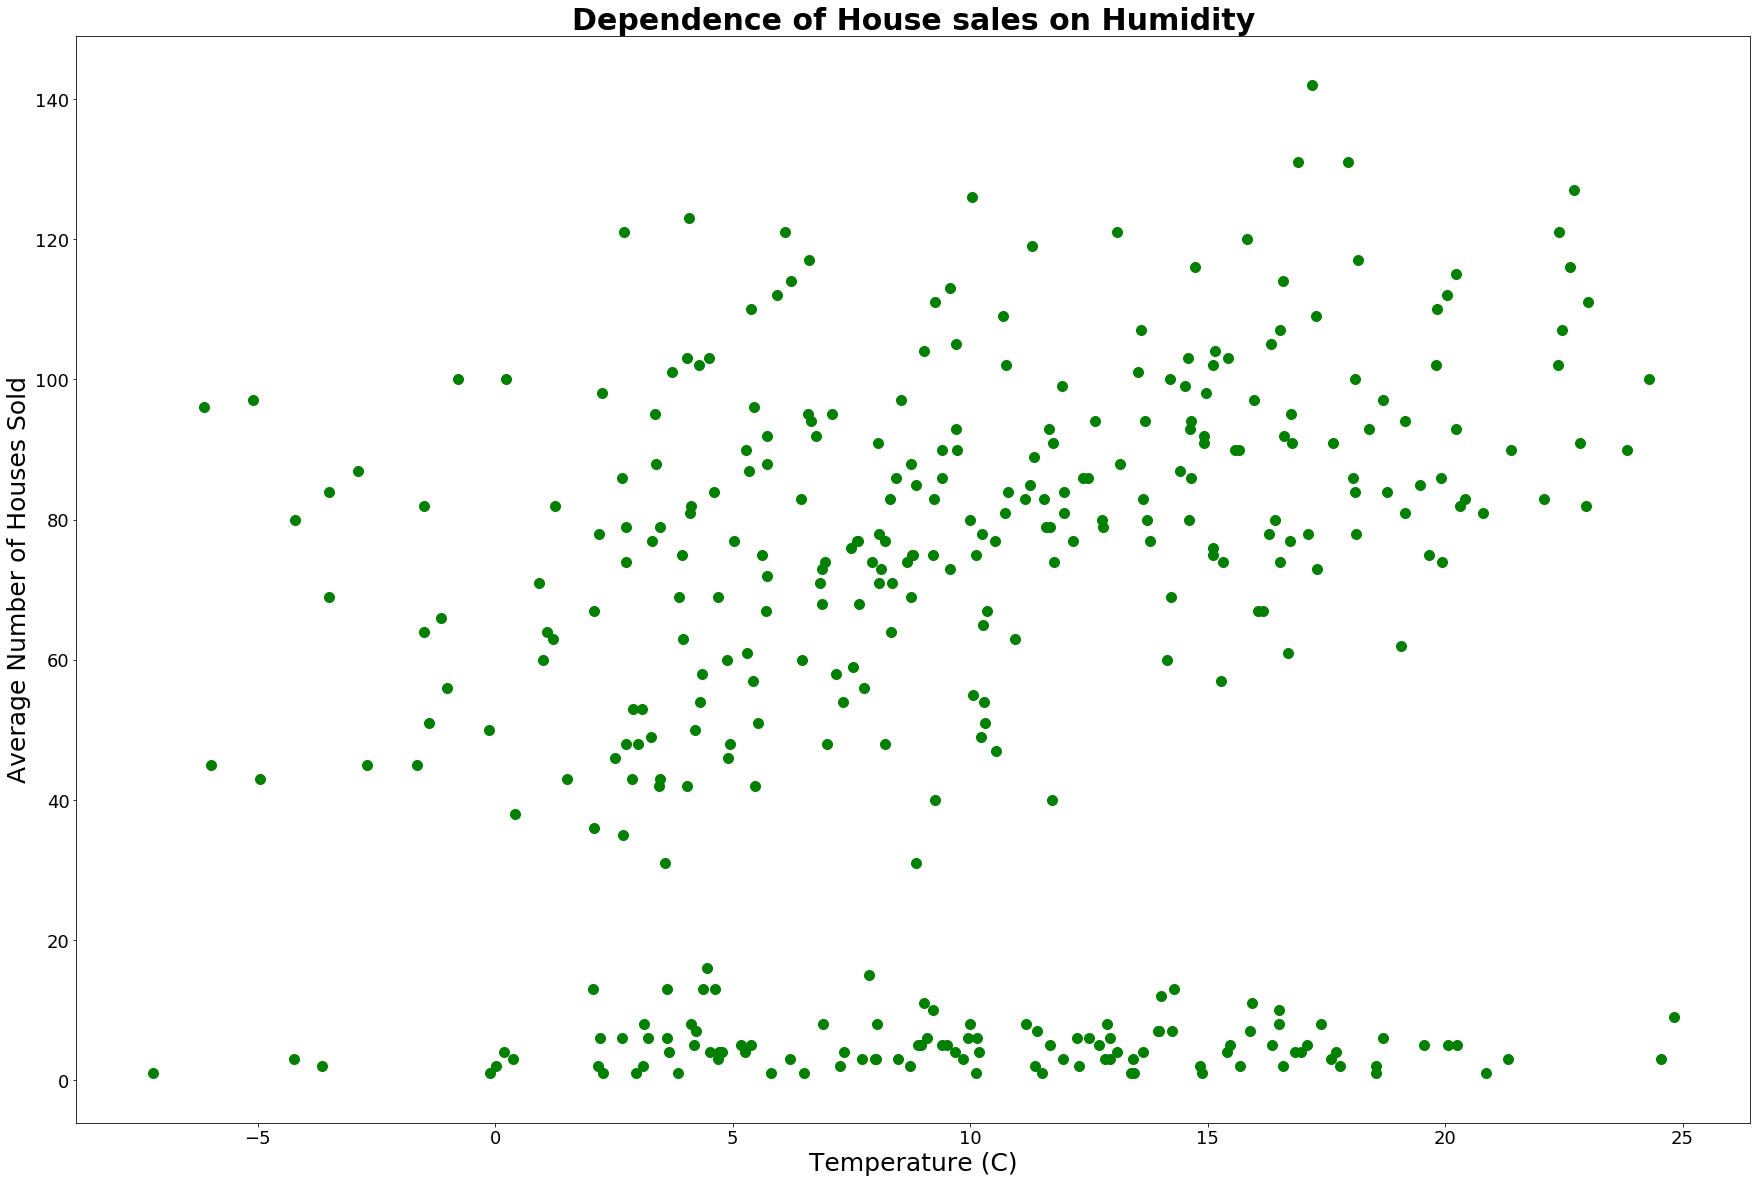

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [79]:
salescountvsweatherdf.plot(kind='scatter', x='Temperature (C)', y='Average Number of Houses Sold', color='green', s=100)
x_lim = len(salescountvsweatherdf.index)
# Chart title
plt.title("Dependence of House sales on Humidity", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Temperature (C)", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Average Number of Houses Sold", fontdict = {'fontsize': 25})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)


plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('temperaturevshousesales.png')


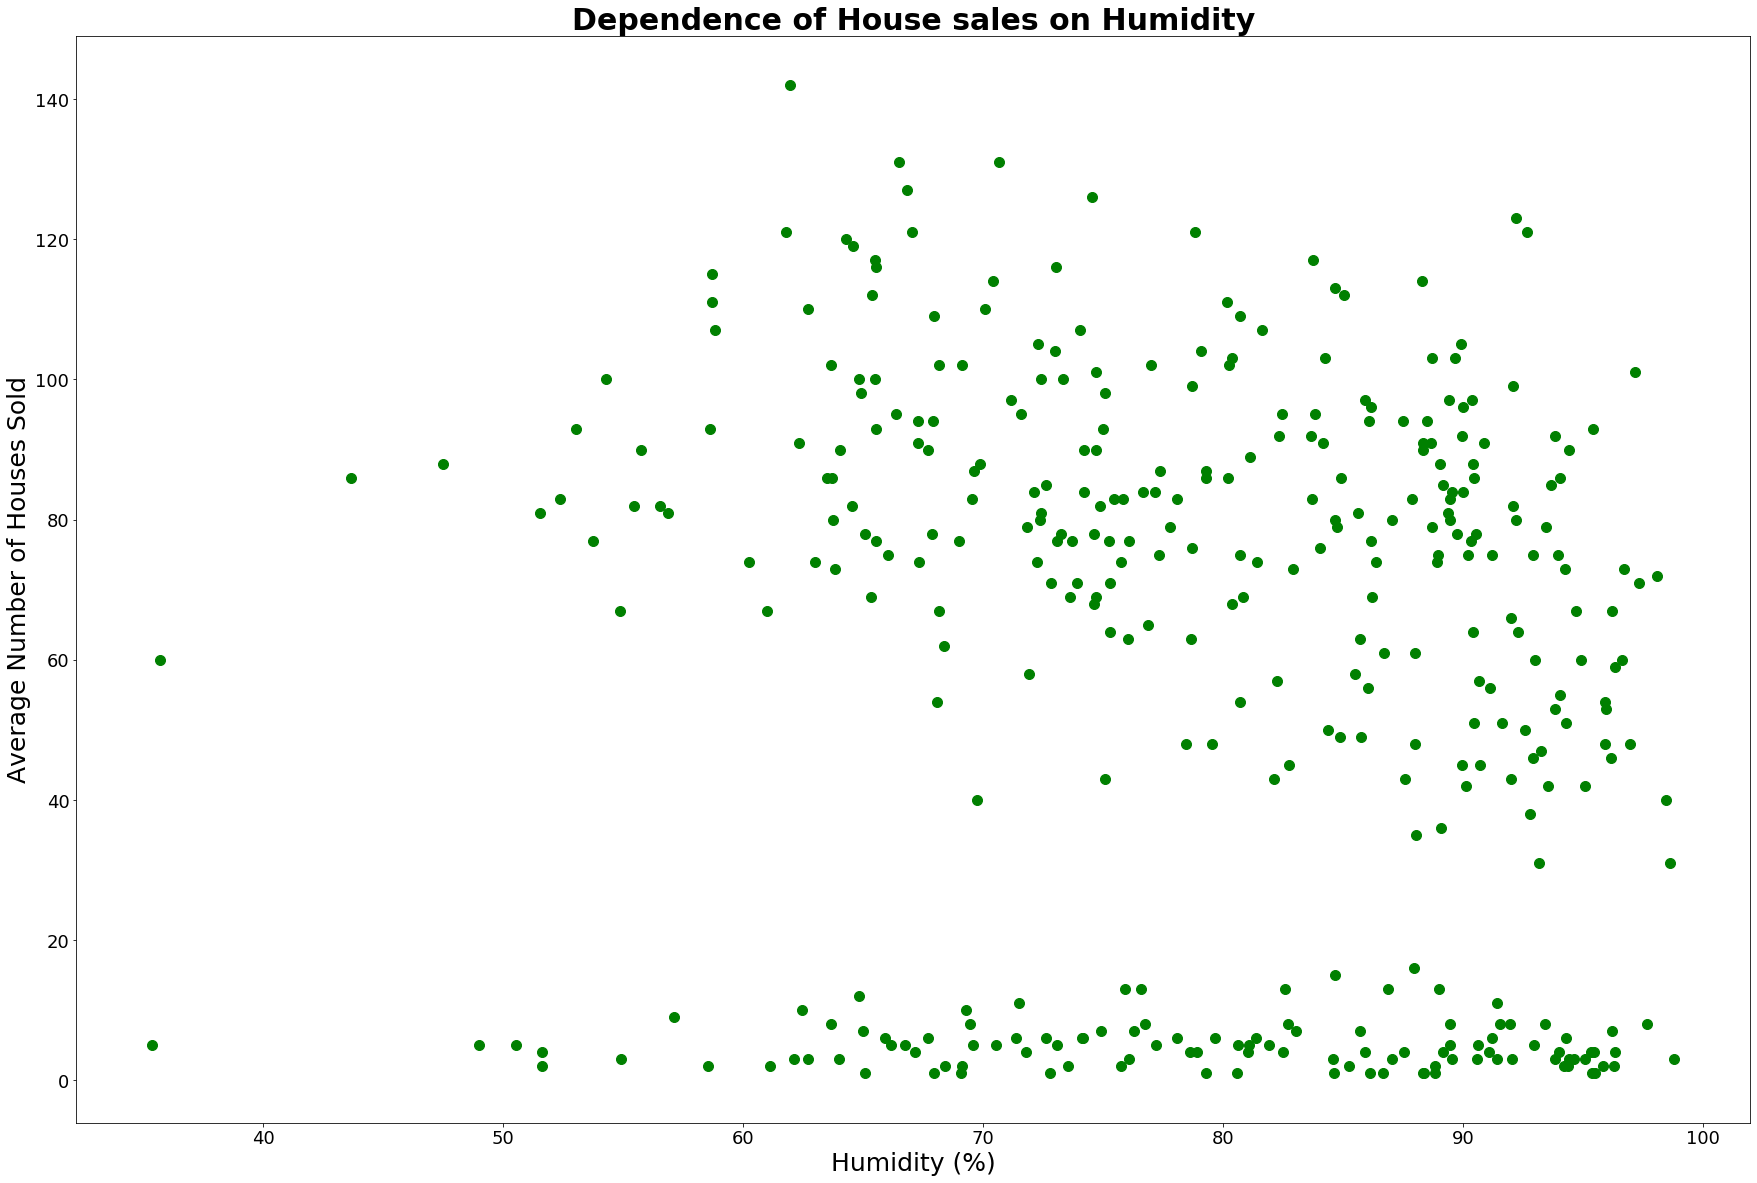

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [80]:
salescountvsweatherdf.plot(kind='scatter', x='Humidity', y='Average Number of Houses Sold', color='green', s=100)
x_lim = len(salescountvsweatherdf.index)
# Chart title
plt.title("Dependence of House sales on Humidity", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Humidity (%)", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Average Number of Houses Sold", fontdict = {'fontsize': 25})
# legend 

plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('temperaturevshousesales.png')


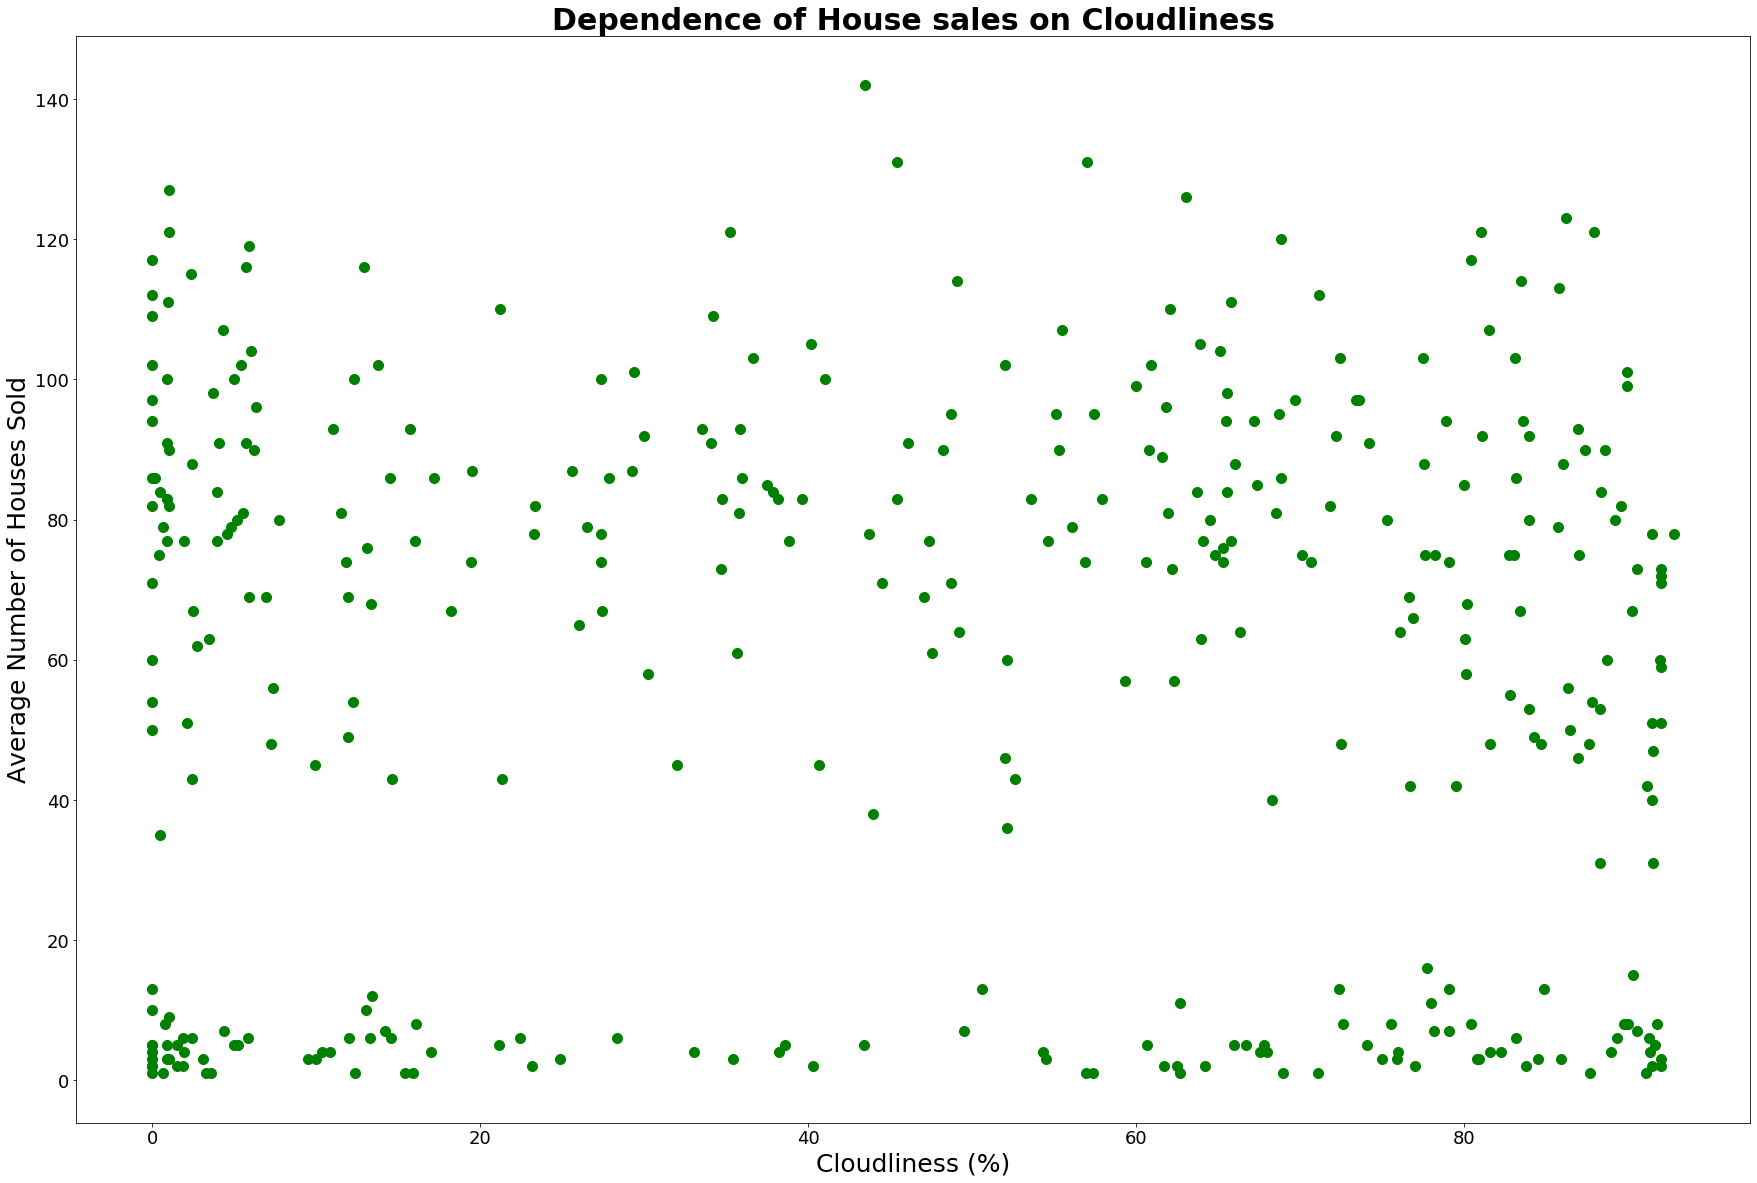

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [81]:
salescountvsweatherdf.plot(kind='scatter', x='Cloudliness', y='Average Number of Houses Sold', color='green', s=100)
x_lim = len(salescountvsweatherdf.index)
# Chart title
plt.title("Dependence of House sales on Cloudliness", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Cloudliness (%)", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Average Number of Houses Sold", fontdict = {'fontsize': 25})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('temperaturevshousesales.png')

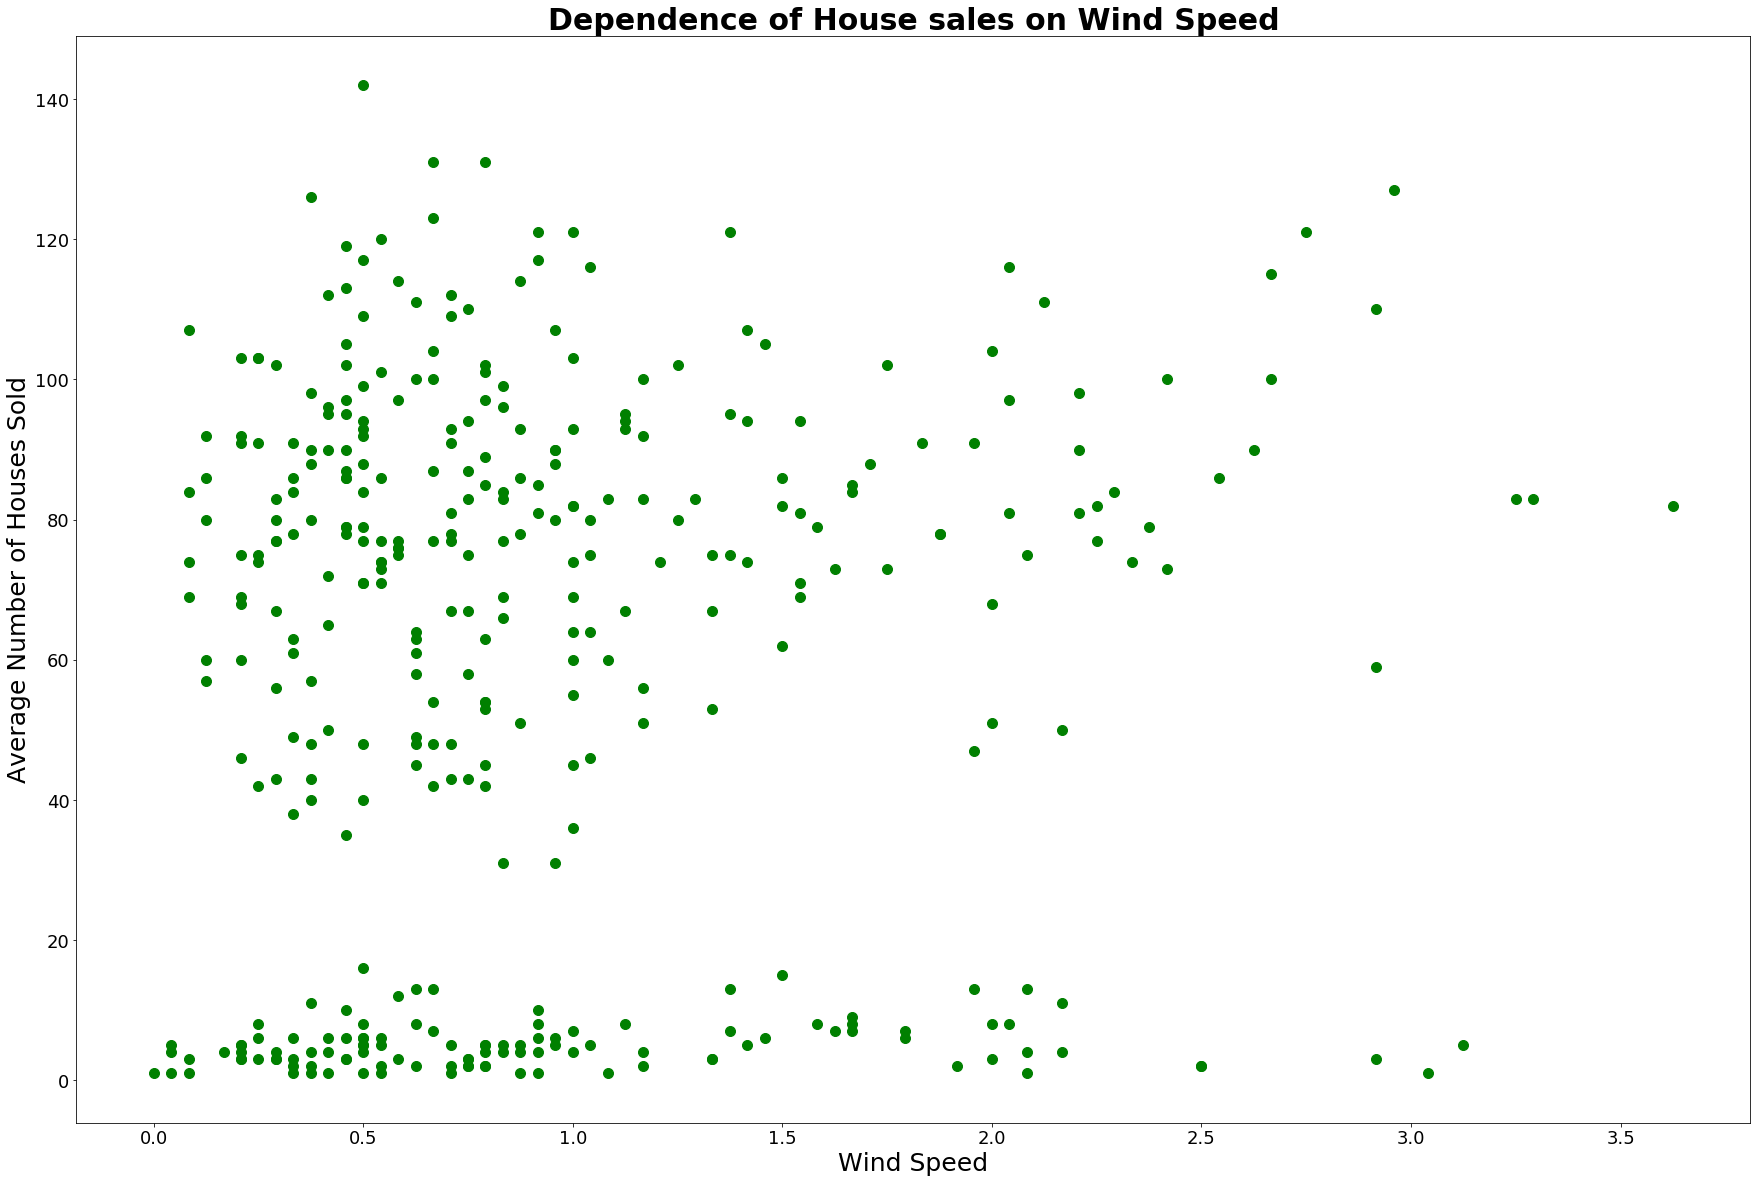

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [82]:
salescountvsweatherdf.plot(kind='scatter', x='Wind Speed', y='Average Number of Houses Sold', color='green', s=100)

x_lim = len(salescountvsweatherdf.index)
# Chart title
plt.title("Dependence of House sales on Wind Speed", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label
plt.xlabel("Wind Speed", fontdict = {'fontsize': 25})
# y label
plt.ylabel("Average Number of Houses Sold", fontdict = {'fontsize': 25})
# legend 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('windspeedvshousesales.png')

In [47]:
salescountbymonth = df.groupby('date(Y/M)').count()
salescountbymonth = salescountbymonth[['id']]
salescountbymonth = salescountbymonth.rename(columns={'id':'Average Number of the Houses Sold'})
salescountbymonth

Average Number of the Houses Sold
date(Y/M)                                   
2014-05                                 1768
2014-06                                 2180
2014-07                                 2211
2014-08                                 1940
2014-09                                 1774
2014-10                                 1878
2014-11                                 1411
2014-12                                 1471
2015-01                                  978
2015-02                                 1250
2015-03                                 1875
2015-04                                 2231
2015-05                                  646

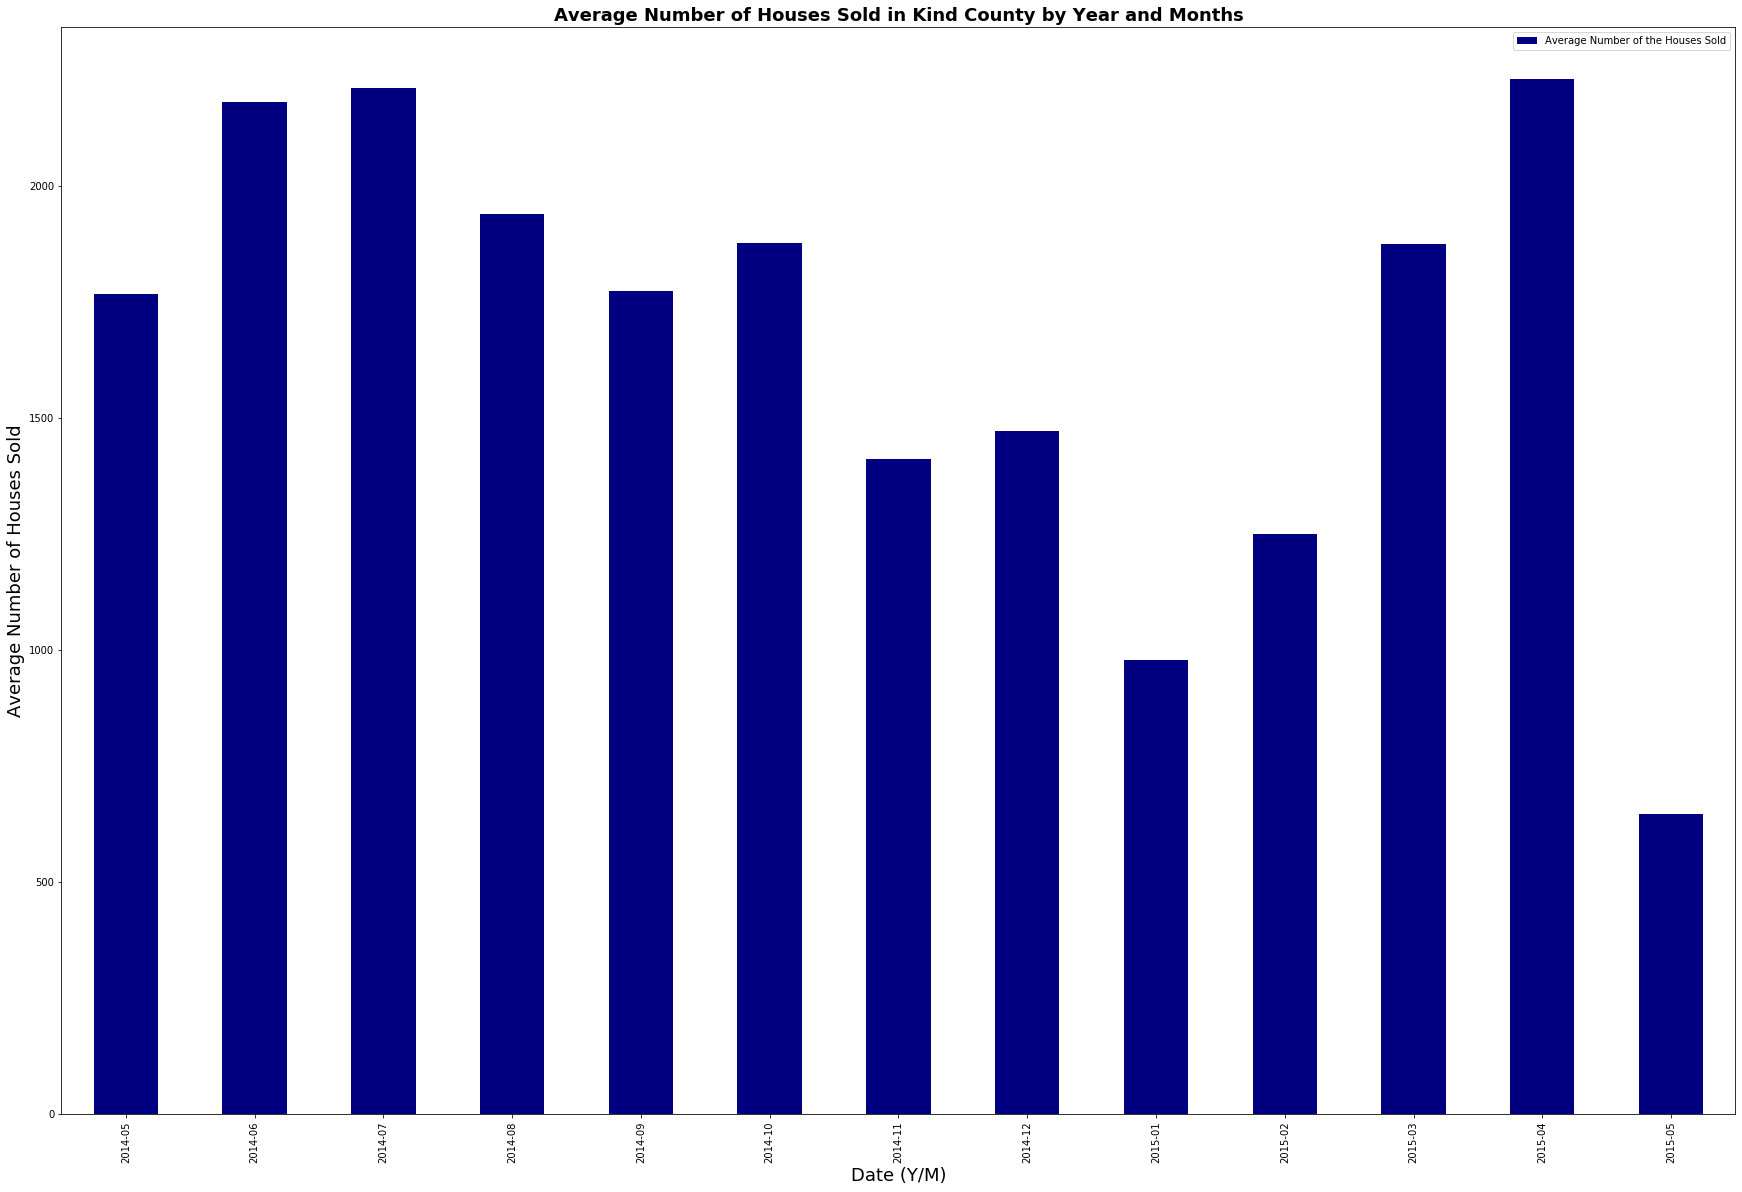

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [48]:
salescountbymonth.plot(kind='bar', y='Average Number of the Houses Sold', color='navy')

x_lim = len(salescountbymonth.index)
# Chart title
plt.title("Average Number of Houses Sold in Kind County by Year and Months", fontdict = {'fontsize': 18, 'fontweight': 'bold'})
# x label
plt.xlabel("Date (Y/M)", fontdict = {'fontsize': 18})
# y label
plt.ylabel("Average Number of Houses Sold", fontdict = {'fontsize': 18})
# legend 


plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('housessoldbyyearandmonth.png')

In [49]:
averagehousepricebyyearandmonth = df.groupby('date(Y/M)').mean()
averagehousepricebyyearandmonth=averagehousepricebyyearandmonth[['price']]
averagehousepricebyyearandmonth

price
date(Y/M)               
2014-05    548166.600113
2014-06    558123.736239
2014-07    544892.161013
2014-08    536527.039691
2014-09    529315.868095
2014-10    539127.477636
2014-11    522058.861800
2014-12    524602.893270
2015-01    525963.251534
2015-02    507919.603200
2015-03    544057.683200
2015-04    561933.463021
2015-05    558193.095975

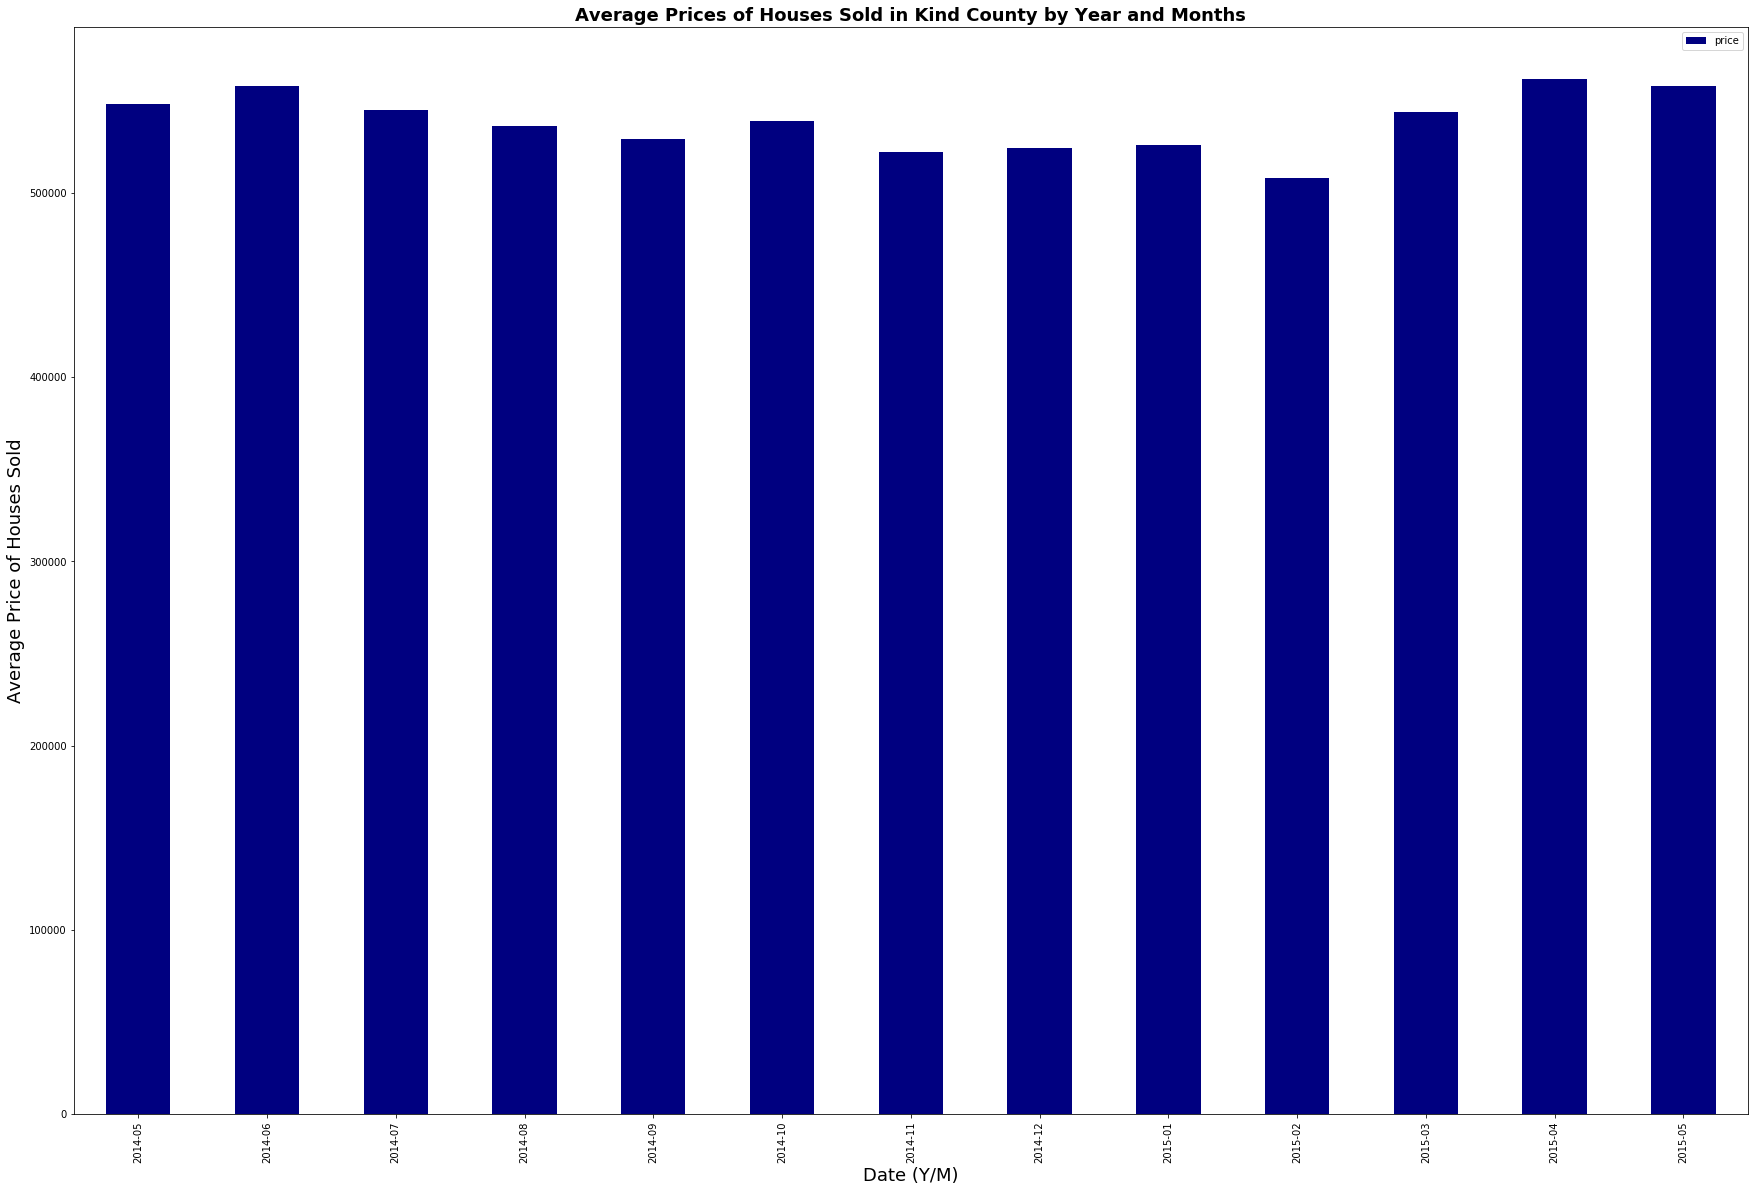

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [50]:
averagehousepricebyyearandmonth.plot(kind='bar', y='price', color='navy')

x_lim = len(averagehousepricebyyearandmonth.index)
# Chart title
plt.title("Average Prices of Houses Sold in Kind County by Year and Months", fontdict = {'fontsize': 18, 'fontweight': 'bold'})
# x label
plt.xlabel("Date (Y/M)", fontdict = {'fontsize': 18})
# y label
plt.ylabel("Average Price of Houses Sold", fontdict = {'fontsize': 18})
# legend 


plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('housepricesbyyearandmonth.png')

In [51]:
weatherdata.groupby('date(Y/M)').mean()

Temperature (C)   Humidity  Cloudliness  Wind Speed
date(Y/M)                                                     
2013-01           2.541290  76.581989    64.669355    1.198925
2013-02           6.016165  75.611607    76.558036    1.697917
2013-03           7.138878  66.061828    60.897849    1.041667
2013-04           9.459154  69.781944    58.947222    1.879167
2013-05          13.585724  52.876344    42.327957    1.248656
2013-06          16.259861  60.609722    49.747222    0.800000
2013-07          18.301708  57.524194     8.356183    0.666667
2013-08          17.912518  63.607527    39.805108    0.681452
2013-09          15.300842  80.112500    50.676389    1.115278
2013-10           8.487598  85.764785    35.830645    0.704301
2013-11           7.751019  77.690278    18.868056    1.052778
2013-12           2.949882  79.697581     7.888441    1.271505
2014-01           5.504302  86.306040    15.046980    1.448322
2014-02          -0.145985  83.986607    60.784226    1.186012
2014-03           4.549942  86.451613    65.055108    0.923387
2014-04           6.840869  78.173611    54.548611    0.770833
2014-05          13.414395  71.299731    46.129032    1.259409
2014-06          14.327004  73.752778    45.356944    1.083333
2014-07          19.891122  66.193767    23.678862    2.107046
2014-08          18.026412  72.879032    26.202957    0.750000
2014-09          14.508711  72.355556    34.181944    0.504167
2014-10          10.578193  86.837366    59.088710    0.647849
2014-11           3.356622  86.575000    55.147222    1.251389
2014-12           1.950354  89.362903    62.224462    1.044355
2015-01           2.992706  91.057718    51.088591    0.708725
2015-02           5.200498  86.285714    58.593750    0.668155
2015-03           6.285907  81.182796    52.931452    0.677419
2015-04           6.213240  78.016667    51.750000    0.695833
2015-05          12.044640  76.911290    40.752688    0.543011
2015-06          16.995892  59.127778    23.130556    0.912500
2015-07          20.634321  58.559140    29.389785    2.010753
2015-08          19.417782  62.408602    29.674731    2.073925
2015-09          14.832857  73.697222    45.833333    1.758333
2015-10          12.505920  85.044355    53.069892    1.466398
2015-11           5.656833  87.933333    58.822222    1.594444
2015-12           5.180198  89.267473    73.112903    2.182796
2016-01           3.830000  56.000000     1.000000    0.000000

In [52]:
weatherdata

date  Temperature (C)  Humidity  Cloudliness Weather Condition  \
0      2013-01-01            2.470        93            1             Clear   
1      2013-01-01            2.460        93            1             Clear   
2      2013-01-01            1.080        93           20            Clouds   
3      2013-01-01            0.800         0            1              Mist   
4      2013-01-01            0.400         0           75              Mist   
...           ...              ...       ...          ...               ...   
26272  2015-12-31            2.350        74            1              Rain   
26273  2015-12-31            4.050        41            1             Clear   
26274  2015-12-31            4.375        44            1             Clear   
26275  2015-12-31            4.700        48            1             Clear   
26276  2016-01-01            3.830        56            1             Clear   

       Wind Speed date(Y/M)  
0               1   2013-01  
1               0   2013-01  
2               0   2013-01  
3               0   2013-01  
4               0   2013-01  
...           ...       ...  
26272           1   2015-12  
26273           2   2015-12  
26274           1   2015-12  
26275           0   2015-12  
26276           0   2016-01  

[26277 rows x 7 columns]

In [53]:
humidityanalysis=weatherdata.loc[weatherdata['Humidity']>=50]
humidityanalysis.count()

date                 23236
Temperature (C)      23236
Humidity             23236
Cloudliness          23236
Weather Condition    23236
Wind Speed           23236
date(Y/M)            23236
dtype: int64

In [54]:
humidityanalysis=weatherdata.loc[weatherdata['Humidity']<=50]
humidityanalysis.count()

date                 3227
Temperature (C)      3227
Humidity             3227
Cloudliness          3227
Weather Condition    3227
Wind Speed           3227
date(Y/M)            3227
dtype: int64

In [55]:
windanalysis=weatherdata.loc[weatherdata['Wind Speed']<=3]
windanalysis.count()

date                 24724
Temperature (C)      24724
Humidity             24724
Cloudliness          24724
Weather Condition    24724
Wind Speed           24724
date(Y/M)            24724
dtype: int64

In [56]:
windanalysis=weatherdata.loc[weatherdata['Wind Speed']>=3]
windanalysis.count()

date                 3253
Temperature (C)      3253
Humidity             3253
Cloudliness          3253
Weather Condition    3253
Wind Speed           3253
date(Y/M)            3253
dtype: int64

In [57]:
tempanalysis=weatherdata.loc[weatherdata['Temperature (C)']>=0]
tempanalysis.count()

date                 24726
Temperature (C)      24726
Humidity             24726
Cloudliness          24726
Weather Condition    24726
Wind Speed           24726
date(Y/M)            24726
dtype: int64

In [58]:
tempanalysis=weatherdata.loc[weatherdata['Temperature (C)']<=0]
tempanalysis.count()

date                 1554
Temperature (C)      1554
Humidity             1554
Cloudliness          1554
Weather Condition    1554
Wind Speed           1554
date(Y/M)            1554
dtype: int64

In [161]:
merged3 = pd.merge(weatherdata, yadf, on='date(Y/M)', how='inner')
merged3

NameError: name 'yadf' is not defined

In [162]:
mergeddf = merged3.groupby('date(Y/M)').mean()
mergeddf

NameError: name 'merged3' is not defined

Current size: [10.0, 8.0]


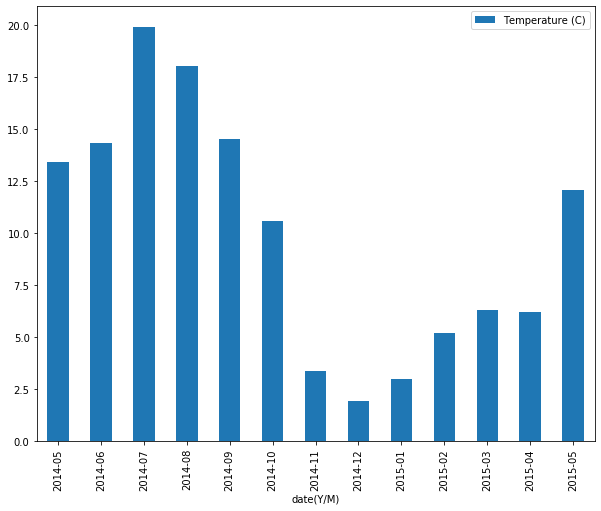

In [57]:
mergeddf.plot(kind='bar', y='Temperature (C)')

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Current size: [10.0, 8.0]


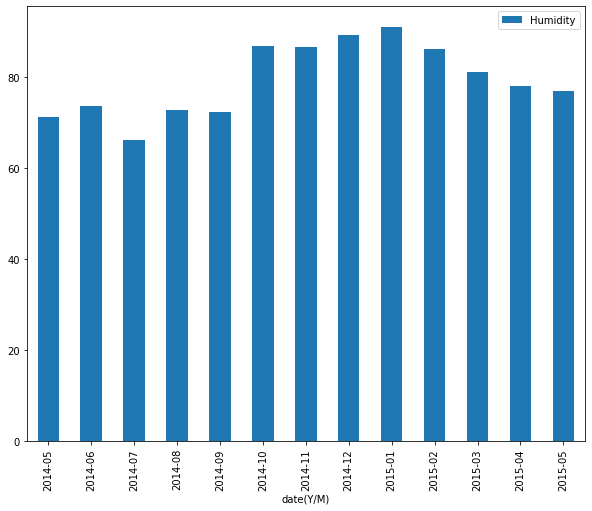

In [58]:
mergeddf.plot(kind='bar', y='Humidity')

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Current size: [10.0, 8.0]


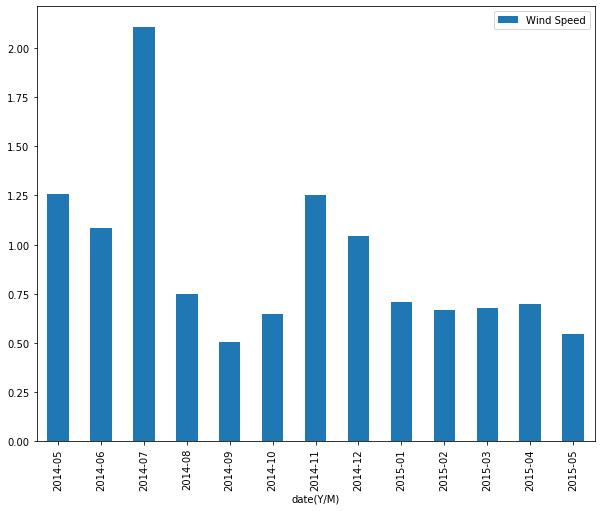

In [59]:
mergeddf.plot(kind='bar', y='Wind Speed')

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [60]:
mergedcountdf = merged3.groupby('date(Y/M)').count()
mergedcountdf

date  Temperature  Humidity  Cloudliness  Weather Condition  \
date(Y/M)                                                                
2014-05     744          744       744          744                744   
2014-06     720          720       720          720                720   
2014-07     738          738       738          738                738   
2014-08     744          744       744          744                744   
2014-09     720          720       720          720                720   
2014-10     744          744       744          744                744   
2014-11     720          720       720          720                720   
2014-12     744          744       744          744                744   
2015-01     745          745       745          745                745   
2015-02     672          672       672          672                672   
2015-03     744          744       744          744                744   
2015-04     720          720       720          720                720   
2015-05     744          744       744          744                744   

           Wind Speed  Temperature (C)   id  price  bedrooms  ...  grade  \
date(Y/M)                                                     ...          
2014-05           744              744  744    744       744  ...    744   
2014-06           720              720  720    720       720  ...    720   
2014-07           738              738  738    738       738  ...    738   
2014-08           744              744  744    744       744  ...    744   
2014-09           720              720  720    720       720  ...    720   
2014-10           744              744  744    744       744  ...    744   
2014-11           720              720  720    720       720  ...    720   
2014-12           744              744  744    744       744  ...    744   
2015-01           745              745  745    745       745  ...    745   
2015-02           672              672  672    672       672  ...    672   
2015-03           744              744  744    744       744  ...    744   
2015-04           720              720  720    720       720  ...    720   
2015-05           744              744  744    744       744  ...    744   

           sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  lat  \
date(Y/M)                                                                    
2014-05           744            744       744           744      744  744   
2014-06           720            720       720           720      720  720   
2014-07           738            738       738           738      738  738   
2014-08           744            744       744           744      744  744   
2014-09           720            720       720           720      720  720   
2014-10           744            744       744           744      744  744   
2014-11           720            720       720           720      720  720   
2014-12           744            744       744           744      744  744   
2015-01           745            745       745           745      745  745   
2015-02           672            672       672           672      672  672   
2015-03           744            744       744           744      744  744   
2015-04           720            720       720           720      720  720   
2015-05           744            744       744           744      744  744   

           long  sqft_living15  sqft_lot15  
date(Y/M)                                   
2014-05     744            744         744  
2014-06     720            720         720  
2014-07     738            738         738  
2014-08     744            744         744  
2014-09     720            720         720  
2014-10     744            744         744  
2014-11     720            720         720  
2014-12     744            744         744  
2015-01     745            745         745  
2015-02     672            672         672  
2015-03     744            744         744  
201

Current size: [10.0, 8.0]


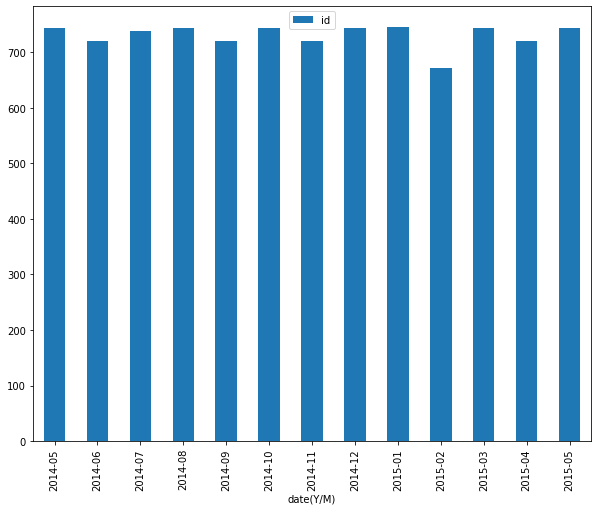

In [61]:
mergedcountdf.plot(kind='bar', y='id')

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [62]:
lessthantwenty=merged2.loc[merged2['id']<=20]
lessthantwenty

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
date                                                                        
2014-05-03   4      4         4          4            4         4       4   
2014-05-04   5      5         5          5            5         5       5   
2014-05-10   5      5         5          5            5         5       5   
2014-05-11   2      2         2          2            2         2       2   
2014-05-17   1      1         1          1            1         1       1   
...         ..    ...       ...        ...          ...       ...     ...   
2015-05-10   2      2         2          2            2         2       2   
2015-05-14  11     11        11         11           11        11      11   
2015-05-15   1      1         1          1            1         1       1   
2015-05-24   1      1         1          1            1         1       1   
2015-05-27   1      1         1          1            1         1       1   

            waterfront  view  condition  ...  long  sqft_living15  sqft_lot15  \
date                                     ...                                    
2014-05-03           4     4          4  ...     4              4           4   
2014-05-04           5     5          5  ...     5              5           5   
2014-05-10           5     5          5  ...     5              5           5   
2014-05-11           2     2          2  ...     2              2           2   
2014-05-17           1     1          1  ...     1              1           1   
...                ...   ...        ...  ...   ...            ...         ...   
2015-05-10           2     2          2  ...     2              2           2   
2015-05-14          11    11         11  ...    11             11          11   
2015-05-15           1     1          1  ...     1              1           1   
2015-05-24           1     1          1  ...     1              1           1   
2015-05-27           1     1          1  ...     1              1           1   

            date(Y/M)  date(Y)  Temperature   Humidity  Cloudliness  \
date                                                                  
2014-05-03          4        4   283.344961  78.625000    82.208333   
2014-05-04          5        5   282.110943  89.458333    91.625000   
2014-05-10          5        5   282.666208  81.083333    67.750000   
2014-05-11          2        2   284.505417  73.541667    23.166667   
2014-05-17          1        1   288.030000  67.958333    62.666667   
...               ...      ...          ...        ...          ...   
2015-05-10          2        2   287.988667  58.541667    61.666667   
2015-05-14         11       11   282.183814  91.416667    77.958333   
2015-05-15          1        1   283.271395  84.625000    57.375000   
2015-05-24          1        1   284.667940  88.333333    87.666667   
2015-05-27          1        1   286.534792  80.583333     3.291667   

            Wind Speed  Temperature (C)  
date                                     
2014-05-03    1.000000        10.194961  
2014-05-04    0.958333         8.960943  
2014-05-10    1.041667         9.516208  
2014-05-11    1.166667        11.355417  
2014-05-17    2.083333        14.880000  
...                ...              ...  
2015-05-10    0.375000        14.838667  
2015-05-14    0.375000         9.033814  
2015-05-15    0.375000        10.121395  
2015-05-24    0.708333        11.517940  
2015-05-27    0.416667        13.384792  

[112 rows x 27 columns]

In [63]:
morethantwenty=merged2.loc[merged2['id']>=20]
morethantwenty

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
date                                                                        
2014-05-02  67     67        67         67           67        67      67   
2014-05-05  84     84        84         84           84        84      84   
2014-05-06  83     83        83         83           83        83      83   
2014-05-07  93     93        93         93           93        93      93   
2014-05-08  81     81        81         81           81        81      81   
...         ..    ...       ...        ...          ...       ...     ...   
2015-05-07  76     76        76         76           76        76      76   
2015-05-08  54     54        54         54           54        54      54   
2015-05-11  40     40        40         40           40        40      40   
2015-05-12  49     49        49         49           49        49      49   
2015-05-13  31     31        31         31           31        31      31   

            waterfront  view  condition  ...  long  sqft_living15  sqft_lot15  \
date                                     ...                                    
2014-05-02          67    67         67  ...    67             67          67   
2014-05-05          84    84         84  ...    84             84          84   
2014-05-06          83    83         83  ...    83             83          83   
2014-05-07          93    93         93  ...    93             93          93   
2014-05-08          81    81         81  ...    81             81          81   
...                ...   ...        ...  ...   ...            ...         ...   
2015-05-07          76    76         76  ...    76             76          76   
2015-05-08          54    54         54  ...    54             54          54   
2015-05-11          40    40         40  ...    40             40          40   
2015-05-12          49    49         49  ...    49             49          49   
2015-05-13          31    31         31  ...    31             31          31   

            date(Y/M)  date(Y)  Temperature   Humidity  Cloudliness  \
date                                                                  
2014-05-02         67       67   289.313522  54.875000    18.208333   
2014-05-05         84       84   283.949583  89.541667    88.333333   
2014-05-06         83       83   284.307323  83.708333    38.125000   
2014-05-07         93       93   284.811917  58.625000    11.000000   
2014-05-08         81       81   285.125833  72.416667    68.500000   
...               ...      ...          ...        ...          ...   
2015-05-07         76       76   280.646233  78.708333    13.083333   
2015-05-08         54       54   283.436815  68.083333     0.000000   
2015-05-11         40       40   284.871434  69.750000    68.291667   
2015-05-12         49       49   283.380355  84.875000    84.250000   
2015-05-13         31       31   282.014440  93.166667    88.250000   

            Wind Speed  Temperature (C)  
date                                     
2014-05-02    0.708333        16.163522  
2014-05-05    1.666667        10.799583  
2014-05-06    1.166667        11.157323  
2014-05-07    1.000000        11.661917  
2014-05-08    0.916667        11.975833  
...                ...              ...  
2015-05-07    0.583333         7.496233  
2015-05-08    0.791667        10.286815  
2015-05-11    0.500000        11.721434  
2015-05-12    0.625000        10.230355  
2015-05-13    0.833333         8.864440  

[260 rows x 27 columns]

In [64]:
lessdf=pd.merge(lessthantwenty, weatherbydateymd, on='date', how='inner')
lessdf

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
date                                                                        
2014-05-03   4      4         4          4            4         4       4   
2014-05-04   5      5         5          5            5         5       5   
2014-05-10   5      5         5          5            5         5       5   
2014-05-11   2      2         2          2            2         2       2   
2014-05-17   1      1         1          1            1         1       1   
...         ..    ...       ...        ...          ...       ...     ...   
2015-05-10   2      2         2          2            2         2       2   
2015-05-14  11     11        11         11           11        11      11   
2015-05-15   1      1         1          1            1         1       1   
2015-05-24   1      1         1          1            1         1       1   
2015-05-27   1      1         1          1            1         1       1   

            waterfront  view  condition  ...  Temperature_x  Humidity_x  \
date                                     ...                              
2014-05-03           4     4          4  ...     283.344961   78.625000   
2014-05-04           5     5          5  ...     282.110943   89.458333   
2014-05-10           5     5          5  ...     282.666208   81.083333   
2014-05-11           2     2          2  ...     284.505417   73.541667   
2014-05-17           1     1          1  ...     288.030000   67.958333   
...                ...   ...        ...  ...            ...         ...   
2015-05-10           2     2          2  ...     287.988667   58.541667   
2015-05-14          11    11         11  ...     282.183814   91.416667   
2015-05-15           1     1          1  ...     283.271395   84.625000   
2015-05-24           1     1          1  ...     284.667940   88.333333   
2015-05-27           1     1          1  ...     286.534792   80.583333   

            Cloudliness_x  Wind Speed_x  Temperature (C)_x  Temperature_y  \
date                                                                        
2014-05-03      82.208333      1.000000          10.194961     283.344961   
2014-05-04      91.625000      0.958333           8.960943     282.110943   
2014-05-10      67.750000      1.041667           9.516208     282.666208   
2014-05-11      23.166667      1.166667          11.355417     284.505417   
2014-05-17      62.666667      2.083333          14.880000     288.030000   
...                   ...           ...                ...            ...   
2015-05-10      61.666667      0.375000          14.838667     287.988667   
2015-05-14      77.958333      0.375000           9.033814     282.183814   
2015-05-15      57.375000      0.375000          10.121395     283.271395   
2015-05-24      87.666667      0.708333          11.517940     284.667940   
2015-05-27       3.291667      0.416667          13.384792     286.534792   

            Humidity_y  Cloudliness_y  Wind Speed_y  Temperature (C)_y  
date                                                                    
2014-05-03   78.625000      82.208333      1.000000          10.194961  
2014-05-04   89.458333      91.625000      0.958333           8.960943  
2014-05-10   81.083333      67.750000      1.041667           9.516208  
2014-05-11   73.541667      23.166667      1.166667          11.355417  
2014-05-17   67.958333      62.666667      2.083333          14.880000  
...                ...            ...           ...                ...  
2015-05-10   58.541667      61.666667      0.375000          14.838667  
2015-05-14   91.416667      77.958333      0.375000           9.033814  
2015-05-15   84.625000      57.375000      0.375000          10.121395  
2015-05-24   88.333333      87.666667      0.708333          11.517940  
2015-05-27   80.583333       3.291667      0.416667          13.384792  

[112 rows x 32 columns]

In [65]:
moredf=pd.merge(morethantwenty, weatherbydateymd, on='date', how='inner')
moredf

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
date                                                                        
2014-05-02  67     67        67         67           67        67      67   
2014-05-05  84     84        84         84           84        84      84   
2014-05-06  83     83        83         83           83        83      83   
2014-05-07  93     93        93         93           93        93      93   
2014-05-08  81     81        81         81           81        81      81   
...         ..    ...       ...        ...          ...       ...     ...   
2015-05-07  76     76        76         76           76        76      76   
2015-05-08  54     54        54         54           54        54      54   
2015-05-11  40     40        40         40           40        40      40   
2015-05-12  49     49        49         49           49        49      49   
2015-05-13  31     31        31         31           31        31      31   

            waterfront  view  condition  ...  Temperature_x  Humidity_x  \
date                                     ...                              
2014-05-02          67    67         67  ...     289.313522   54.875000   
2014-05-05          84    84         84  ...     283.949583   89.541667   
2014-05-06          83    83         83  ...     284.307323   83.708333   
2014-05-07          93    93         93  ...     284.811917   58.625000   
2014-05-08          81    81         81  ...     285.125833   72.416667   
...                ...   ...        ...  ...            ...         ...   
2015-05-07          76    76         76  ...     280.646233   78.708333   
2015-05-08          54    54         54  ...     283.436815   68.083333   
2015-05-11          40    40         40  ...     284.871434   69.750000   
2015-05-12          49    49         49  ...     283.380355   84.875000   
2015-05-13          31    31         31  ...     282.014440   93.166667   

            Cloudliness_x  Wind Speed_x  Temperature (C)_x  Temperature_y  \
date                                                                        
2014-05-02      18.208333      0.708333          16.163522     289.313522   
2014-05-05      88.333333      1.666667          10.799583     283.949583   
2014-05-06      38.125000      1.166667          11.157323     284.307323   
2014-05-07      11.000000      1.000000          11.661917     284.811917   
2014-05-08      68.500000      0.916667          11.975833     285.125833   
...                   ...           ...                ...            ...   
2015-05-07      13.083333      0.583333           7.496233     280.646233   
2015-05-08       0.000000      0.791667          10.286815     283.436815   
2015-05-11      68.291667      0.500000          11.721434     284.871434   
2015-05-12      84.250000      0.625000          10.230355     283.380355   
2015-05-13      88.250000      0.833333           8.864440     282.014440   

            Humidity_y  Cloudliness_y  Wind Speed_y  Temperature (C)_y  
date                                                                    
2014-05-02   54.875000      18.208333      0.708333          16.163522  
2014-05-05   89.541667      88.333333      1.666667          10.799583  
2014-05-06   83.708333      38.125000      1.166667          11.157323  
2014-05-07   58.625000      11.000000      1.000000          11.661917  
2014-05-08   72.416667      68.500000      0.916667          11.975833  
...                ...            ...           ...                ...  
2015-05-07   78.708333      13.083333      0.583333           7.496233  
2015-05-08   68.083333       0.000000      0.791667          10.286815  
2015-05-11   69.750000      68.291667      0.500000          11.721434  
2015-05-12   84.875000      84.250000      0.625000          10.230355  
2015-05-13   93.166667      88.250000      0.833333           8.864440  

[260 rows x 32 columns]

Current size: [10.0, 8.0]


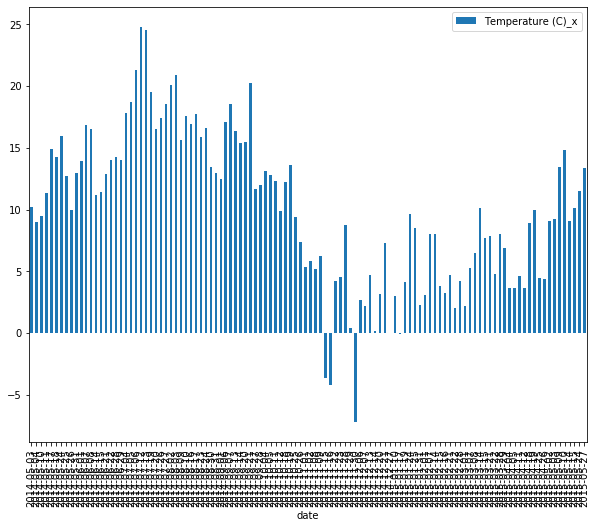

In [66]:
lessdf.plot(kind='bar', y='Temperature (C)_x')
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Current size: [10.0, 8.0]


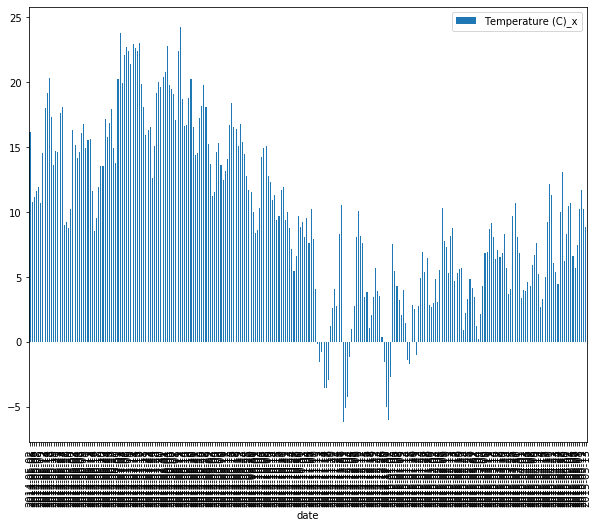

In [67]:
moredf.plot(kind='bar', y='Temperature (C)_x')
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Current size: [10.0, 8.0]


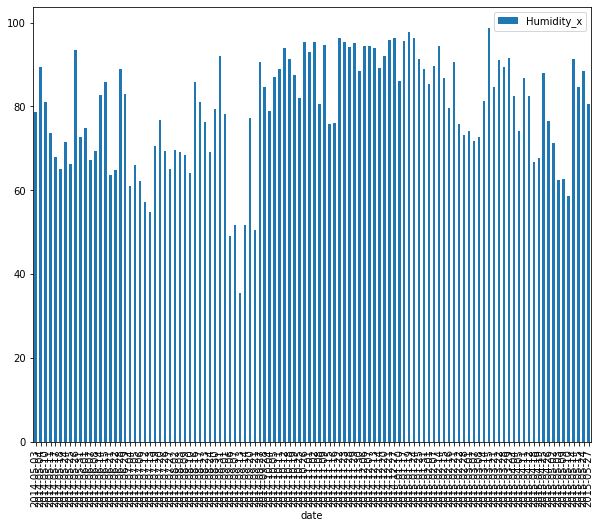

In [68]:
lessdf.plot(kind='bar', y='Humidity_x')
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Current size: [10.0, 8.0]


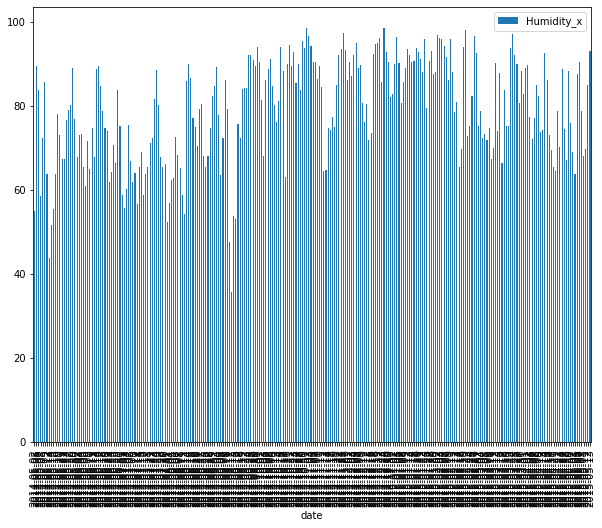

In [69]:
moredf.plot(kind='bar', y='Humidity_x')
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Current size: [10.0, 8.0]


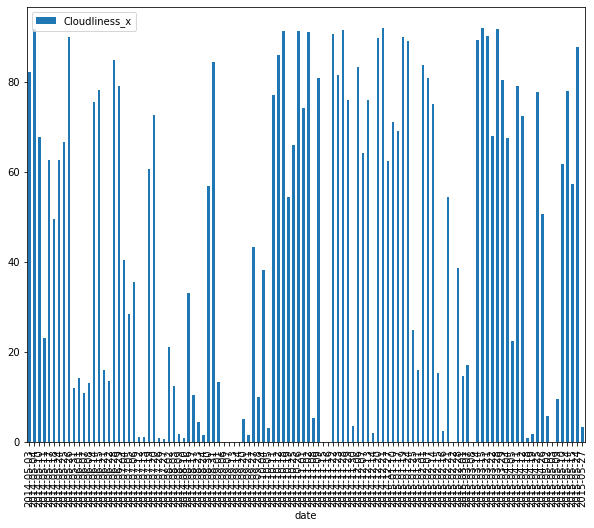

In [70]:
lessdf.plot(kind='bar', y='Cloudliness_x')
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Current size: [10.0, 8.0]


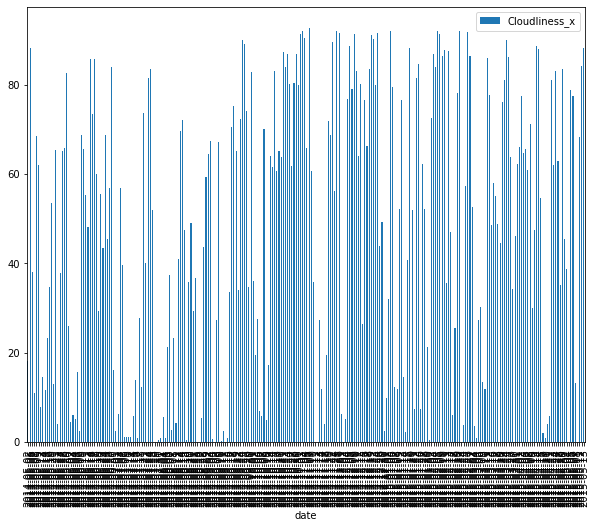

In [71]:
moredf.plot(kind='bar', y='Cloudliness_x')
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [72]:
belowzerotemp=merged2.loc[merged2['Temperature (C)']<=0]

In [73]:
belowzerotemp['id'].sum()

1167

In [74]:
abovezerotemp=merged2.loc[merged2['Temperature (C)']>=0]

In [75]:
abovezerotemp['id'].sum()

20446

In [76]:
housesalebyymcountzc=df.groupby(['zipcode', 'date(Y/M)']).count()
housesalebyymcountzc.sort_values('id')

id  date  price  bedrooms  bathrooms  sqft_living  \
zipcode date(Y/M)                                                      
98039   2015-05     1     1      1         1          1            1   
98148   2015-01     1     1      1         1          1            1   
98109   2015-05     2     2      2         2          2            2   
98014   2015-05     2     2      2         2          2            2   
98024   2014-12     2     2      2         2          2            2   
...                ..   ...    ...       ...        ...          ...   
98034   2014-07    64    64     64        64         64           64   
98103   2014-06    65    65     65        65         65           65   
        2014-10    66    66     66        66         66           66   
        2014-07    73    73     73        73         73           73   
98052   2014-07    73    73     73        73         73           73   

                   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
zipcode date(Y/M)                                      ...                      
98039   2015-05           1       1           1     1  ...      1           1   
98148   2015-01           1       1           1     1  ...      1           1   
98109   2015-05           2       2           2     2  ...      2           2   
98014   2015-05           2       2           2     2  ...      2           2   
98024   2014-12           2       2           2     2  ...      2           2   
...                     ...     ...         ...   ...  ...    ...         ...   
98034   2014-07          64      64          64    64  ...     64          64   
98103   2014-06          65      65          65    65  ...     65          65   
        2014-10          66      66          66    66  ...     66          66   
        2014-07          73      73          73    73  ...     73          73   
98052   2014-07          73      73          73    73  ...     73          73   

                   sqft_basement  yr_built  yr_renovated  lat  long  \
zipcode date(Y/M)                                                     
98039   2015-05                1         1             1    1     1   
98148   2015-01                1         1             1    1     1   
98109   2015-05                2         2             2    2     2   
98014   2015-05                2         2             2    2     2   
98024   2014-12                2         2             2    2     2   
...                          ...       ...           ...  ...   ...   
98034   2014-07               64        64            64   64    64   
98103   2014-06               65        65            65   65    65   
        2014-10               66        66            66   66    66   
        2014-07               73        73            73   73    73   
98052   2014-07               73        73            73   73    73   

                   sqft_living15  sqft_lot15  date(Y)  
zipcode date(Y/M)                                      
98039   2015-05                1           1        1  
98148   2015-01                1           1        1  
98109   2015-05                2           2        2  
98014   2015-05                2           2        2  
98024   2014-12                2           2        2  
...                          ...         ...      ...  
98034   2014-07               64          64       64  
98103   2014-06               65          65       65  
        2014-10               66          66       66  
        2014-07               73          73       73  
98052   2014-07               73          73       73  

[904 rows x 21 columns]

In [77]:
lessthan20zc=housesalebyymcountzc.loc[housesalebyymcountzc['id']<=20]
lessthan20zc['id'].sum()

5176

In [78]:
morethan20zc=housesalebyymcountzc.loc[housesalebyymcountzc['id']>=20]
morethan20zc['id'].sum()

17117

In [79]:
housesalebyycountzc=df.groupby(['zipcode']).count()
housesalebyycountzc.sort_values('id')

id  date  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
zipcode                                                                         
98039     50    50     50        50         50           50        50      50   
98148     57    57     57        57         57           57        57      57   
98024     81    81     81        81         81           81        81      81   
98010    100   100    100       100        100          100       100     100   
98102    105   105    105       105        105          105       105     105   
...      ...   ...    ...       ...        ...          ...       ...     ...   
98117    553   553    553       553        553          553       553     553   
98052    574   574    574       574        574          574       574     574   
98115    583   583    583       583        583          583       583     583   
98038    590   590    590       590        590          590       590     590   
98103    602   602    602       602        602          602       602     602   

         waterfront  view  ...  sqft_above  sqft_basement  yr_built  \
zipcode                    ...                                        
98039            50    50  ...          50             50        50   
98148            57    57  ...          57             57        57   
98024            81    81  ...          81             81        81   
98010           100   100  ...         100            100       100   
98102           105   105  ...         105            105       105   
...             ...   ...  ...         ...            ...       ...   
98117           553   553  ...         553            553       553   
98052           574   574  ...         574            574       574   
98115           583   583  ...         583            583       583   
98038           590   590  ...         590            590       590   
98103           602   602  ...         602            602       602   

         yr_renovated  lat  long  sqft_living15  sqft_lot15  date(Y/M)  \
zipcode                                                                  
98039              50   50    50             50          50         50   
98148              57   57    57             57          57         57   
98024              81   81    81             81          81         81   
98010             100  100   100            100         100        100   
98102             105  105   105            105         105        105   
...               ...  ...   ...            ...         ...        ...   
98117             553  553   553            553         553        553   
98052             574  574   574            574         574        574   
98115             583  583   583            583         583        583   
98038             590  590   590            590         590        590   
98103             602  602   602            602         602        602   

         date(Y)  
zipcode           
98039         50  
98148         57  
98024         81  
98010        100  
98102        105  
...          ...  
98117        553  
98052        574  
98115        583  
98038        590  
98103        602  

[70 rows x 22 columns]

In [80]:
countnalysis=mergedtable.loc[mergedtable['Temperature (C)']<=0]
countnalysis.count()

Temperature        47
Humidity           47
Cloudliness        47
Wind Speed         47
Temperature (C)    47
id                 21
price              21
bedrooms           21
bathrooms          21
sqft_living        21
sqft_lot           21
floors             21
waterfront         21
view               21
condition          21
grade              21
sqft_above         21
sqft_basement      21
yr_built           21
yr_renovated       21
zipcode            21
lat                21
long               21
sqft_living15      21
sqft_lot15         21
dtype: int64

In [81]:
countnalysis=mergedtable.loc[mergedtable['Temperature (C)']>=0]
countnalysis.count()

Temperature        1049
Humidity           1049
Cloudliness        1049
Wind Speed         1049
Temperature (C)    1049
id                  351
price               351
bedrooms            351
bathrooms           351
sqft_living         351
sqft_lot            351
floors              351
waterfront          351
view                351
condition           351
grade               351
sqft_above          351
sqft_basement       351
yr_built            351
yr_renovated        351
zipcode             351
lat                 351
long                351
sqft_living15       351
sqft_lot15          351
dtype: int64

In [193]:
biasanalysis=mergedtable.dropna()
biasanalysis

Temperature (C)   Humidity  Cloudliness  Wind Speed            id  \
date                                                                            
2014-05-02        16.163522  54.875000    18.208333    0.708333  4.088342e+09   
2014-05-03        10.194961  78.625000    82.208333    1.000000  6.709662e+09   
2014-05-04         8.960943  89.458333    91.625000    0.958333  5.848658e+09   
2014-05-05        10.799583  89.541667    88.333333    1.666667  4.571210e+09   
2014-05-06        11.157323  83.708333    38.125000    1.166667  4.553568e+09   
...                     ...        ...          ...         ...           ...   
2015-05-13         8.864440  93.166667    88.250000    0.833333  4.625505e+09   
2015-05-14         9.033814  91.416667    77.958333    0.375000  6.159145e+09   
2015-05-15        10.121395  84.625000    57.375000    0.375000  7.923600e+09   
2015-05-24        11.517940  88.333333    87.666667    0.708333  5.101401e+09   
2015-05-27        13.384792  80.583333     3.291667    0.416667  9.106000e+09   

                   price  bedrooms  bathrooms  sqft_living      sqft_lot  ...  \
date                                                                      ...   
2014-05-02  5.261918e+05  3.402985   2.138060  2102.835821  15640.477612  ...   
2014-05-03  4.669700e+05  3.000000   1.812500  1620.000000   8901.000000  ...   
2014-05-04  5.766900e+05  3.200000   2.400000  2508.000000   7563.000000  ...   
2014-05-05  5.810577e+05  3.523810   2.193452  2257.845238  17966.309524  ...   
2014-05-06  5.341684e+05  3.493976   2.171687  2102.168675  12127.662651  ...   
...                  ...       ...        ...          ...           ...  ...   
2015-05-13  5.116239e+05  3.193548   2.088710  1922.322581   8165.096774  ...   
2015-05-14  6.038908e+05  3.818182   2.340909  2093.909091   9393.363636  ...   
2015-05-15  4.500000e+05  5.000000   2.000000  1870.000000   7344.000000  ...   
2015-05-24  4.455000e+05  2.000000   1.750000  1390.000000   6670.000000  ...   
2015-05-27  1.310000e+06  4.000000   2.250000  3750.000000   5000.000000  ...   

               grade   sqft_above  sqft_basement     yr_built  yr_renovated  \
date                                                                          
2014-05-02  7.835821  1819.850746     282.985075  1972.850746     29.761194   
2014-05-03  7.000000  1490.000000     130.000000  1978.750000      0.000000   
2014-05-04  8.400000  1878.000000     630.000000  1972.400000      0.000000   
2014-05-05  7.833333  1887.607143     370.238095  1972.857143    141.988095   
2014-05-06  7.650602  1769.638554     332.530120  1969.108434    193.373494   
...              ...          ...            ...          ...           ...   
2015-05-13  7.548387  1673.096774     249.225806  1969.838710     64.322581   
2015-05-14  7.909091  1919.363636     174.545455  1986.454545      0.000000   
2015-05-15  7.000000  1870.000000       0.000000  1960.000000      0.000000   
2015-05-24  6.000000   720.000000     670.000000  1941.000000      0.000000   
2015-05-27  8.000000  2440.000000    1310.000000  1924.000000      0.000000   

                 zipcode        lat        long  sqft_living15    sqft_lot15  
date                                                                          
2014-05-02  98075.402985  47.570193 -122.183612    2068.358209  15771.328358  
2014-05-03  98067.000000  47.548425 -122.079750    1910.000000  27967.500000  
2014-05-04  98089.400000  47.525660 -122.196200    2265.000000   7438.800000  
2014-05-05  98079.773810  47.593731 -122.205560    2035.726190  13471.428571  
2014-05-06  98080.481928  47.597886 -122.237205    1974.349398  10881.469880  
...                  ...        ...         ...            ...           ...  
2015-05-13  98076.774194  47.528861 -122.244194    1927.806452   8278.774194  
2015-05-14  98083.818182  47.507082 -122.251182    2121.727273   7709.181818  
2015-05-15  98007.000000  47.595100 -122.144000    1870.000000   7650.000000  
2015-05

In [131]:
numberofsalesdays=biasanalysis['Humidity'].count()
numberofsalesdays

372

In [198]:
weather=weatherbydateymd.reset_index()
weather

date  Temperature (C)   Humidity  Cloudliness  Wind Speed
0     2013-01-01         0.619583  61.958333    33.416667    0.250000
1     2013-01-02         0.534167  77.500000    12.291667    1.000000
2     2013-01-03         0.463750  54.166667    22.708333    2.291667
3     2013-01-04         1.745833  57.125000     1.000000    1.458333
4     2013-01-05         3.907366  83.333333    84.375000    1.750000
...          ...              ...        ...          ...         ...
1091  2015-12-28         2.579458  94.666667    89.125000    0.875000
1092  2015-12-29         2.798354  95.416667    87.041667    0.750000
1093  2015-12-30         0.159417  92.916667     6.375000    0.333333
1094  2015-12-31        -1.076479  85.333333     0.791667    0.500000
1095  2016-01-01         3.830000  56.000000     1.000000    0.000000

[1096 rows x 5 columns]

In [206]:
#weather['date'] = pd.date_range('2014-05-02', '2015-05-27', periods=200, freq='D')
mask = (weather['date'] > '2014-05-01') & (weather['date'] <= '2015-05-27')
biasweather=pd.DataFrame(weather.loc[mask])
biasweather

date  Temperature (C)   Humidity  Cloudliness  Wind Speed
486  2014-05-02        16.163522  54.875000    18.208333    0.708333
487  2014-05-03        10.194961  78.625000    82.208333    1.000000
488  2014-05-04         8.960943  89.458333    91.625000    0.958333
489  2014-05-05        10.799583  89.541667    88.333333    1.666667
490  2014-05-06        11.157323  83.708333    38.125000    1.166667
..          ...              ...        ...          ...         ...
872  2015-05-23        12.481082  71.041667    35.708333    0.541667
873  2015-05-24        11.517940  88.333333    87.666667    0.708333
874  2015-05-25        11.540710  87.083333    77.416667    0.750000
875  2015-05-26        12.116251  82.458333    62.125000    0.625000
876  2015-05-27        13.384792  80.583333     3.291667    0.416667

[391 rows x 5 columns]

In [207]:
weatherdatadays= biasweather['Temperature (C)'].count()
weatherdatadays

391

In [208]:
abovezerodays=biasweather.loc[biasweather['Temperature (C)']>=0]
numberofabovezerodays=abovezerodays['Temperature (C)'].count()
numberofabovezerodays

369

In [209]:
abovezerosales=biasanalysis.loc[biasanalysis['Temperature (C)']>=0]
numberofabovezerosales=abovezerosales['price'].count()
numberofabovezerosales

351

In [210]:
belowzerodays=biasweather.loc[biasweather['Temperature (C)']<=0]
numberofbelowzerodays=belowzerodays['Temperature (C)'].count()
numberofbelowzerodays

22

In [211]:
belowzerosales=biasanalysis.loc[biasanalysis['Temperature (C)']<=0]
numberofbelowzerosalesdays=belowzerosales['price'].count()
numberofbelowzerosalesdays

21

In [212]:
abovefiftyhdays=biasweather.loc[biasweather['Humidity']>=50]
abovefiftyhumiditydays=abovezerodays['Humidity'].count()
abovefiftyhumiditydays

369

In [213]:
abovefiftyhsales=biasanalysis.loc[biasanalysis['Humidity']>=50]
abovefiftyhumiditysalesdays=abovefiftyhsales['Humidity'].count()
abovefiftyhumiditysalesdays

367

In [216]:
belowfiftyhdays=biasweather.loc[biasweather['Humidity']<=50]
belowfiftyhumiditydays=belowfiftyhdays['Humidity'].count()
belowfiftyhumiditydays

5

In [217]:
belowfiftyhsales=biasanalysis.loc[biasanalysis['Humidity']<=50]
belowfiftyhumiditysalesdays=belowfiftyhsales['Humidity'].count()
belowfiftyhumiditysalesdays                                  

5

In [218]:
belowthreewdays=biasweather.loc[biasweather['Wind Speed']<=3]
belowthreewinddays=belowthreewdays['Wind Speed'].count()
belowthreewinddays

386

In [219]:
belowthreewsales=biasanalysis.loc[biasanalysis['Wind Speed']<=3]
belowthreewindsalesdays=belowthreewsales['Wind Speed'].count()
belowthreewindsalesdays

367

In [220]:
abovethreewdays=biasweather.loc[biasweather['Wind Speed']>=3]
abovethreewinddays=abovethreewdays['Wind Speed'].count()
abovethreewinddays

5

In [221]:
abovethreewsales=biasanalysis.loc[biasanalysis['Wind Speed']>=3]
abovethreewindsalesdays=abovethreewsales['Wind Speed'].count()
abovethreewindsalesdays

5

In [222]:
Biasanalysistable=pd.DataFrame({'Number of days with weather data':weatherdatadays,
                               'Number of days in which sales has happened':numberofsalesdays,
                               'Number of days with temp above zero': numberofabovezerodays,
                               'Number of days with temp below zero':numberofbelowzerodays,
                               'Number of sales days with temp above zero':numberofabovezerosales,
                               'Number of sales days with temp below zero':numberofbelowzerosalesdays,
                               'Number of days with humidity above fifty':abovefiftyhumiditydays,
                               'Number of days with humidity below fifty':belowfiftyhumiditydays,
                               'Number of sales days with humidity above fifty':abovefiftyhumiditysalesdays,
                               'Number of sales days with humidity below fifty':belowfiftyhumiditysalesdays,
                               'Number of days with wind speed below three':belowthreewinddays,
                               'Number of days with wind speed above three':abovethreewinddays,
                               'Number of sales days with wind speed below three':belowthreewindsalesdays,
                               'Number of sales days with wind speed above three':abovethreewindsalesdays}, index=[0])
Biasanalysistable

Number of days with weather data  \
0                               391   

   Number of days in which sales has happened  \
0                                         372   

   Number of days with temp above zero  Number of days with temp below zero  \
0                                  369                                   22   

   Number of sales days with temp above zero  \
0                                        351   

   Number of sales days with temp below zero  \
0                                         21   

   Number of days with humidity above fifty  \
0                                       369   

   Number of days with humidity below fifty  \
0                                         5   

   Number of sales days with humidity above fifty  \
0                                             367   

   Number of sales days with humidity below fifty  \
0                                               5   

   Number of days with wind speed below three  \
0                                         386   

   Number of days with wind speed above three  \
0                                           5   

   Number of sales days with wind speed below three  \
0                                               367   

   Number of sales days with wind speed above three  
0                                                 5

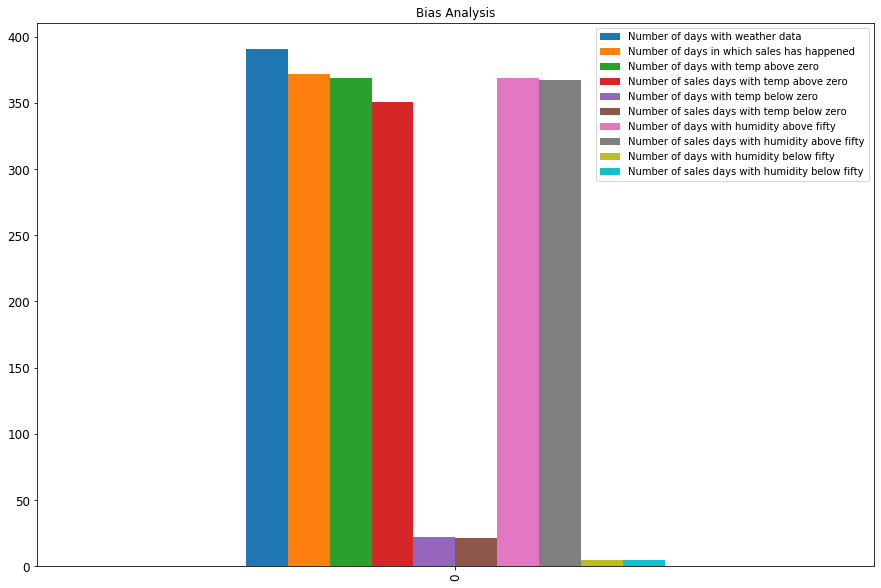

In [223]:
ax = Biasanalysistable[['Number of days with weather data','Number of days in which sales has happened',
                        'Number of days with temp above zero', 'Number of sales days with temp above zero',
                       'Number of days with temp below zero', 'Number of sales days with temp below zero',
                       'Number of days with humidity above fifty','Number of sales days with humidity above fifty',
                       'Number of days with humidity below fifty','Number of sales days with humidity below fifty',
                       ]].plot(kind='bar', title ="Bias Analysis", figsize=(15, 10), legend=True, fontsize=12)


plt.show()
x_lim = len(Biasanalysistable.index)
# Chart title
plt.title("Bias Analysis", fontdict = {'fontsize': 30, 'fontweight': 'bold'})
# x label

plt.ylabel("Average Number of Houses Sold in Different Weather Conditions", fontdict = {'fontsize': 18})
# legend 
plt.legend(loc=1, prop={'font=})

plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('housepricesbyyearandmonth.png')

